# Pedestrian classification
Erik Matovič and Jakub Horvat

[Dataset](https://data.nvision2.eecs.yorku.ca/PIE_dataset/)

### 0. Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from os import listdir
from os.path import join
from pie_data import PIE
import cv2
from math import floor, ceil

In [31]:
pie_path = '/media/erik/T7/DP/PIE_data' # '../' 
pie = PIE(data_path=pie_path)
type(pie)

pie_data.PIE

In [32]:
train_list = pie._get_image_set_ids('train')
test_list = pie._get_image_set_ids('test')
val_list = pie._get_image_set_ids('val')

train_list, val_list, test_list

(['set01', 'set02', 'set04'], ['set05', 'set06'], ['set03'])

In [33]:
class PIE_peds():
    def __init__(self, setname: str, pie: PIE) -> None:
        #super().__init__()
        self.setname = setname
        self.set_dir = dict()
        self.all_path = list()
        self.all_filenames = list()
        self.path = pie._images_path

        assert setname in ['train', 'val', 'test']
        
        self.img_init(pie)
        
    
    def __len__(self):
        return len(self.all_filenames)
    

    #def __getitem__(self, index):
    #    pass
        #return super().__getitem__(index)


    def img_init(self, pie) -> None:
        set_list = pie._get_image_set_ids(self.setname)

        for set_ in set_list:
            set_path = join(pie._images_path, set_)
            self.set_dir[set_] = dict()
            
            set_content = listdir(set_path)
            for video in set_content:
                video_path = join(set_path, video)
                imgs = listdir(video_path)
                self.all_path += ([video_path] * len(imgs))
                self.all_filenames += imgs
                self.set_dir[set_][video] = imgs
        print(self.set_dir)    


In [34]:
train_dataset = PIE_peds('train', pie)
val_dataset = PIE_peds('val', pie)
test_dataset = PIE_peds('test', pie)

print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

{'set01': {'video_0001': ['01013.png', '01014.png', '01015.png', '01016.png', '01017.png', '01018.png', '01019.png', '01020.png', '01021.png', '01022.png', '01023.png', '01024.png', '01025.png', '01026.png', '01027.png', '01028.png', '01029.png', '01030.png', '01031.png', '01032.png', '01033.png', '01034.png', '01035.png', '01036.png', '01037.png', '01038.png', '01039.png', '01040.png', '01041.png', '01042.png', '01043.png', '01044.png', '01045.png', '01046.png', '01047.png', '01048.png', '01049.png', '01050.png', '01051.png', '01052.png', '01053.png', '01054.png', '01055.png', '01056.png', '01057.png', '01058.png', '01059.png', '01060.png', '01061.png', '01062.png', '01063.png', '01064.png', '01065.png', '01066.png', '01067.png', '01068.png', '01069.png', '01070.png', '01071.png', '01072.png', '01073.png', '01074.png', '01075.png', '01076.png', '01077.png', '01078.png', '01079.png', '01080.png', '01081.png', '01082.png', '01083.png', '01084.png', '01085.png', '01086.png', '01087.png',

In [45]:
def save_img_annotations(dataset: PIE_peds, folder: str) -> None:
    """
    Save images into given folder and also CSV annotations. 

    :param dataset: PIE_peds class, where all paths are set. 
    :param folder: folder train or val or test to save pedestrians.
    """

    assert folder in ['train', 'val', 'test']

    target = dict()
    target['set'] = []
    target['video'] = []
    target['frame'] = []
    target['ped_idx'] = []
    target['ped'] = []
    target['BBox'] = []
    target['action'] = []
    target['age'] = []
    target['gender'] = []
    target['look'] = []
    target['cross'] = []

    for set_name in dataset.set_dir:
        for video in dataset.set_dir[set_name]:
            annotations = pie._get_annotations(set_name, video)
            annotations_attributes = pie._get_ped_attributes(set_name, video)
            for frame in dataset.set_dir[set_name][video]: 
                #img_path = '../images/' + set_name + '/' + video + '/' + frame
                #img_path = '/media/erik/T7/DP/PIE_data/images/' + set_name + '/' + video + '/' + frame
                #print(img_path, type(img_path))

                #img = cv2.imread(img_path)
                # plt.imshow(img)
                for idx in annotations['ped_annotations']:
                    frame_idx = int(frame[:-4])
                    #print(idx)
                    if frame_idx in annotations['ped_annotations'][idx]['frames']:
                        if idx in target['ped']:
                            break

                        frame_key = annotations['ped_annotations'][idx]['frames'].index(frame_idx)
                        
                        # set annotations in dictionary
                        target['set'].append(set_name)
                        target['video'].append(video)
                        target['frame'].append(frame)
                        target['ped_idx'].append(frame_key)
                        target['ped'].append(idx)
                        target['BBox'].append(annotations['ped_annotations'][idx]['bbox'][frame_key])
                        target['action'].append(annotations['ped_annotations'][idx]['behavior']['action'][frame_key])
                        target['age'].append(annotations_attributes[idx]['age'])
                        target['gender'].append(annotations_attributes[idx]['gender'])
                        target['look'].append(annotations['ped_annotations'][idx]['behavior']['look'][frame_key])
                        target['cross'].append(annotations['ped_annotations'][idx]['behavior']['cross'][frame_key])
                        
                        # BBox for pedestrian
                        #x1 = floor(target['BBox'][-1][0])
                        #y1 = floor(target['BBox'][-1][1])
                        #x2 = ceil(target['BBox'][-1][2])
                        #y2 = ceil(target['BBox'][-1][3])
                        #crop_img = img[y1:y2, x1:x2]
                        #crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
                        #crop_img = cv2.resize(crop_img, (64, 64))
                        
                        #f_name = '../images/' + folder + '/' + set_name + '_' + video + '_' + target['ped'][-1] + '_' + frame
                        #f_name = '/media/erik/T7/DP/PIE_data/images/' + folder + '/' + set_name + '_' + video + '_' + target['ped'][-1] + '_' + frame
                        
                        # print(f_name)
                        #cv2.imwrite(f_name, crop_img)

                        #cv2.imshow("cropped", crop_img)
                        #cv2.waitKey(0)
                        #cv2.destroyAllWindows()
                        #print(type(target['BBox'][-1][1]))
                        #break
    df = pd.DataFrame(data=target)
    annotations_path = '../' + folder + '_annotations.csv'
    df.to_csv(annotations_path)
    print(f'{folder} done!')
    #return target


save_img_annotations(train_dataset, 'train')
save_img_annotations(val_dataset, 'val')
save_img_annotations(test_dataset, 'test')

/media/erik/T7/DP/PIE_data/annotations/set01/video_0001_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set01/video_0002_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set01/video_0003_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set01/video_0004_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set02/video_0001_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set02/video_0002_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set02/video_0003_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set04/video_0001_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set04/video_0002_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set04/video_0003_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set04/video_0004_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set04/video_0005_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set04/video_0006_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set04/video_0007_annt.xml
/media/erik/T7/DP/PIE_data/annotations/set04/video_0008_annt.xml
/media/erik/T7/DP/PIE_dat

In [46]:
df_train = pd.read_csv('../train_annotations.csv')
df_train

Unnamed: 0    set       video      frame  ped_idx        ped  \
0             0  set01  video_0001  01013.png        0      1_1_1   
1             1  set01  video_0001  01013.png        0      1_1_2   
2             2  set01  video_0001  01142.png       29     1_1_13   
3             3  set01  video_0001  01324.png        0      1_1_3   
4             4  set01  video_0001  01324.png        0      1_1_4   
..          ...    ...         ...        ...      ...        ...   
698         698  set04  video_0016  11921.png        0  4_16_1722   
699         699  set04  video_0016  12950.png        0  4_16_1728   
700         700  set04  video_0016  12950.png        0  4_16_1729   
701         701  set04  video_0016  12950.png        0  4_16_1730   
702         702  set04  video_0016  16802.png        0  4_16_1717   

                                   BBox  action  age  gender  look  cross  
0      [916.82, 793.32, 929.18, 847.11]       0    2       1     0      0  
1        [917.42, 796.87, 929.7, 846.4]       0    2       2     0      0  
2    [1230.37, 771.16, 1253.65, 852.48]       0    2       2     1      0  
3    [1111.97, 805.05, 1122.51, 831.83]       0    2       1     0      0  
4    [1119.19, 803.13, 1127.71, 835.05]       0    2       2     1      0  
..                                  ...     ...  ...     ...   ...    ...  
698  [1202.91, 721.57, 1225.95, 804.51]       0    2       2     0      0  
699      [730.54, 728.5, 740.9, 759.43]       1    2       1     0      0  
700    [716.84, 728.58, 725.76, 756.82]       0    2       1     0      0  
701      [715.38, 738.12, 723.0, 757.4]       0    0       1     0      0  
702  [1420.14, 718.49, 1436.24, 772.36]       1    2       1     0      0  

[703 rows x 12 columns]

In [41]:
df_val = pd.read_csv('../val_annotations.csv')
df_val

Unnamed: 0    set       video      frame  ped_idx       ped  \
0             0  set05  video_0001  00532.png        0  5_1_1731   
1             1  set05  video_0001  01674.png        0  5_1_1733   
2             2  set05  video_0001  02250.png        0  5_1_1739   
3             3  set05  video_0001  02917.png        0  5_1_1740   
4             4  set05  video_0001  03622.png      381  5_1_1742   
..          ...    ...         ...        ...      ...       ...   
206         206  set06  video_0009  12668.png        0  6_9_1972   
207         207  set06  video_0009  13019.png        0  6_9_1986   
208         208  set06  video_0009  13037.png        0  6_9_1984   
209         209  set06  video_0009  13447.png        0  6_9_1973   
210         210  set06  video_0009  15938.png        0  6_9_1974   

                                   BBox  action  gesture  look  cross  
0      [452.38, 693.43, 473.43, 760.54]       1        0     0      0  
1      [1083.12, 740.66, 1106.6, 804.7]       0        0     0      0  
2     [1218.29, 703.6, 1263.13, 810.43]       1        0     0      0  
3     [1257.07, 704.4, 1297.64, 812.99]       1        0     0      0  
4    [1311.37, 728.34, 1334.89, 790.24]       1        0     0      0  
..                                  ...     ...      ...   ...    ...  
206   [1107.57, 747.1, 1115.64, 777.56]       1        0     0      0  
207    [1030.8, 759.31, 1039.6, 783.61]       0        0     0      0  
208  [1122.82, 751.68, 1136.64, 794.53]       0        0     0      0  
209    [691.69, 744.51, 716.07, 792.79]       0        0     0      0  
210    [673.83, 751.34, 685.06, 778.13]       1        0     0      0  

[211 rows x 11 columns]

In [42]:
df_test = pd.read_csv('../test_annotations.csv')
df_test

Unnamed: 0    set       video      frame  ped_idx        ped  \
0             0  set03  video_0001  01464.png        0    3_1_220   
1             1  set03  video_0001  01660.png        0    3_1_221   
2             2  set03  video_0001  01865.png      107    3_1_222   
3             3  set03  video_0001  01935.png        0    3_1_223   
4             4  set03  video_0001  02433.png        0    3_1_229   
..          ...    ...         ...        ...      ...        ...   
574         574  set03  video_0019  09357.png        0   3_19_997   
575         575  set03  video_0019  09526.png        0   3_19_998   
576         576  set03  video_0019  09685.png       27   3_19_999   
577         577  set03  video_0019  10820.png        0  3_19_1000   
578         578  set03  video_0019  11053.png      211  3_19_1001   

                                   BBox  action  gesture  look  cross  
0       [1120.8, 728.6, 1128.72, 756.1]       1        0     0      0  
1      [849.79, 754.25, 855.65, 774.81]       0        0     0      0  
2            [0.0, 660.72, 37.2, 856.8]       0        0     0      0  
3      [874.75, 749.17, 880.55, 768.27]       0        0     0      0  
4       [989.84, 741.66, 995.72, 757.1]       0        0     0      0  
..                                  ...     ...      ...   ...    ...  
574   [998.75, 748.82, 1015.17, 797.59]       0        0     0      0  
575  [1133.12, 699.77, 1177.91, 845.25]       0        0     0      0  
576      [93.4, 727.01, 122.91, 823.79]       0        0     0      0  
577   [1035.5, 745.39, 1043.47, 770.63]       1        0     0      0  
578         [15.5, 608.02, 76.5, 890.3]       1        0     0      0  

[579 rows x 11 columns]

## Data rotation

In [193]:
def plot(rotated_imgs, col_title):
    plt.figure()
    f, axarr = plt.subplots(1, len(rotated_imgs))
    f.set_size_inches(18.5, 10.5)
    f.set_dpi(100)

    for i in range(len(rotated_imgs)):
        axarr[i].imshow(rotated_imgs[i], cmap='gray')
        axarr[i].set_title(col_title[i])
        axarr[i].axis('off')

    plt.show()


def plot_1(rotated_imgs, col_title):
    plt.figure()
    f, axarr = plt.subplots(1, len(rotated_imgs))
    f.set_size_inches(18.5, 10.5)
    f.set_dpi(100)

    for i in range(len(rotated_imgs)):
        axarr.imshow(rotated_imgs[i], cmap='gray')
        axarr.set_title(col_title[i])
        axarr.axis('off')

    plt.show()

<Figure size 432x288 with 0 Axes>

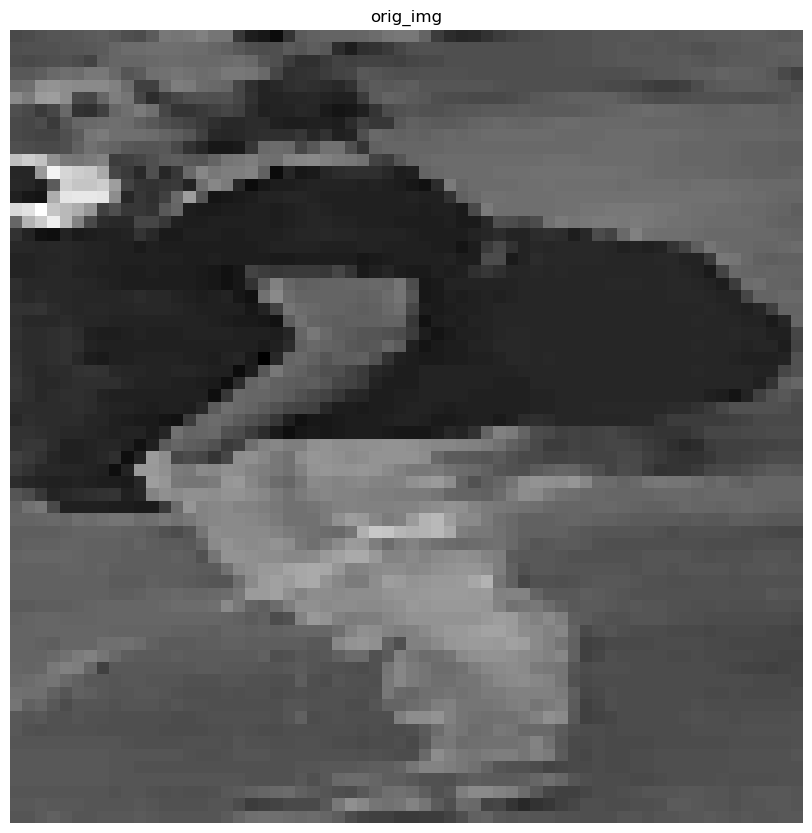

<Figure size 432x288 with 0 Axes>

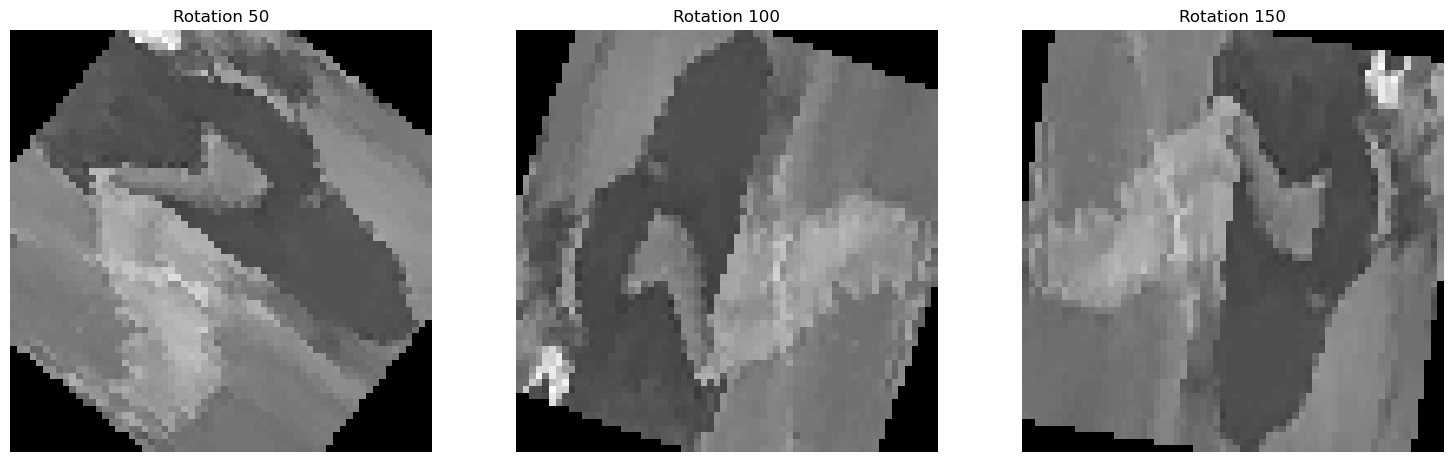

In [195]:
from torchvision import transforms
from PIL import Image
from pathlib import Path

orig_img = Image.open(Path('../images/train/set01_video_0001_1_1_1_01127.png'))
plot_1([orig_img], ['orig_img'])
rotated_imgs = [transforms.RandomRotation(degrees=d)(orig_img) for d in range(50,151,50)]
plot(rotated_imgs, col_title=["Rotation 50","Rotation 100","Rotation 150"])

In [69]:
df_cross = df_train.loc[df_train.cross == 1]
df_cross


Unnamed: 0    set       video      frame  ped_idx        ped  \
39           39  set01  video_0002  12533.png     1891     1_2_44   
40           40  set01  video_0002  12533.png     1866     1_2_45   
41           41  set01  video_0002  12533.png     1792     1_2_39   
42           42  set01  video_0002  12533.png     1744     1_2_40   
43           43  set01  video_0002  12533.png     1261     1_2_41   
48           48  set01  video_0002  15944.png      155     1_2_51   
49           49  set01  video_0002  16147.png      118     1_2_52   
83           83  set01  video_0003  17751.png      174     1_3_97   
96           96  set02  video_0001  07430.png      645    2_1_119   
97           97  set02  video_0001  07430.png      274    2_1_118   
111         111  set02  video_0001  15770.png      466    2_1_130   
112         112  set02  video_0001  15770.png      456    2_1_131   
113         113  set02  video_0001  15770.png      450    2_1_132   
125         125  set02  video_0002  03198.png      553    2_2_182   
126         126  set02  video_0002  03198.png      551    2_2_183   
127         127  set02  video_0002  03198.png      374    2_2_189   
128         128  set02  video_0002  03198.png      344    2_2_187   
131         131  set02  video_0002  03198.png      247    2_2_188   
133         133  set02  video_0002  04589.png      354    2_2_193   
156         156  set02  video_0002  16722.png      304    2_2_177   
157         157  set02  video_0002  16722.png      266    2_2_178   
160         160  set02  video_0003  01178.png      108    2_3_195   
162         162  set02  video_0003  01178.png      302    2_3_197   
165         165  set02  video_0003  01637.png      391    2_3_200   
167         167  set02  video_0003  01637.png      145    2_3_202   
220         220  set04  video_0002  02705.png      189   4_2_1059   
221         221  set04  video_0002  02705.png      109   4_2_1060   
222         222  set04  video_0002  02705.png      155   4_2_1062   
224         224  set04  video_0002  02705.png       88   4_2_1061   
228         228  set04  video_0002  03597.png      168   4_2_1067   
253         253  set04  video_0002  13384.png      142   4_2_1098   
254         254  set04  video_0002  13384.png       95   4_2_1099   
255         255  set04  video_0002  13384.png       81   4_2_1100   
257         257  set04  video_0002  13527.png       27   4_2_1102   
259         259  set04  video_0002  13696.png      161   4_2_1103   
273         273  set04  video_0002  15532.png      224   4_2_1121   
296         296  set04  video_0003  14125.png       83   4_3_1154   
344         344  set04  video_0005  11345.png      388   4_5_1215   
346         346  set04  video_0005  11345.png      413   4_5_1217   
347         347  set04  video_0005  11345.png      415   4_5_1218   
348         348  set04  video_0005  11345.png      385   4_5_1213   
349         349  set04  video_0005  11345.png      363   4_5_1216   
357         357  set04  video_0006  03206.png      170   4_6_1235   
360         360  set04  video_0006  05777.png      522   4_6_1239   
363         363  set04  video_0006  06540.png      396   4_6_1250   
411         411  set04  video_0007  12179.png      555   4_7_1341   
412         412  set04  video_0007  12179.png      503   4_7_1342   
413         413  set04  video_0007  12179.png      309   4_7_1343   
414         414  set04  video_0007  12179.png      199   4_7_1344   
431         431  set04  video_0007  17487.png      114   4_7_1366   
457         457  set04  video_0008  15268.png     1136   4_8_1405   
462         462  set04  video_0009  05188.png      362   4_9_1417   
500         500  set04  video_0009  14811.png      338   4_9_1467   
537         537  set04  video_0010  14679.png      378  4_10_1521   
538         538  set04  video_0010  14679.png      386  4_10_1522   
543         543  set04  video_0011  00765.png       94  4_11_1527   
544         544  set04  video_0011  00765.png       75  4_11_1528   
582

In [82]:
10 * df_cross.action.value_counts()

1    590
Name: action, dtype: int64

In [83]:
10 * df_cross.age.value_counts()

2    500
3     90
Name: age, dtype: int64

In [80]:
10 * df_cross.gender.value_counts()

1    370
2    220
Name: gender, dtype: int64

In [81]:
10 * df_cross.look.value_counts()

0    570
1     20
Name: look, dtype: int64

In [86]:
imgs_names = df_cross['set'].values + '_' + df_cross['video'].values + '_' + df_cross['ped'].values + '_' + df_cross['frame'].values 	
imgs_names

array(['set01_video_0002_1_2_44_12533.png',
       'set01_video_0002_1_2_45_12533.png',
       'set01_video_0002_1_2_39_12533.png',
       'set01_video_0002_1_2_40_12533.png',
       'set01_video_0002_1_2_41_12533.png',
       'set01_video_0002_1_2_51_15944.png',
       'set01_video_0002_1_2_52_16147.png',
       'set01_video_0003_1_3_97_17751.png',
       'set02_video_0001_2_1_119_07430.png',
       'set02_video_0001_2_1_118_07430.png',
       'set02_video_0001_2_1_130_15770.png',
       'set02_video_0001_2_1_131_15770.png',
       'set02_video_0001_2_1_132_15770.png',
       'set02_video_0002_2_2_182_03198.png',
       'set02_video_0002_2_2_183_03198.png',
       'set02_video_0002_2_2_189_03198.png',
       'set02_video_0002_2_2_187_03198.png',
       'set02_video_0002_2_2_188_03198.png',
       'set02_video_0002_2_2_193_04589.png',
       'set02_video_0002_2_2_177_16722.png',
       'set02_video_0002_2_2_178_16722.png',
       'set02_video_0003_2_3_195_01178.png',
       'set02_vide

In [179]:
import torch

torch.manual_seed(10)


In [184]:
int((torch.rand(1) * 360) % 360)

77

<Figure size 432x288 with 0 Axes>

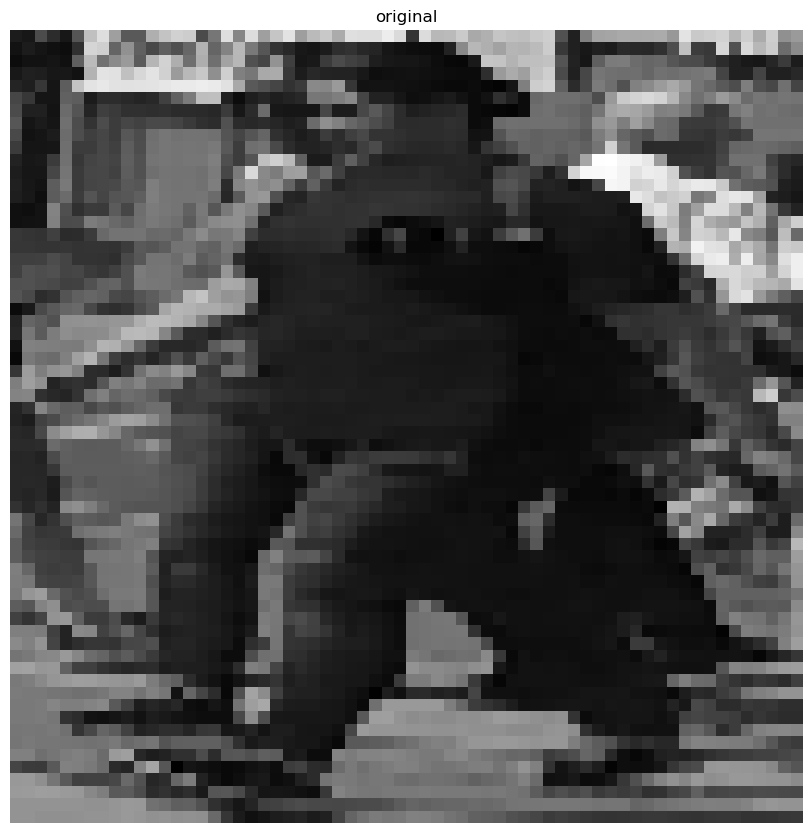

113


<Figure size 432x288 with 0 Axes>

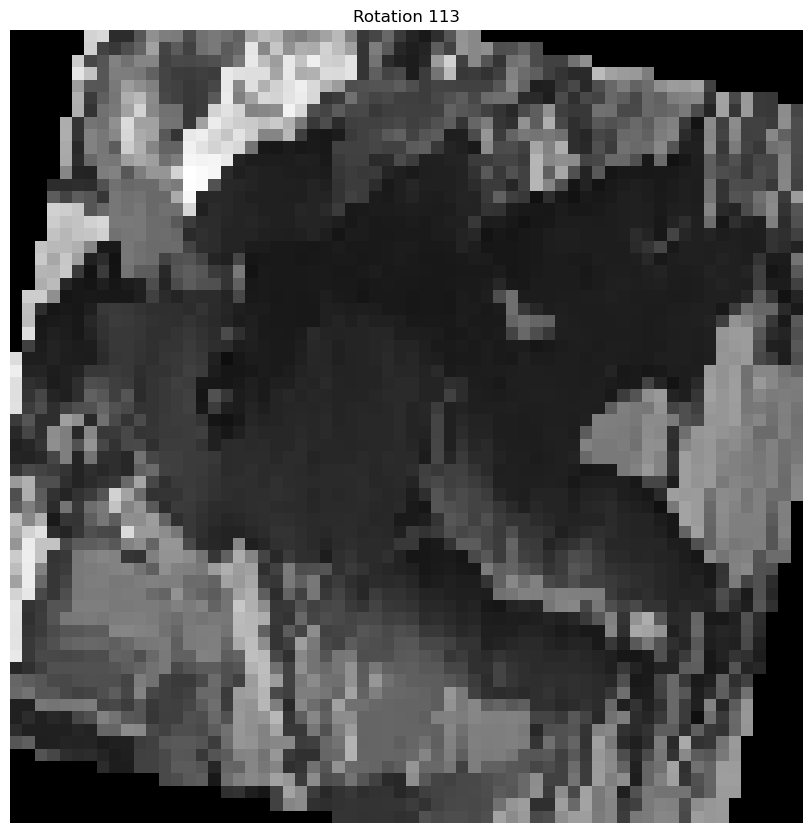

<Figure size 432x288 with 0 Axes>

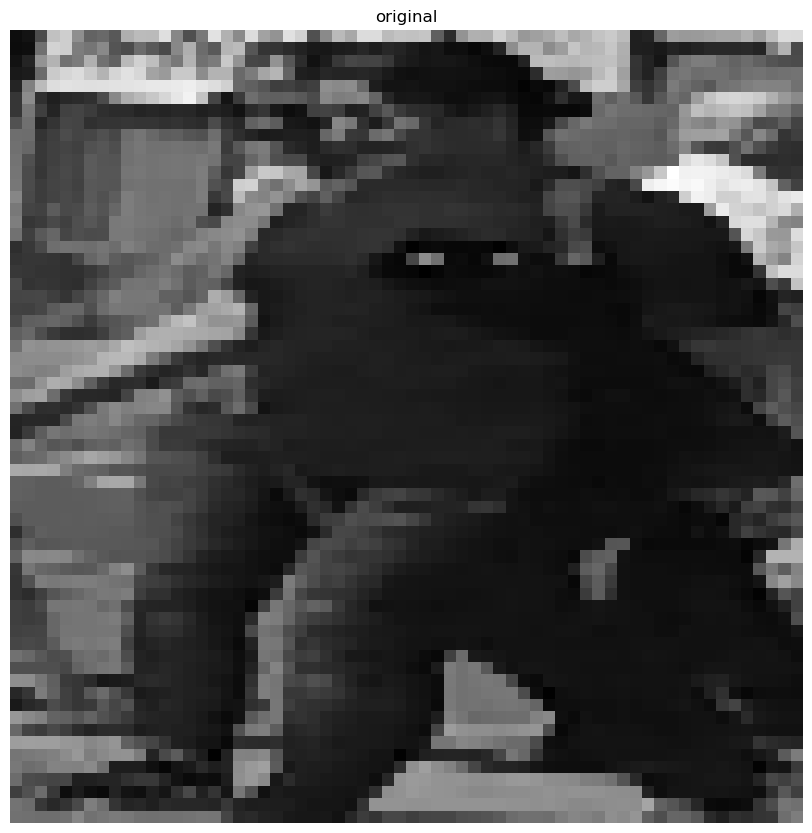

131


<Figure size 432x288 with 0 Axes>

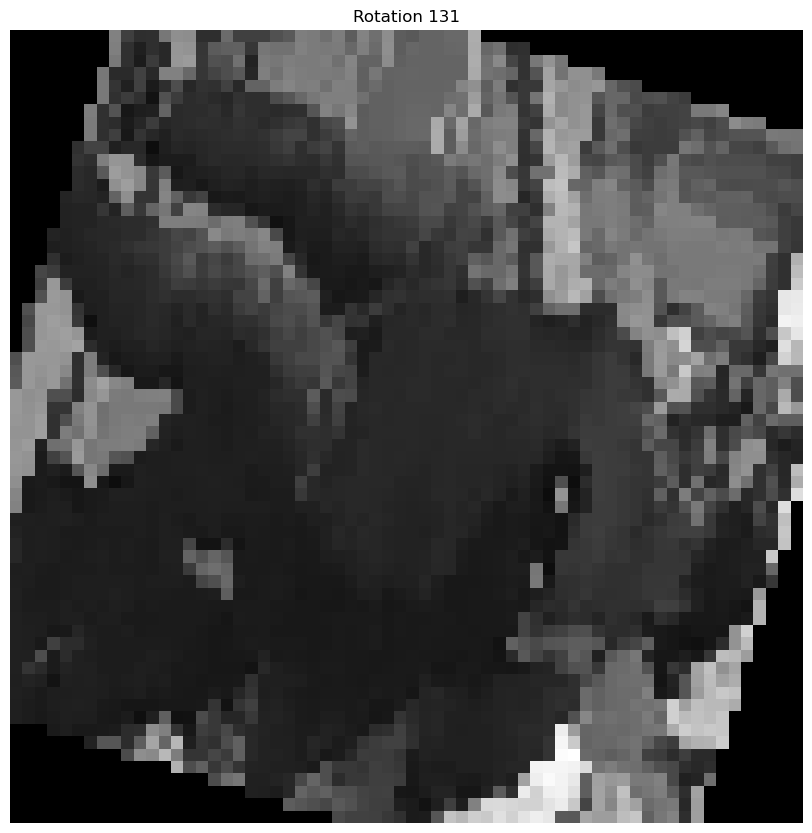

<Figure size 432x288 with 0 Axes>

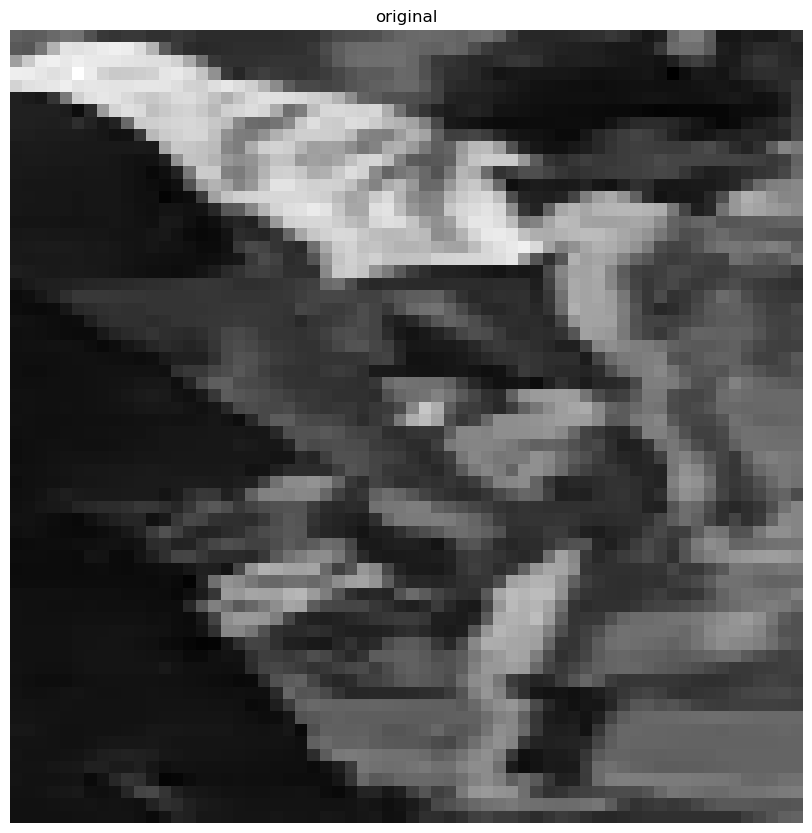

221


<Figure size 432x288 with 0 Axes>

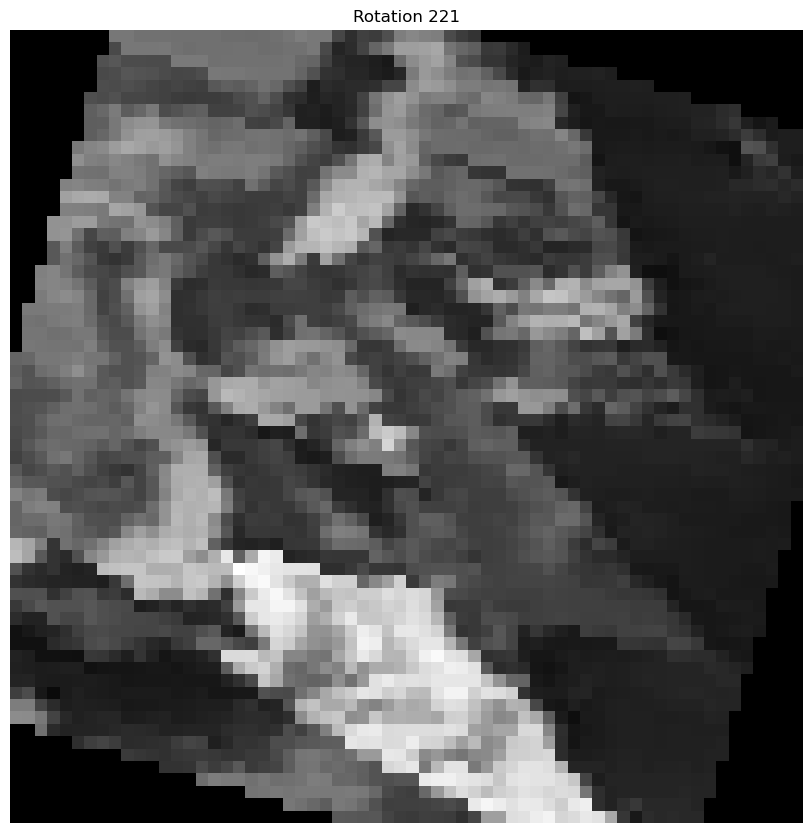

<Figure size 432x288 with 0 Axes>

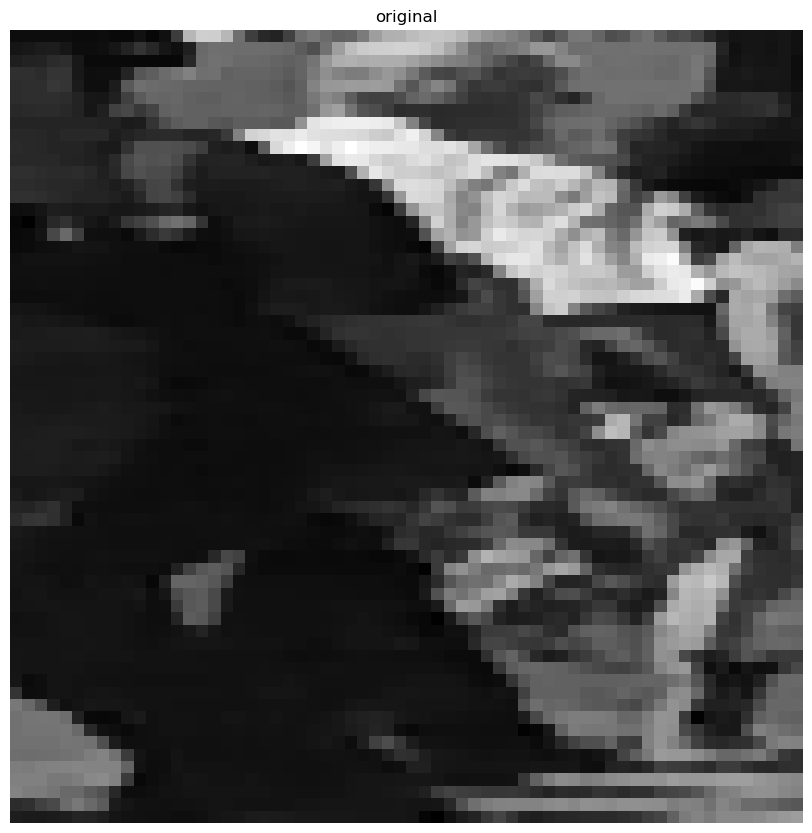

178


<Figure size 432x288 with 0 Axes>

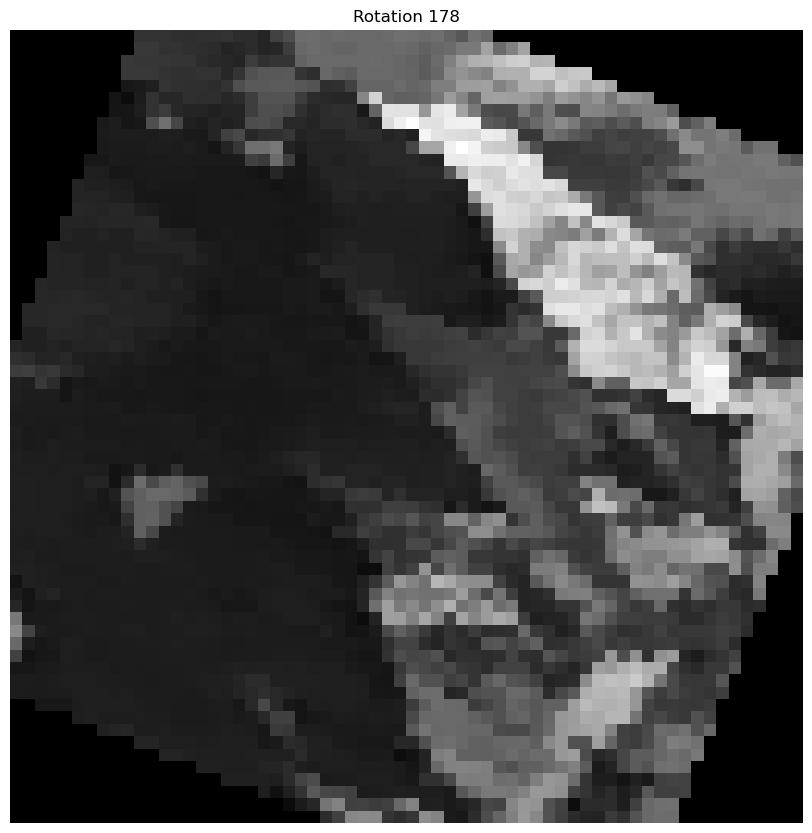

<Figure size 432x288 with 0 Axes>

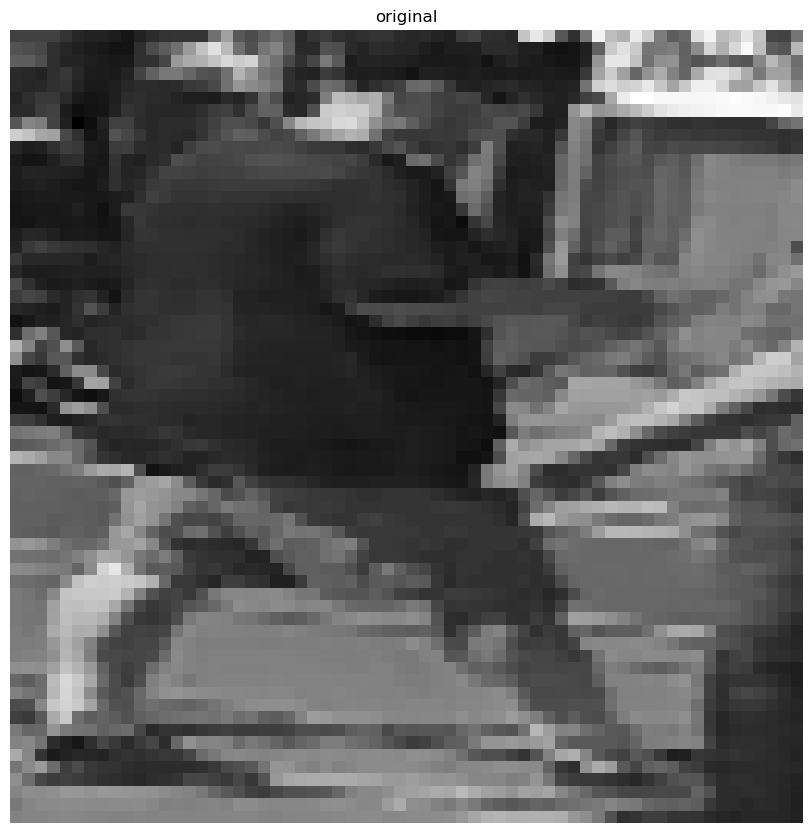

181


<Figure size 432x288 with 0 Axes>

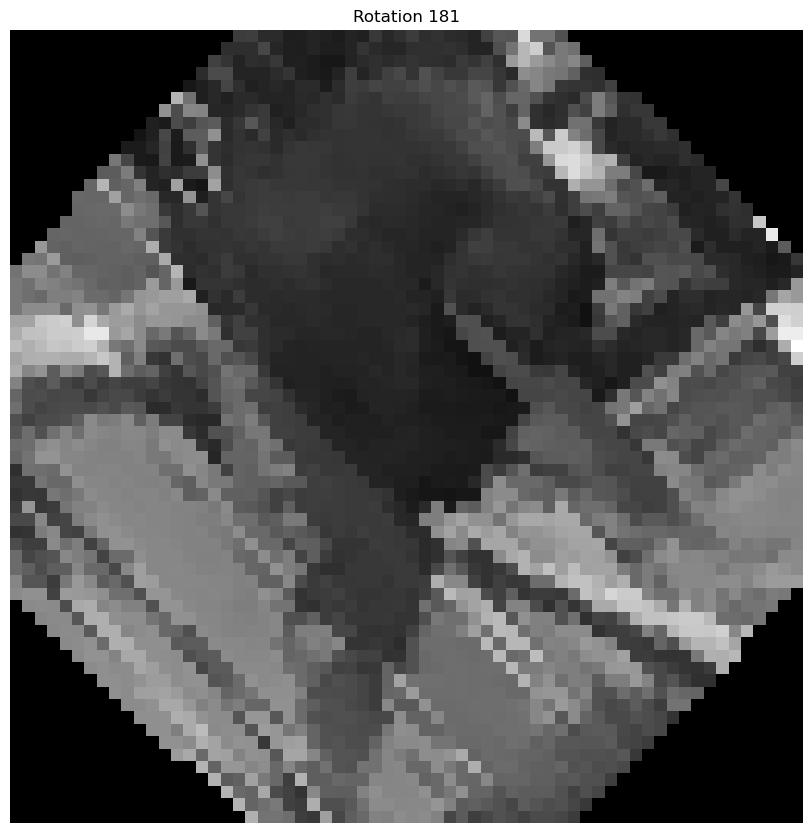

<Figure size 432x288 with 0 Axes>

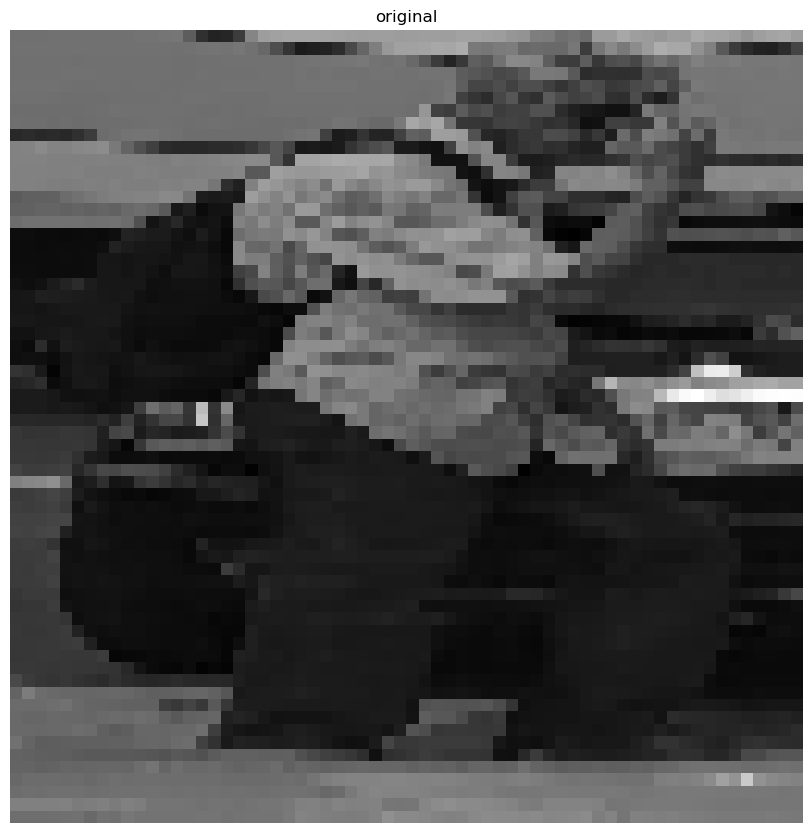

153


<Figure size 432x288 with 0 Axes>

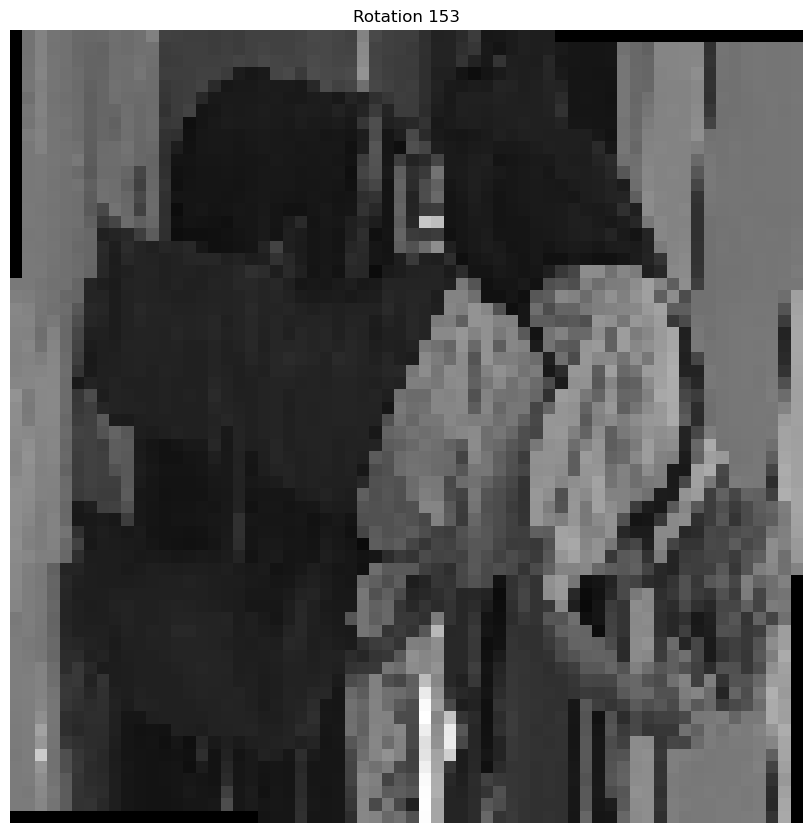

<Figure size 432x288 with 0 Axes>

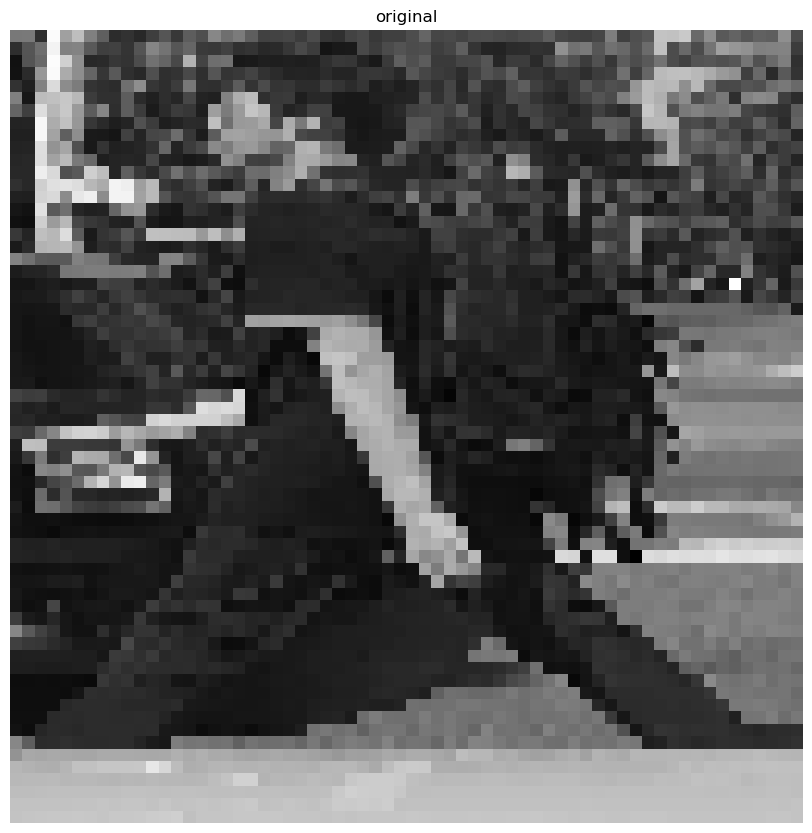

61


<Figure size 432x288 with 0 Axes>

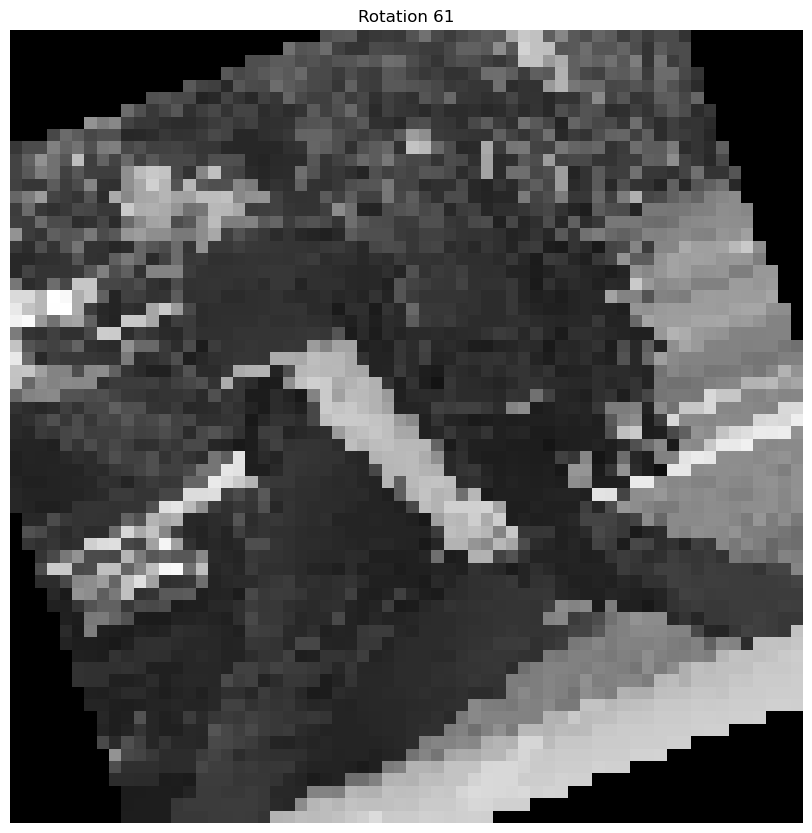

<Figure size 432x288 with 0 Axes>

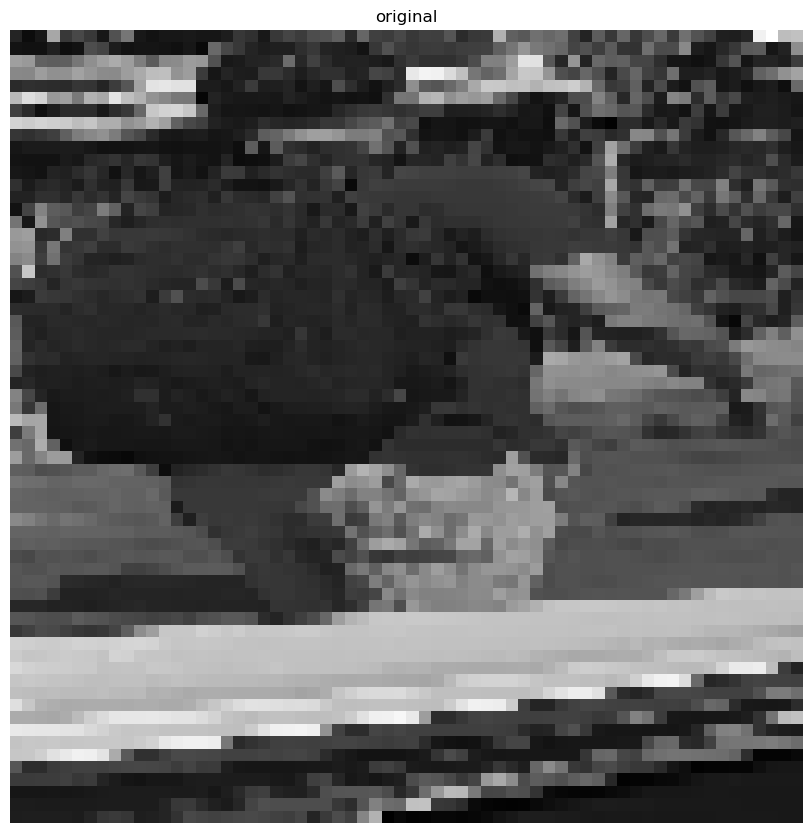

342


<Figure size 432x288 with 0 Axes>

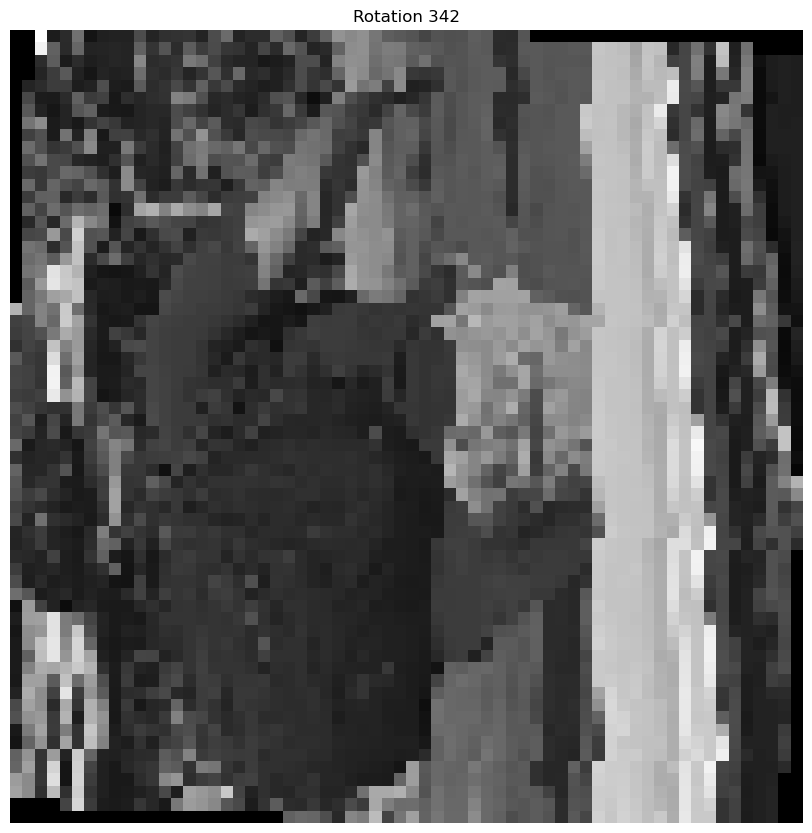

<Figure size 432x288 with 0 Axes>

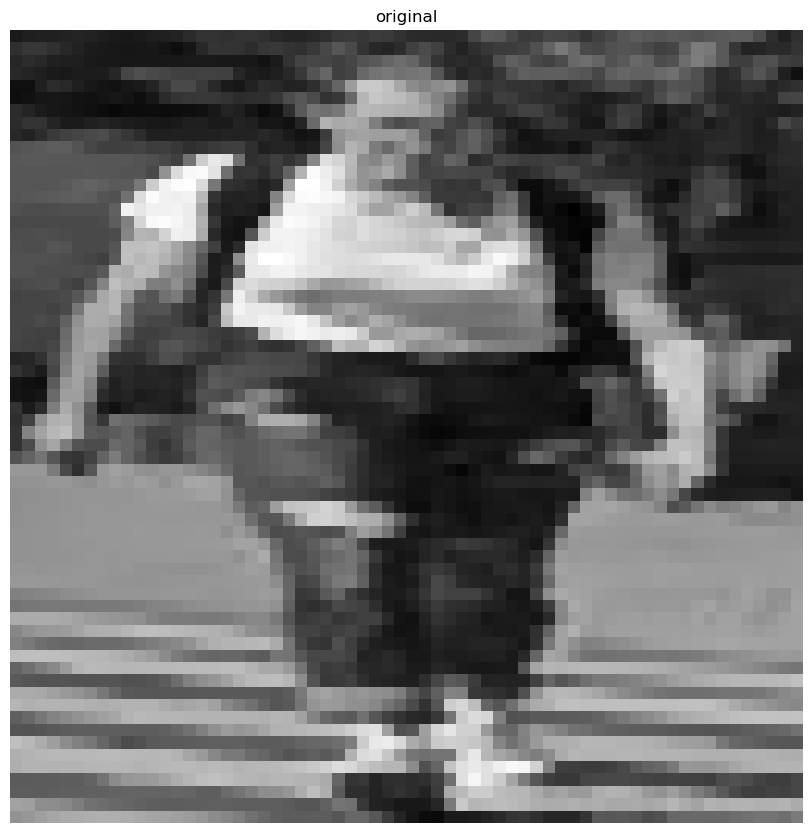

10


<Figure size 432x288 with 0 Axes>

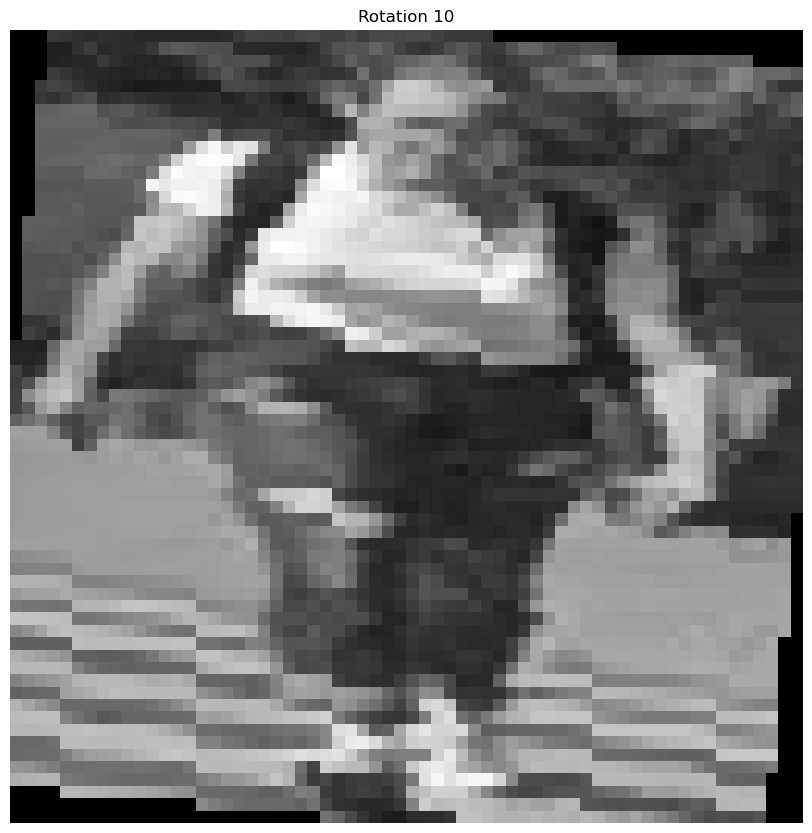

<Figure size 432x288 with 0 Axes>

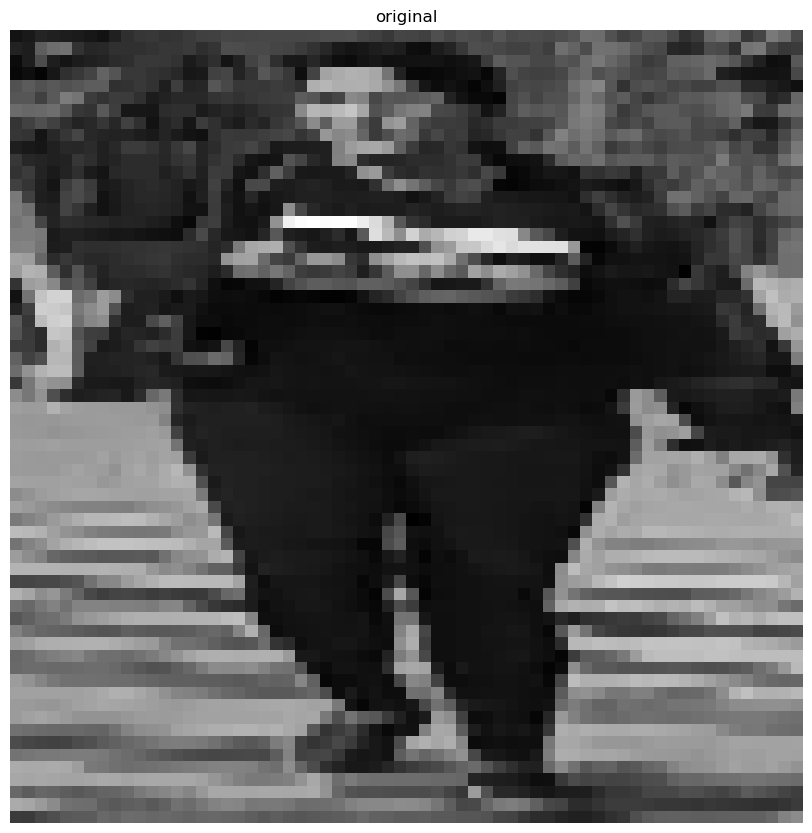

352


<Figure size 432x288 with 0 Axes>

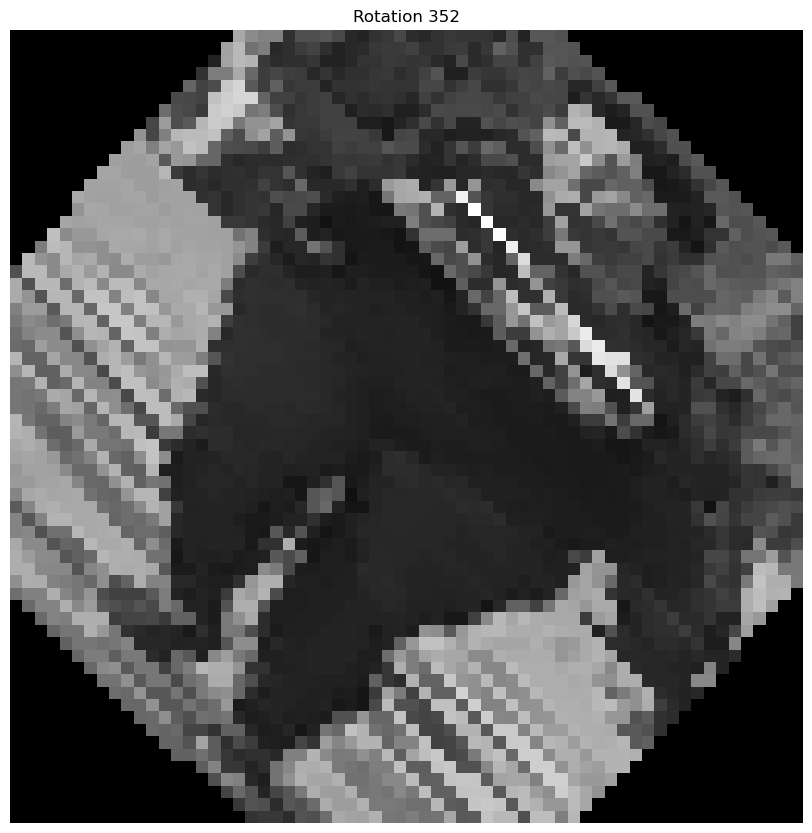

<Figure size 432x288 with 0 Axes>

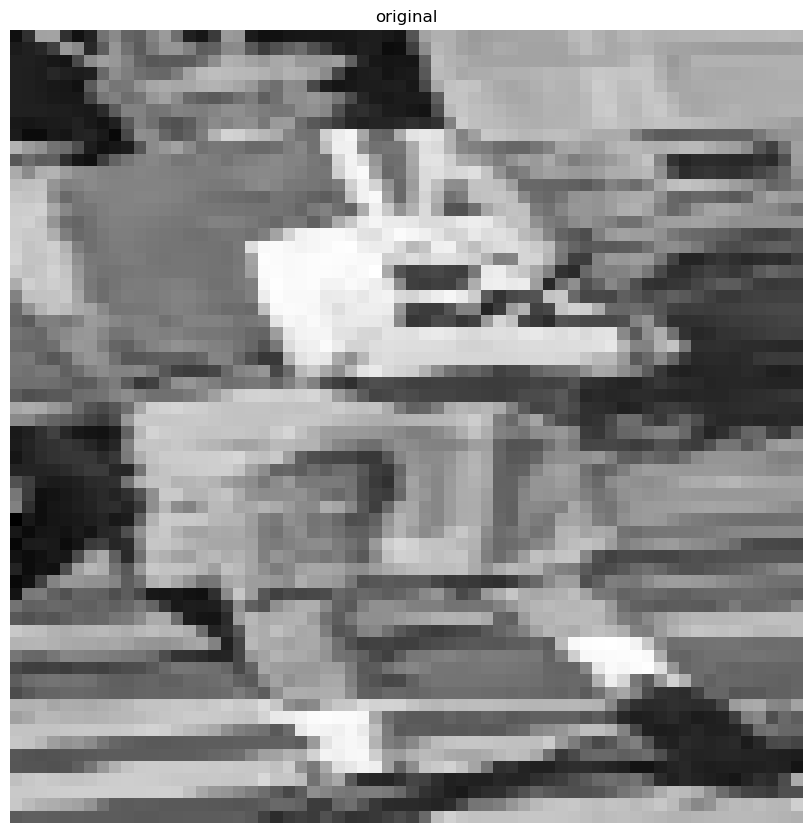

4


<Figure size 432x288 with 0 Axes>

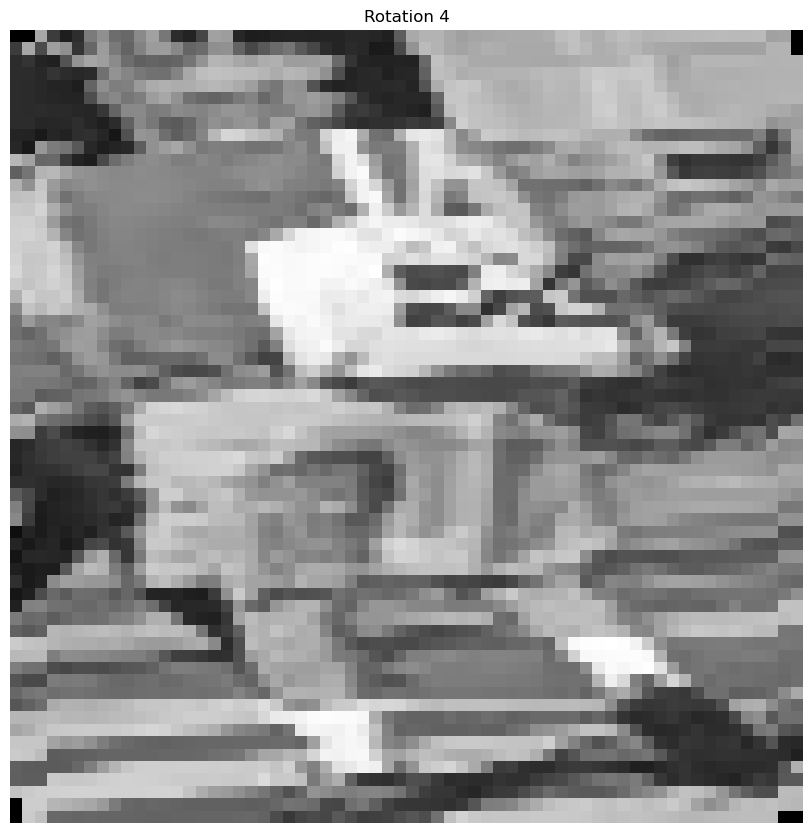

<Figure size 432x288 with 0 Axes>

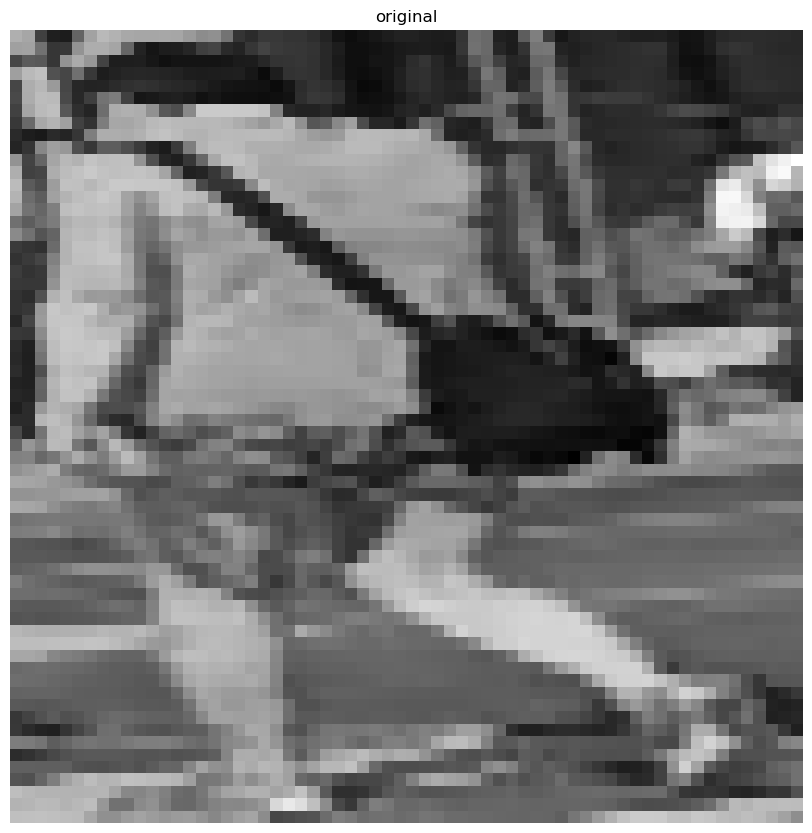

204


<Figure size 432x288 with 0 Axes>

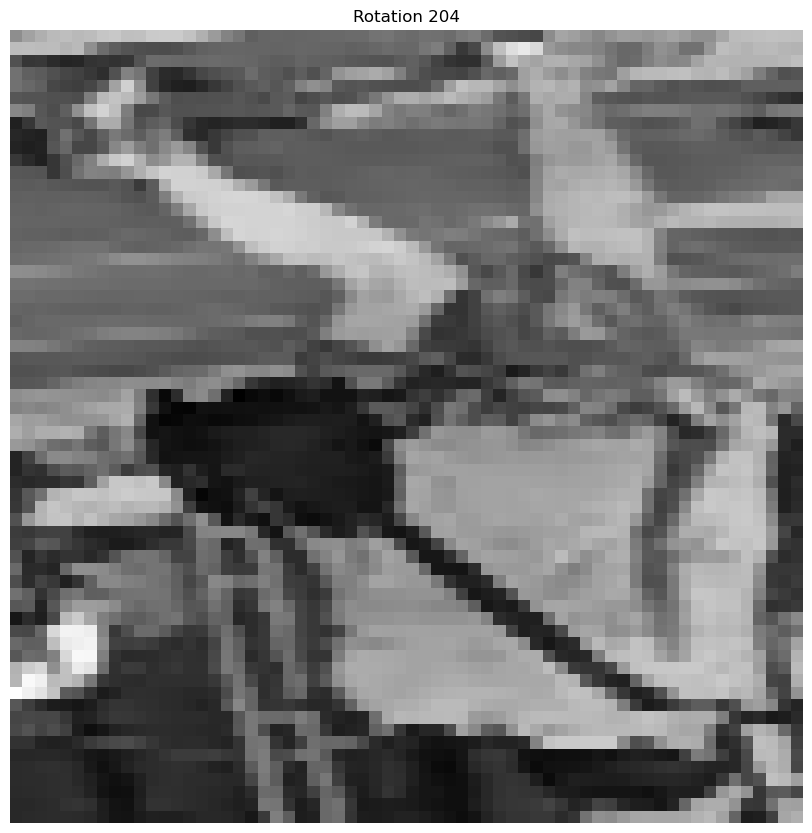

<Figure size 432x288 with 0 Axes>

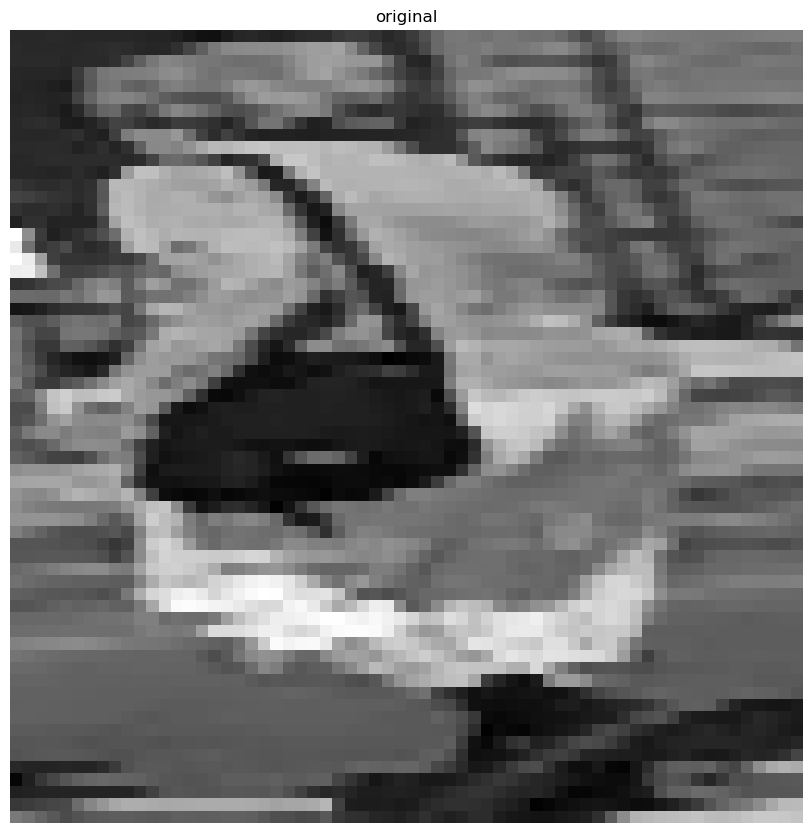

126


<Figure size 432x288 with 0 Axes>

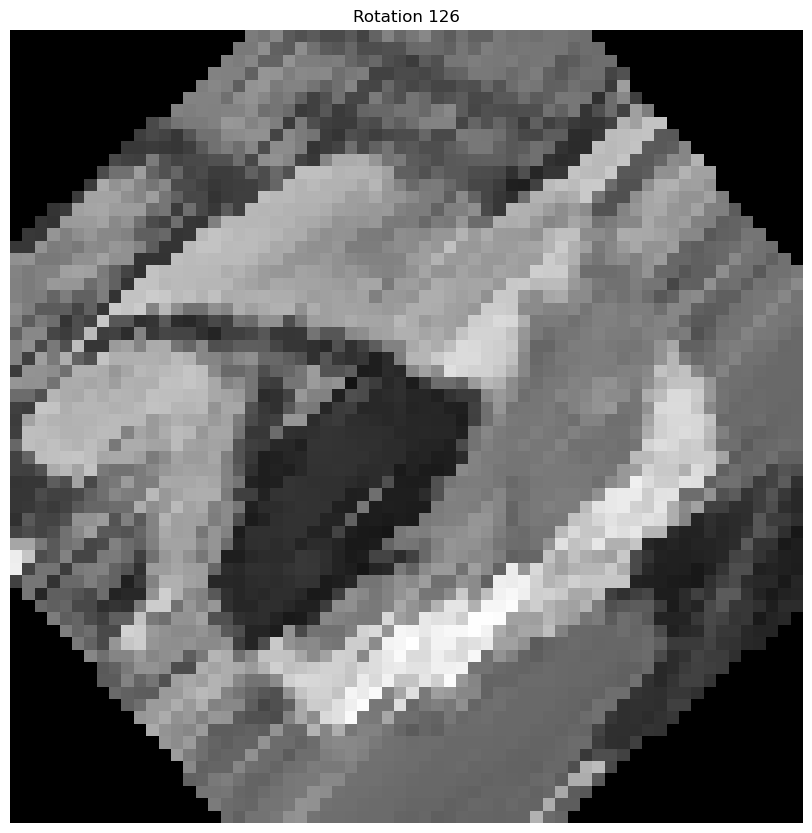

<Figure size 432x288 with 0 Axes>

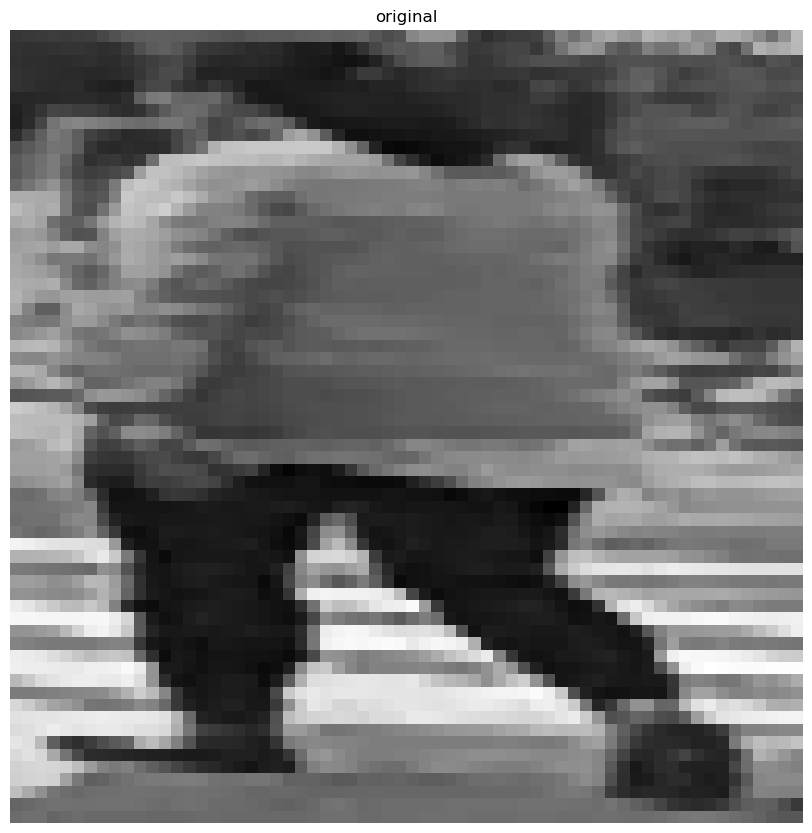

90


<Figure size 432x288 with 0 Axes>

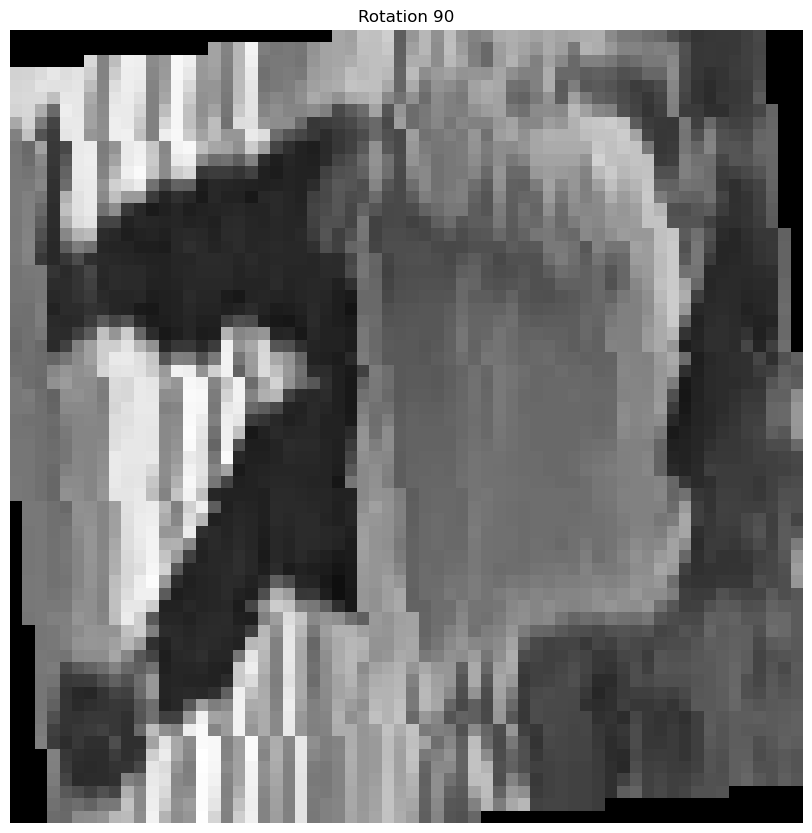

<Figure size 432x288 with 0 Axes>

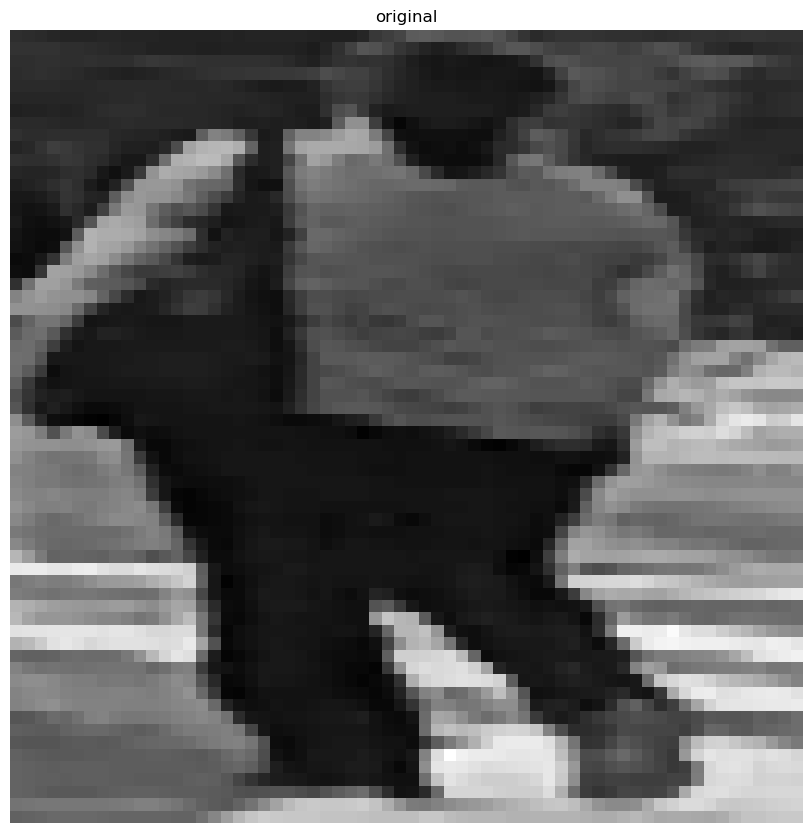

200


<Figure size 432x288 with 0 Axes>

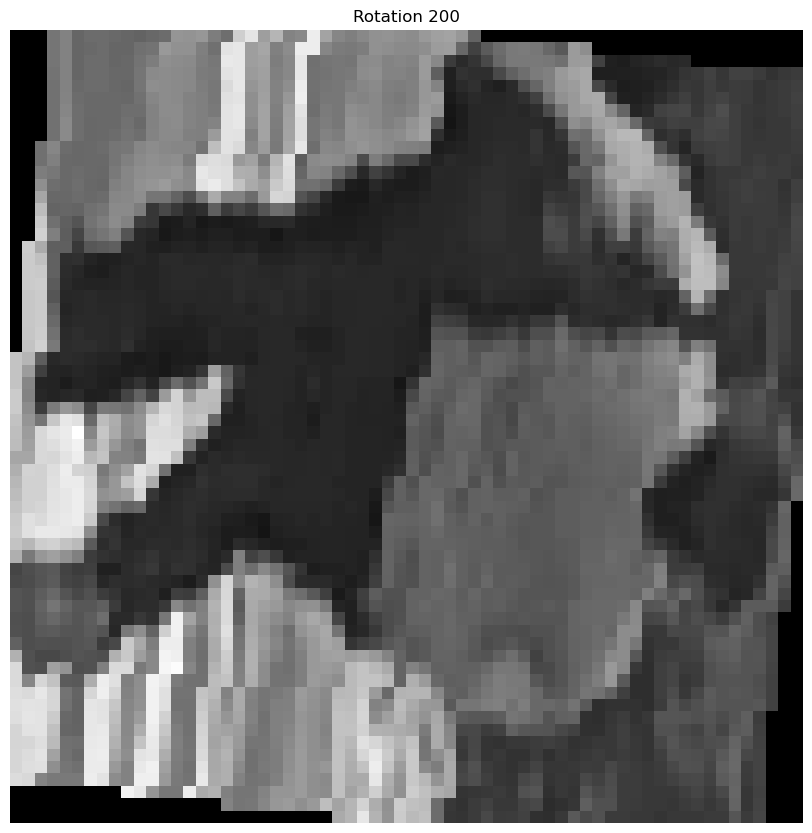

<Figure size 432x288 with 0 Axes>

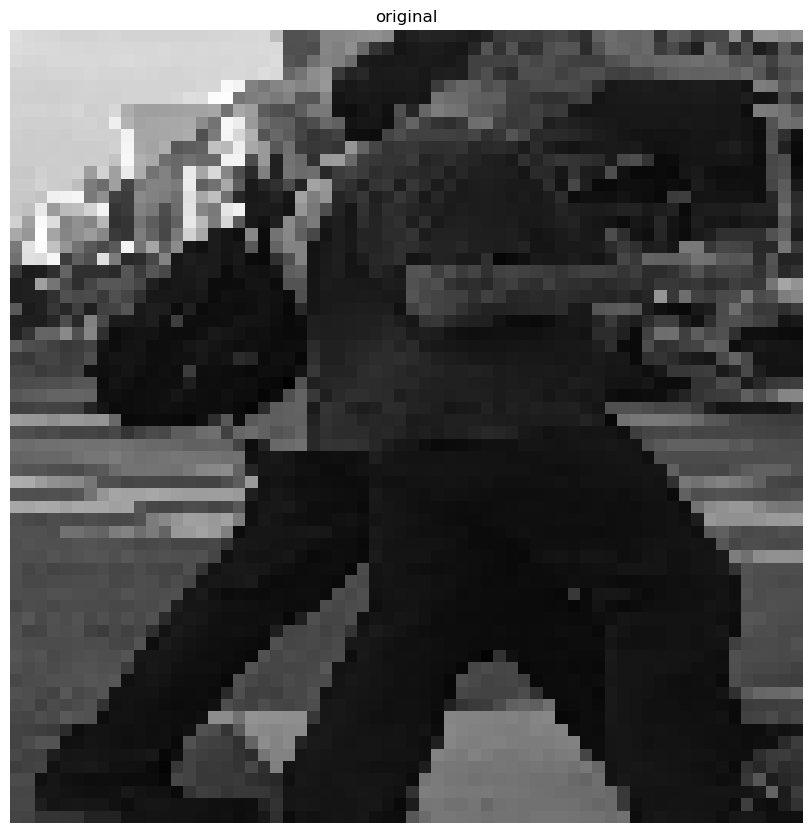

168


<Figure size 432x288 with 0 Axes>

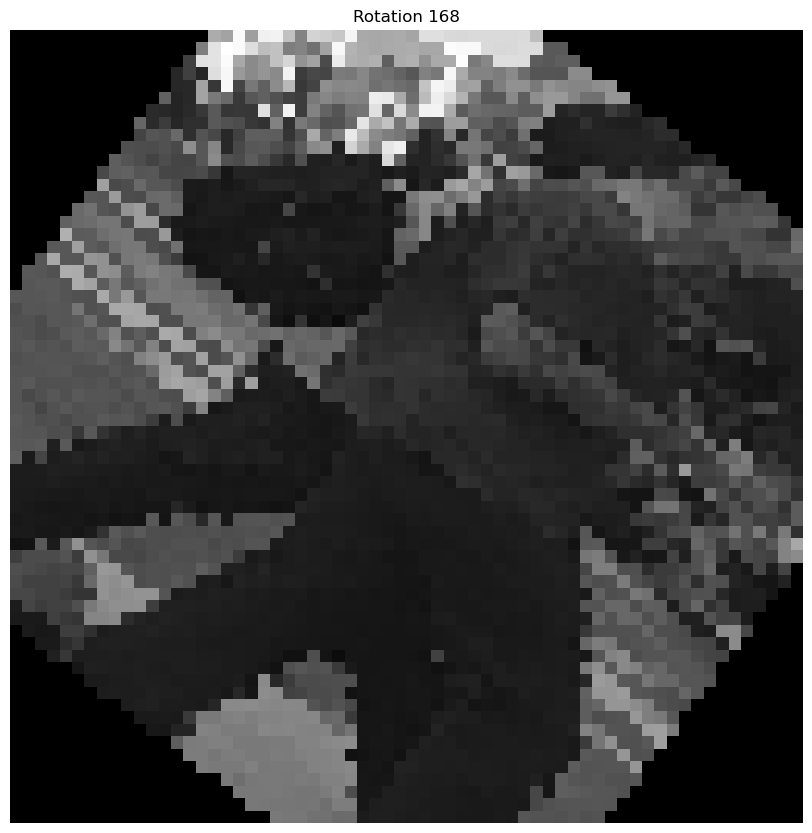

<Figure size 432x288 with 0 Axes>

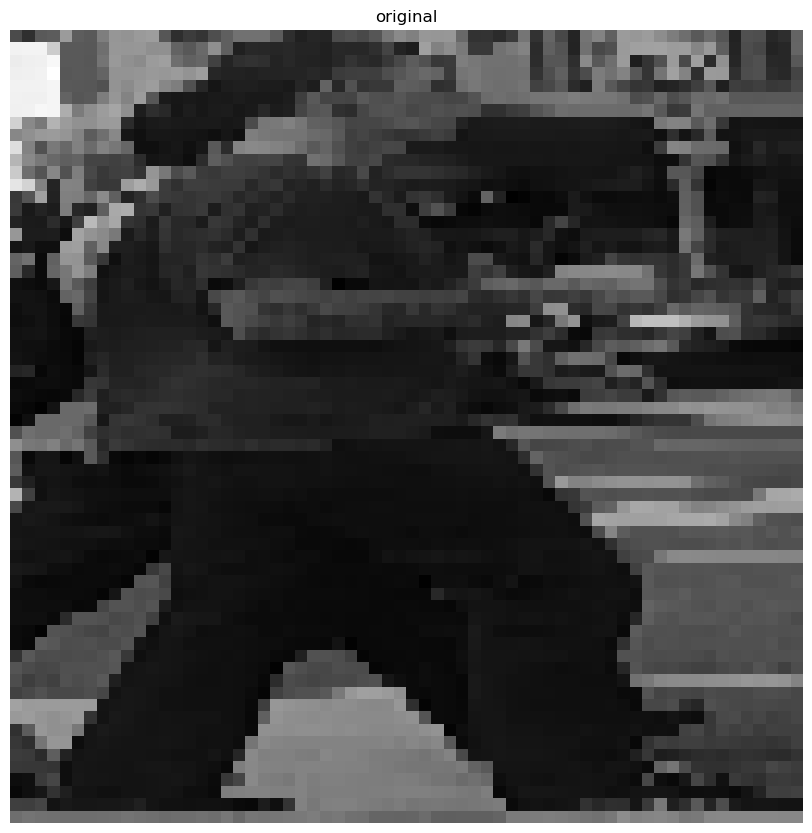

34


<Figure size 432x288 with 0 Axes>

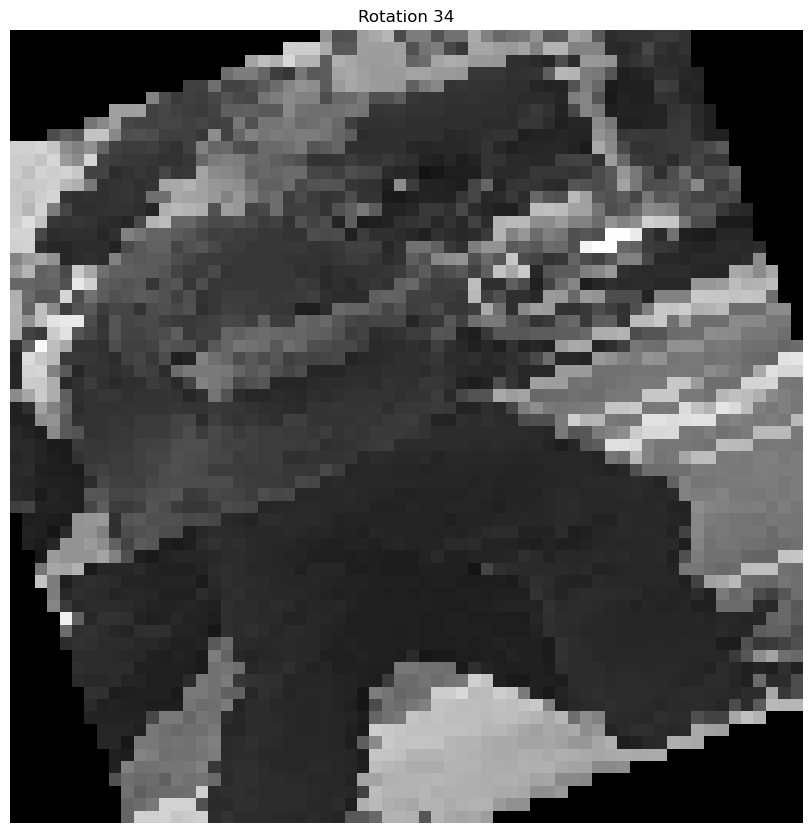

<Figure size 432x288 with 0 Axes>

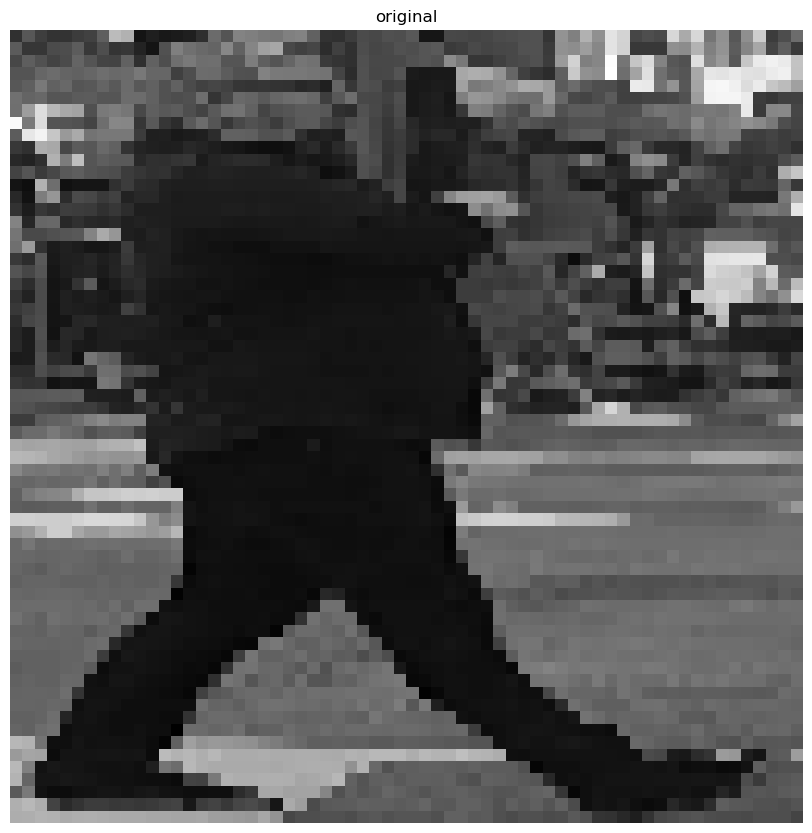

304


<Figure size 432x288 with 0 Axes>

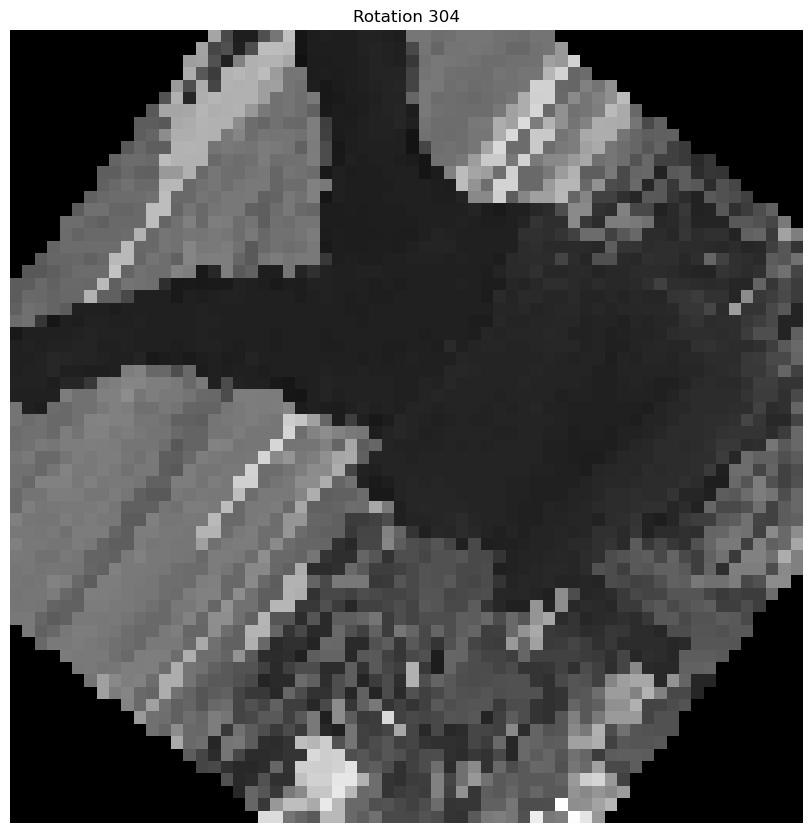

<Figure size 432x288 with 0 Axes>

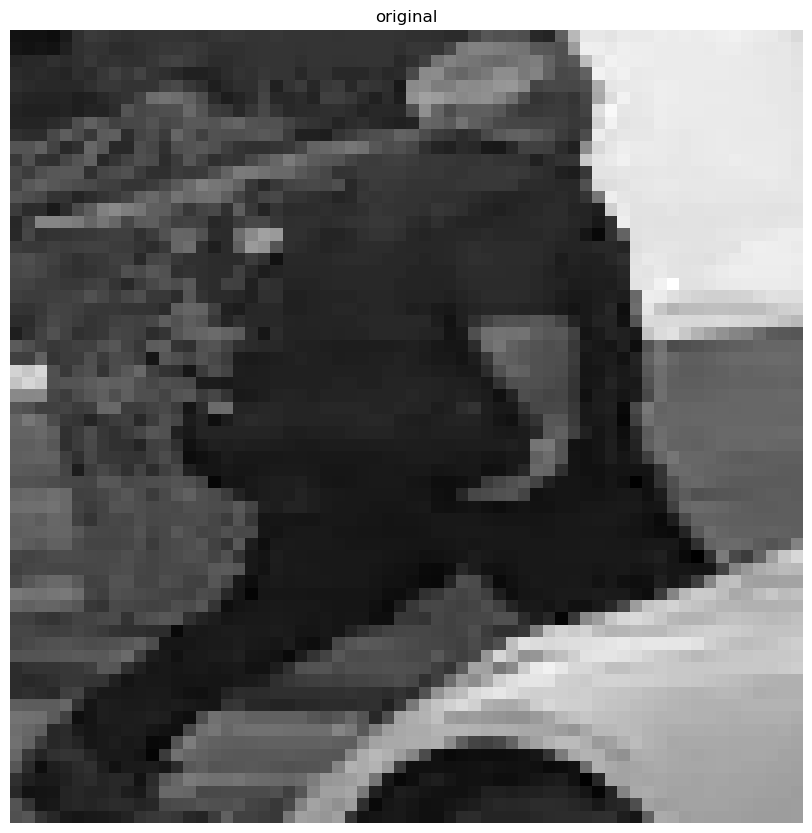

203


<Figure size 432x288 with 0 Axes>

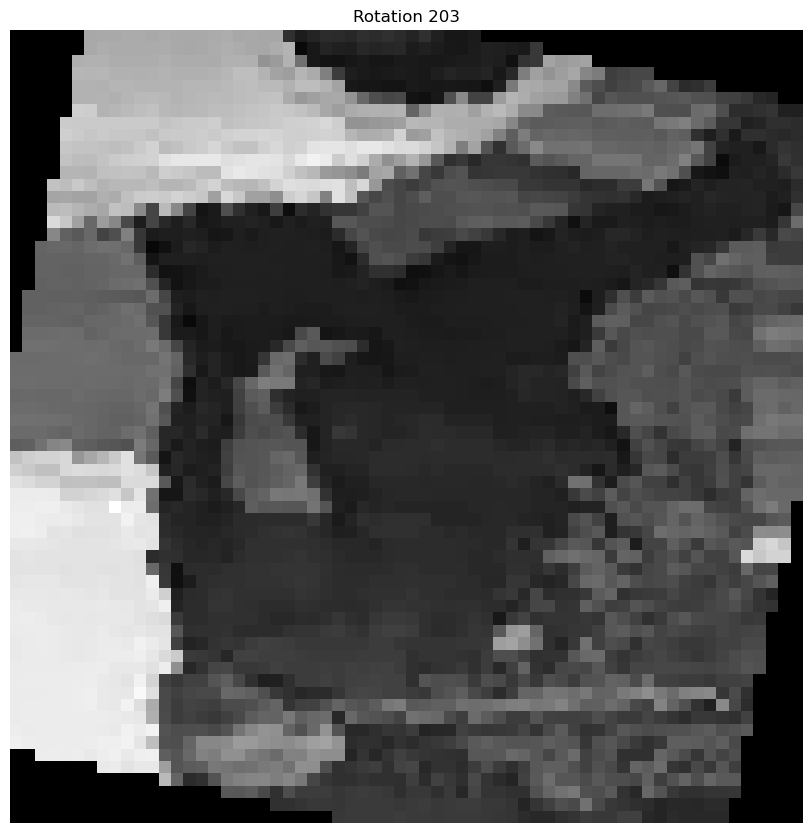

<Figure size 432x288 with 0 Axes>

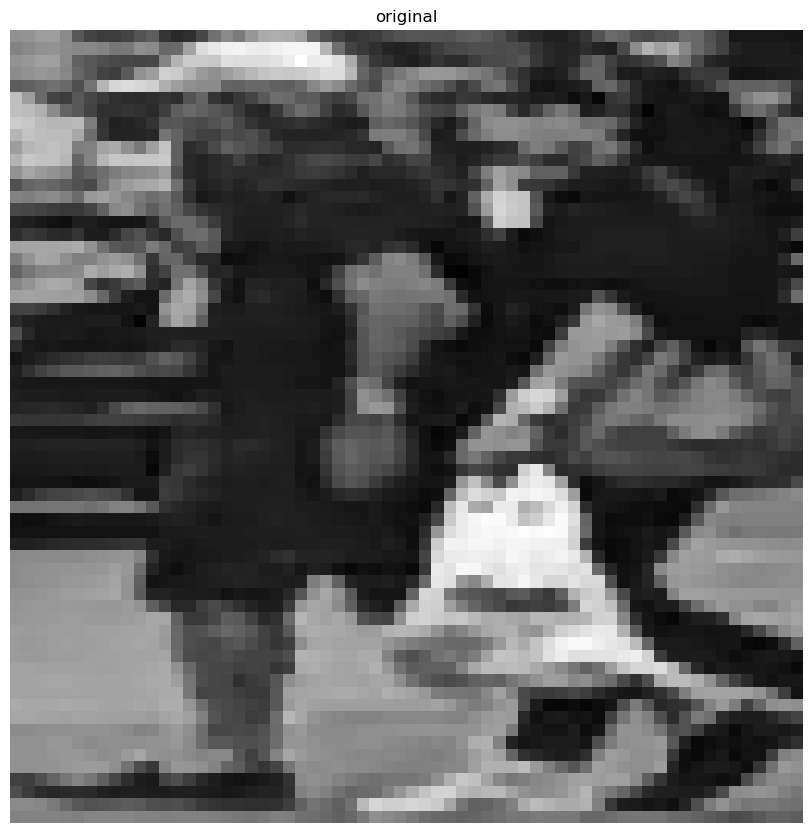

36


<Figure size 432x288 with 0 Axes>

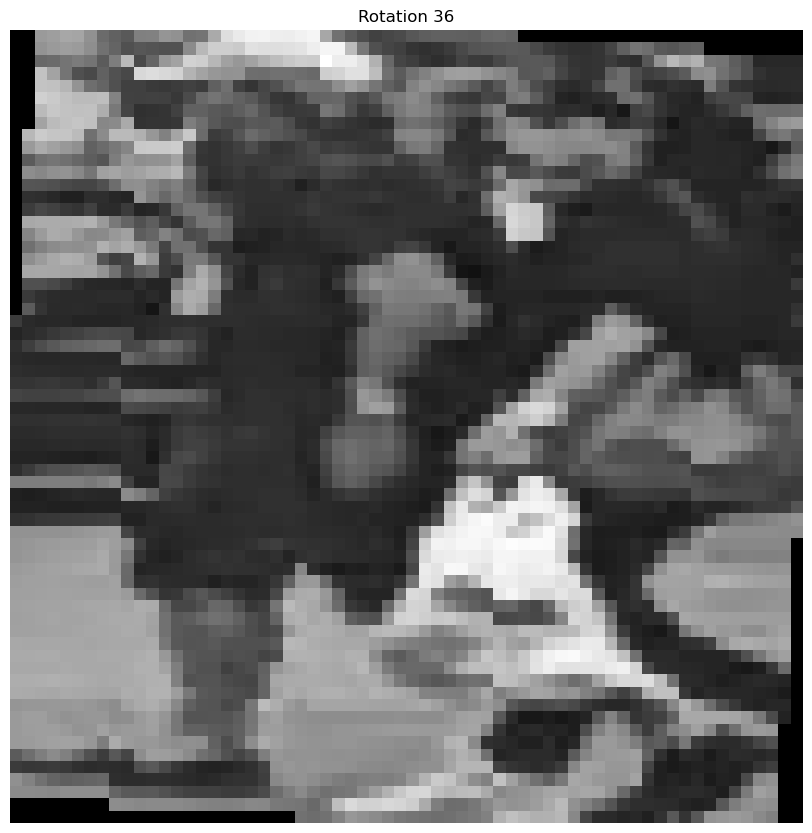

<Figure size 432x288 with 0 Axes>

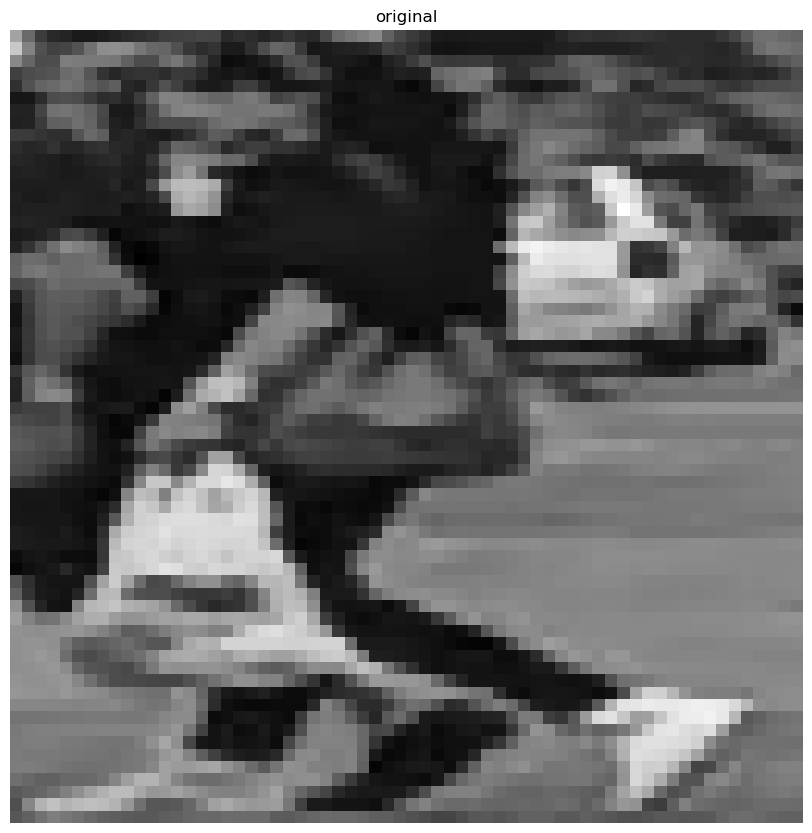

161


<Figure size 432x288 with 0 Axes>

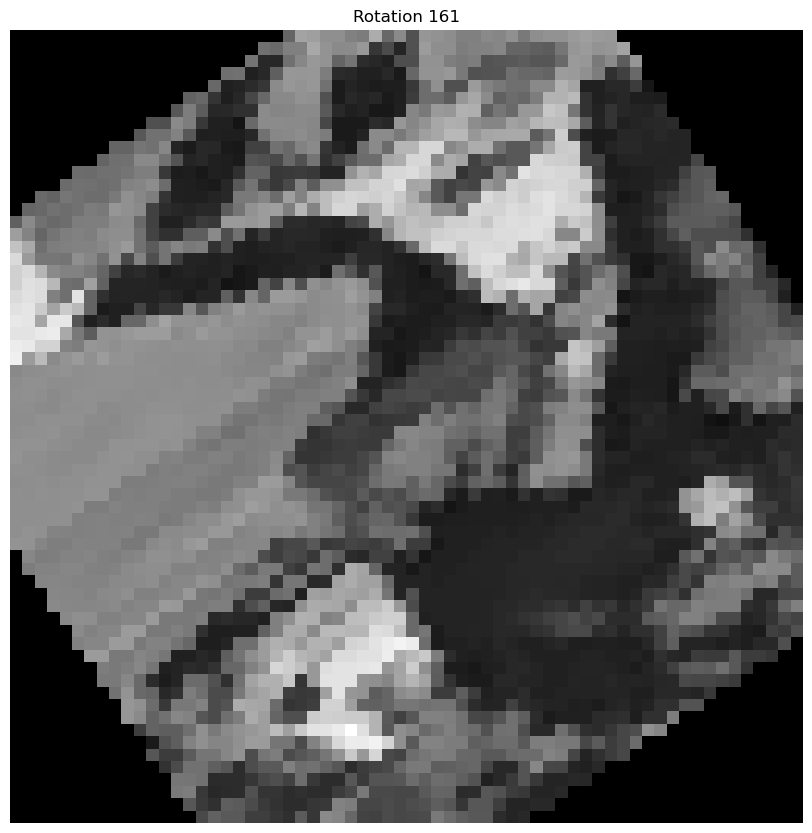

<Figure size 432x288 with 0 Axes>

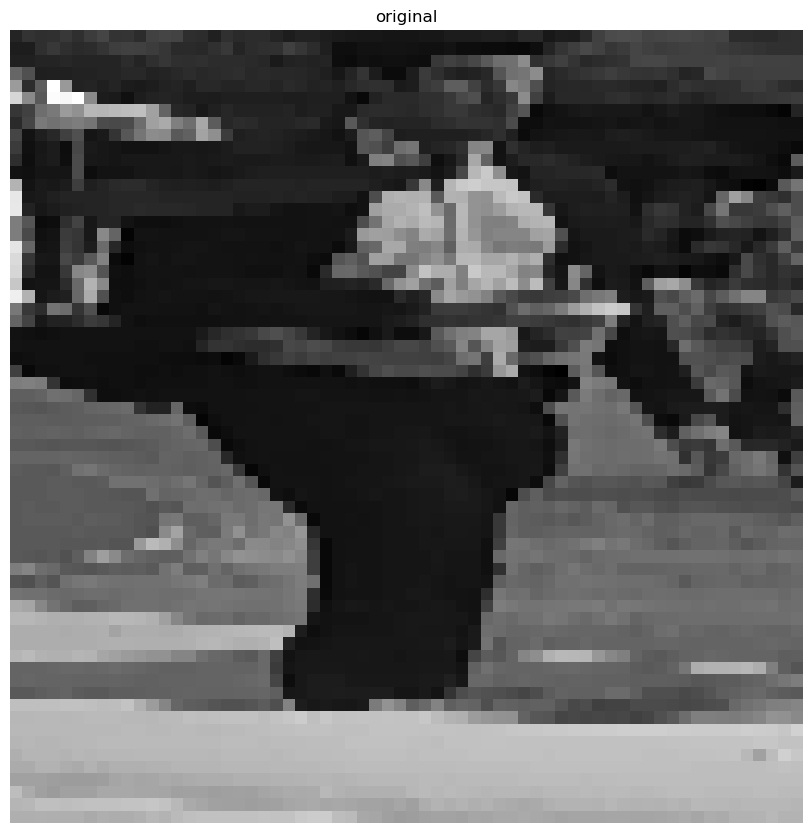

291


<Figure size 432x288 with 0 Axes>

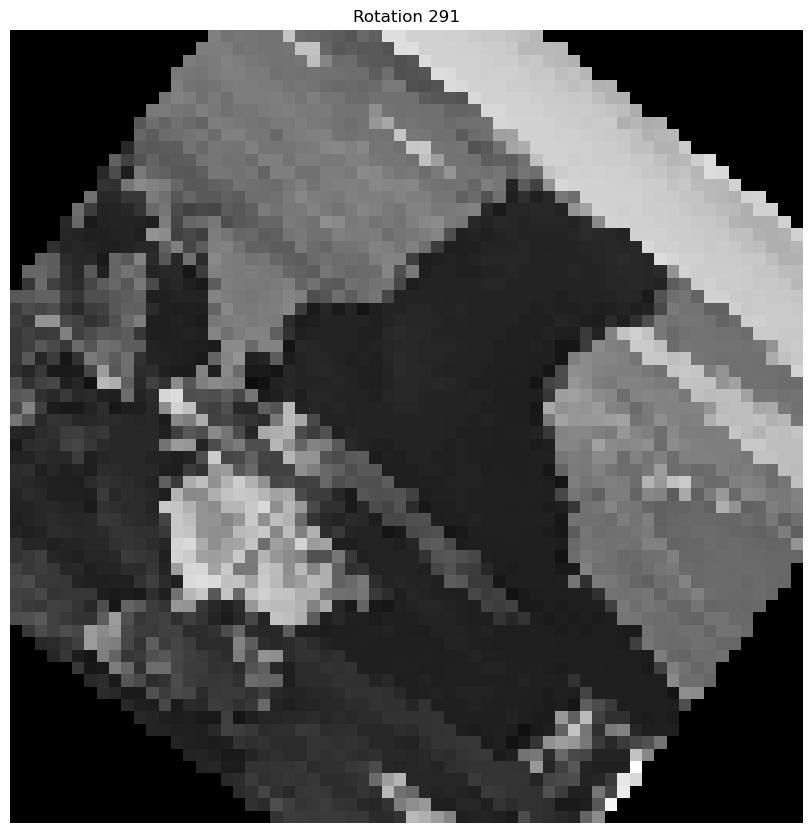

<Figure size 432x288 with 0 Axes>

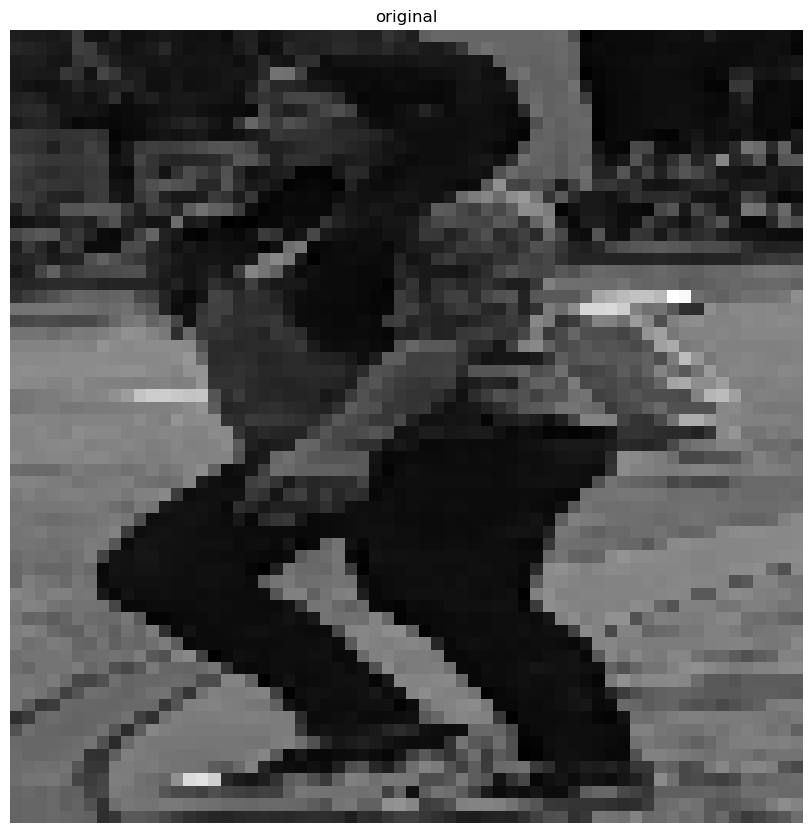

174


<Figure size 432x288 with 0 Axes>

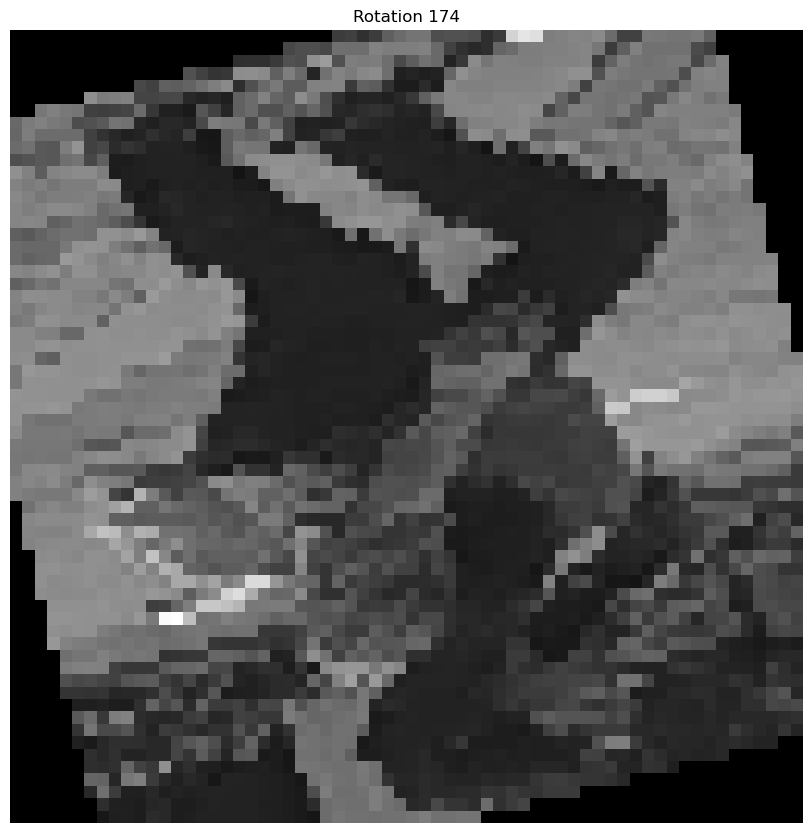

<Figure size 432x288 with 0 Axes>

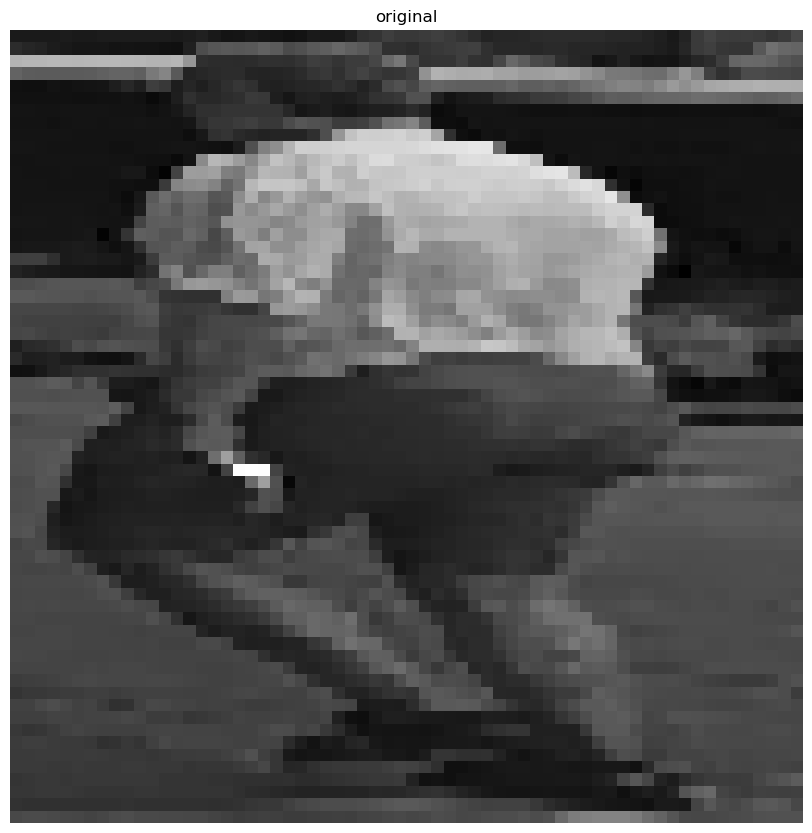

230


<Figure size 432x288 with 0 Axes>

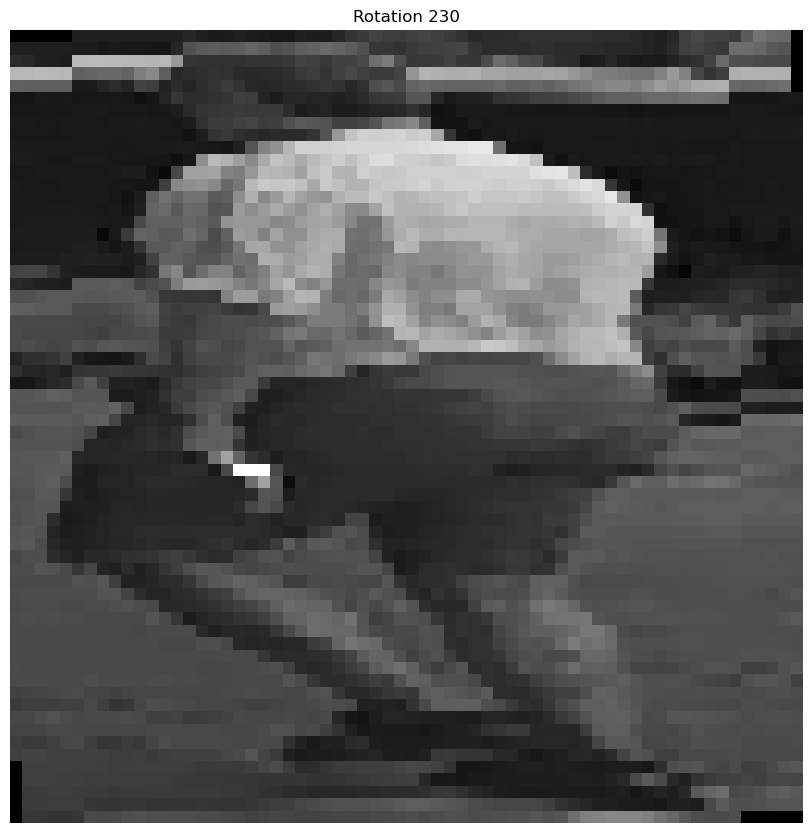

<Figure size 432x288 with 0 Axes>

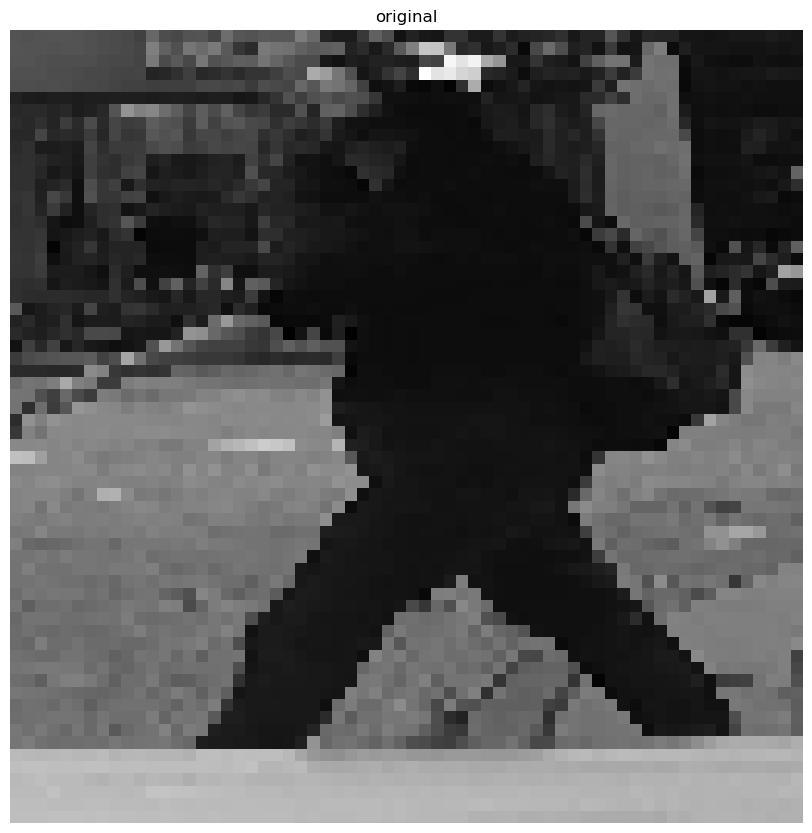

304


<Figure size 432x288 with 0 Axes>

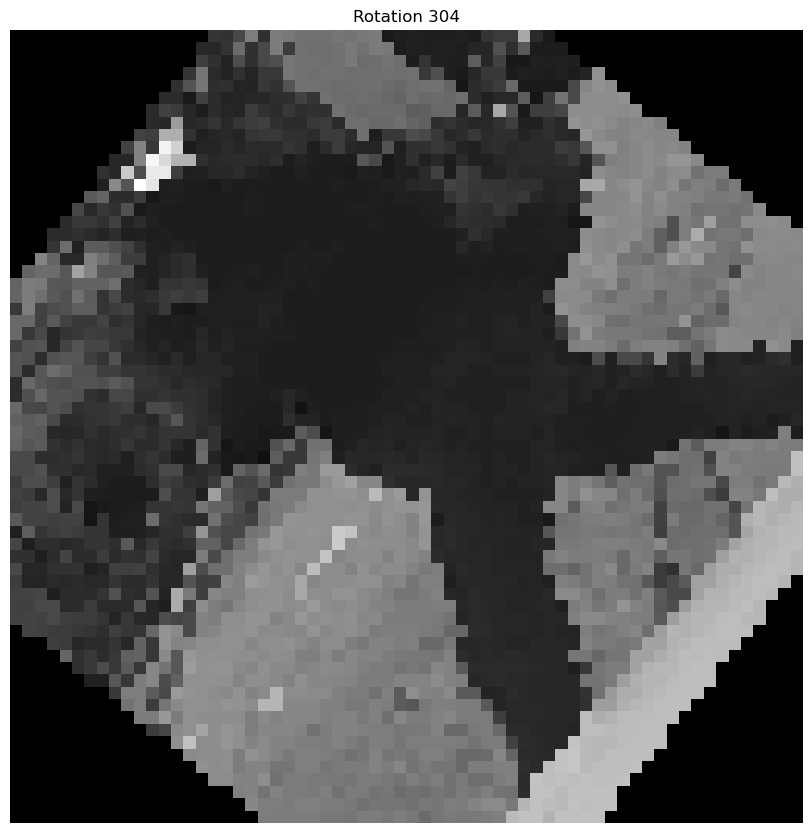

<Figure size 432x288 with 0 Axes>

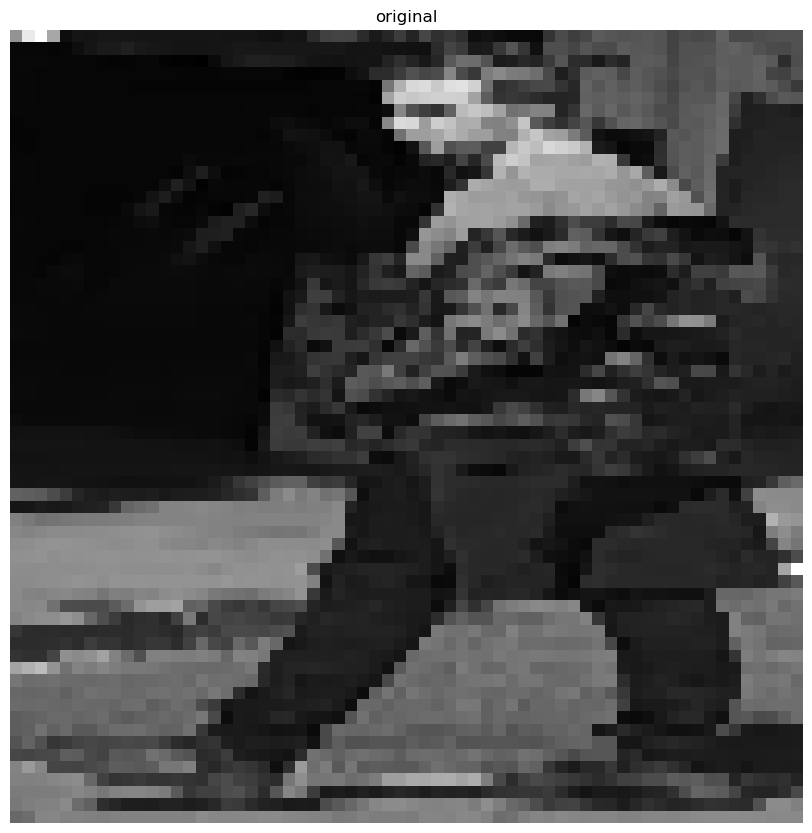

38


<Figure size 432x288 with 0 Axes>

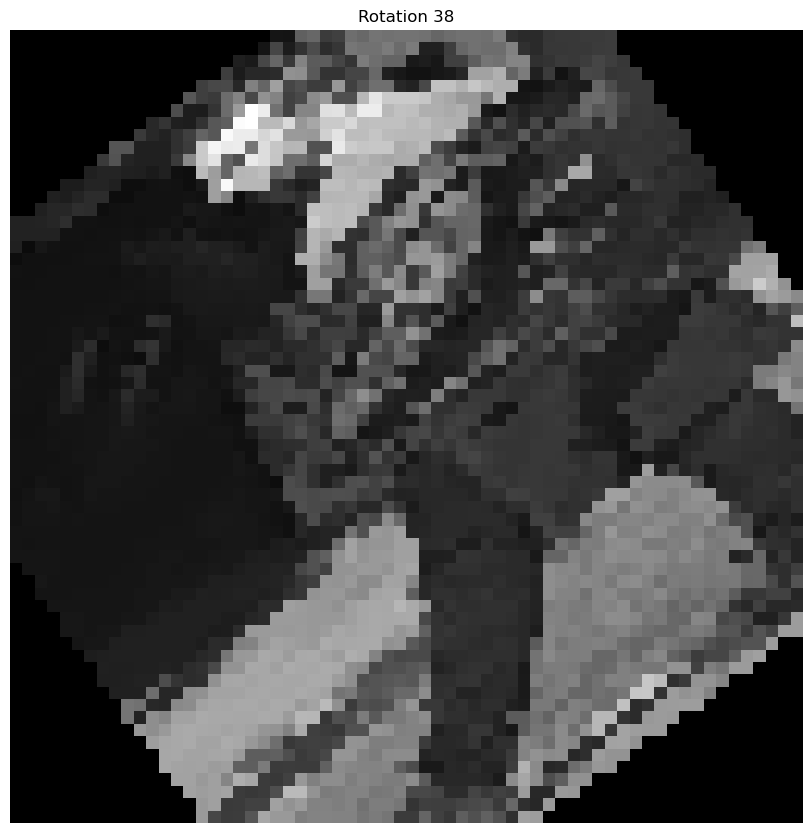

<Figure size 432x288 with 0 Axes>

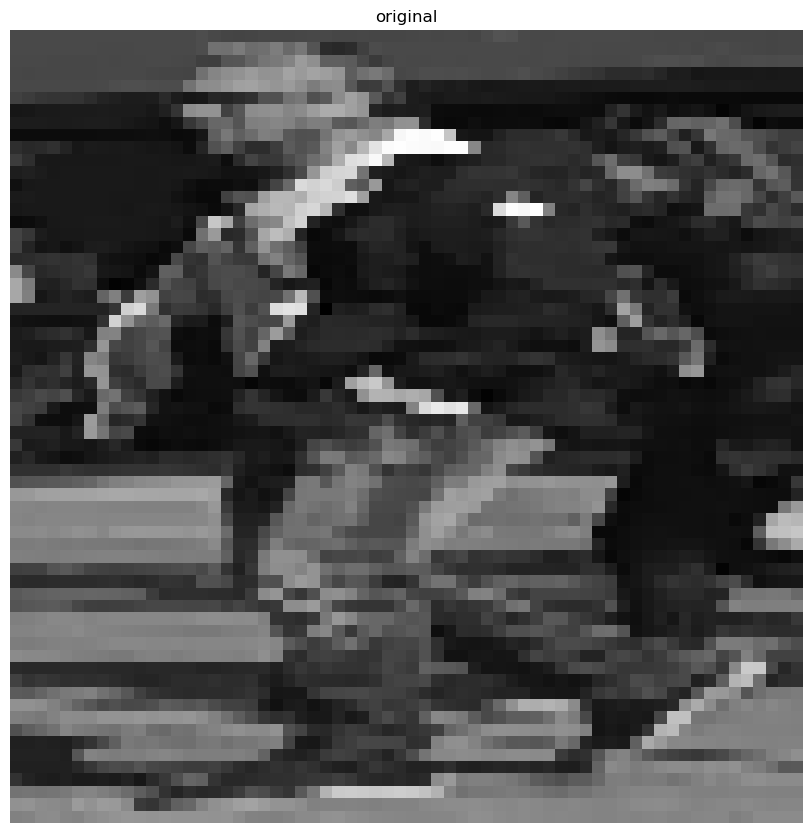

25


<Figure size 432x288 with 0 Axes>

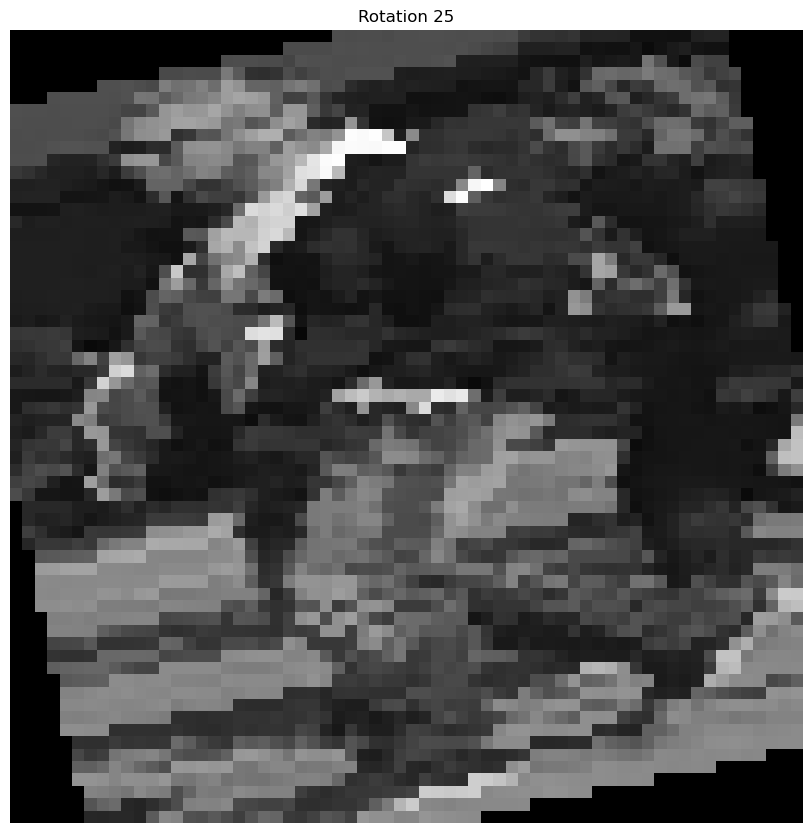

<Figure size 432x288 with 0 Axes>

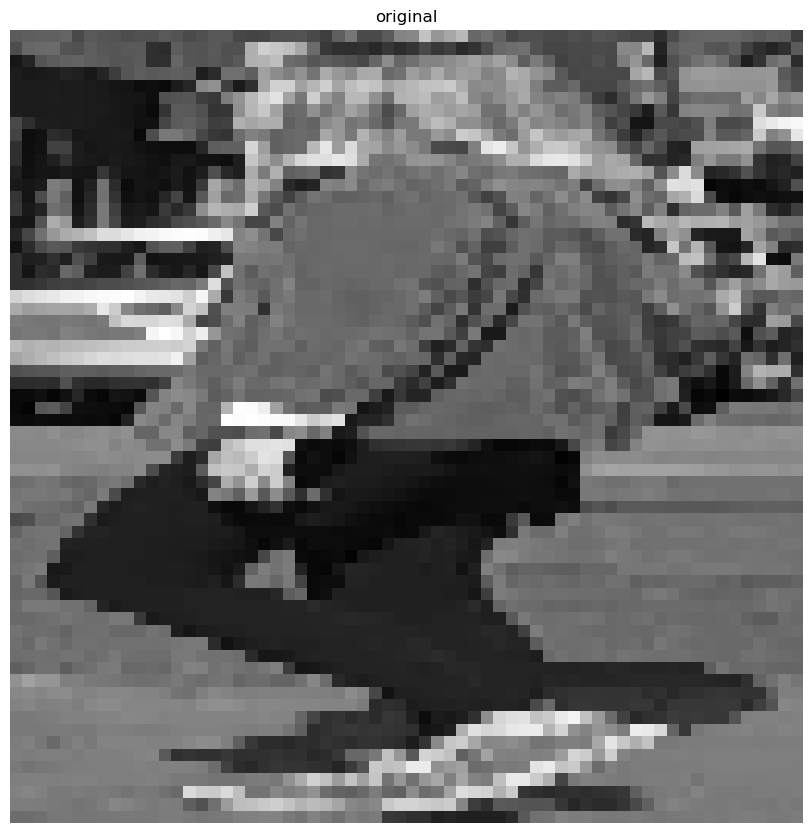

54


<Figure size 432x288 with 0 Axes>

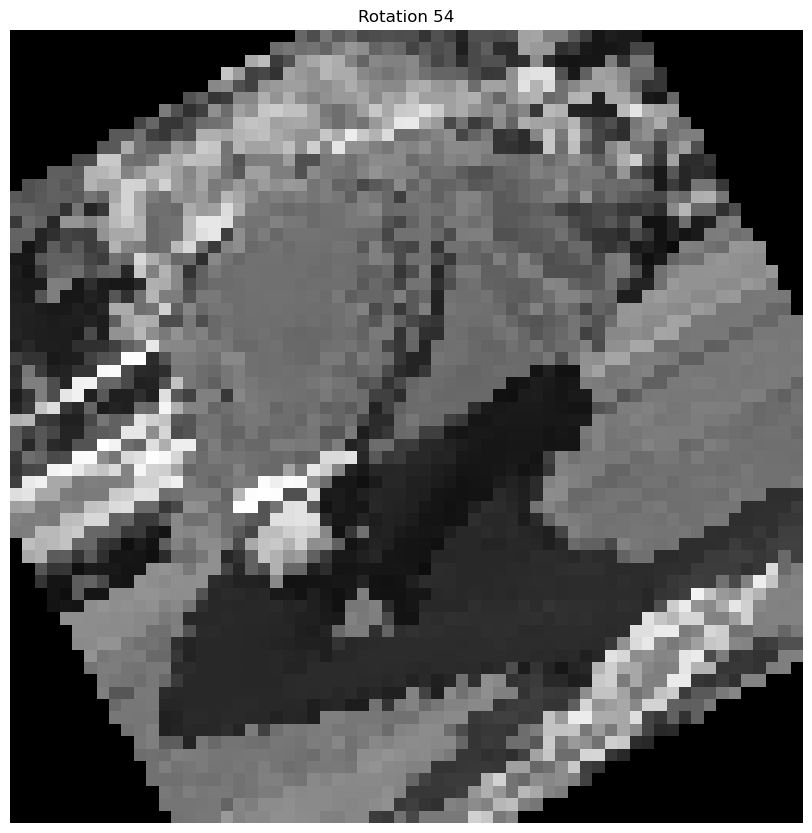

<Figure size 432x288 with 0 Axes>

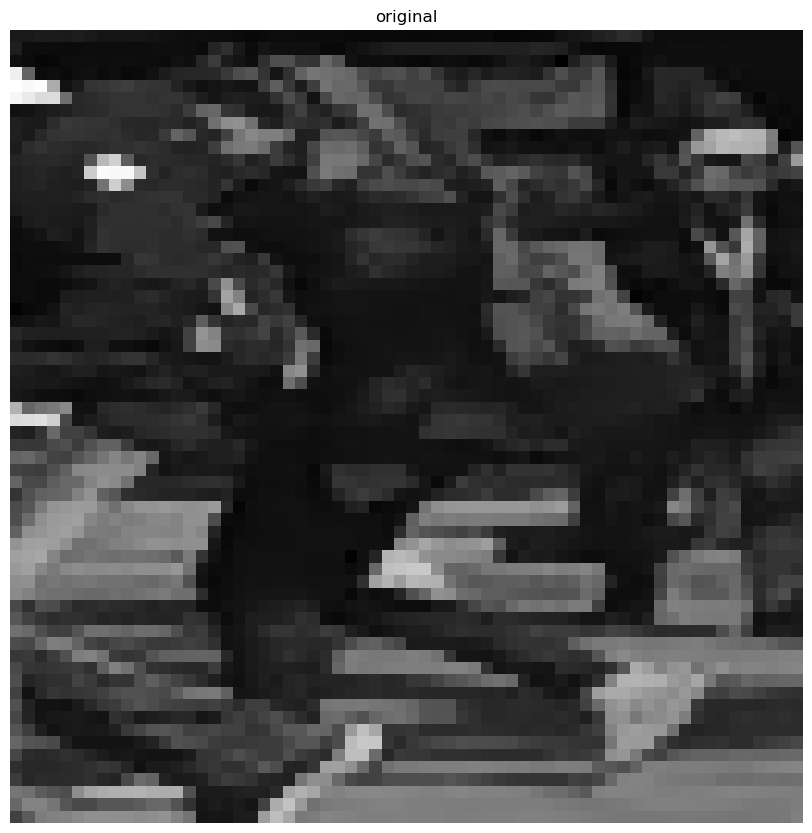

224


<Figure size 432x288 with 0 Axes>

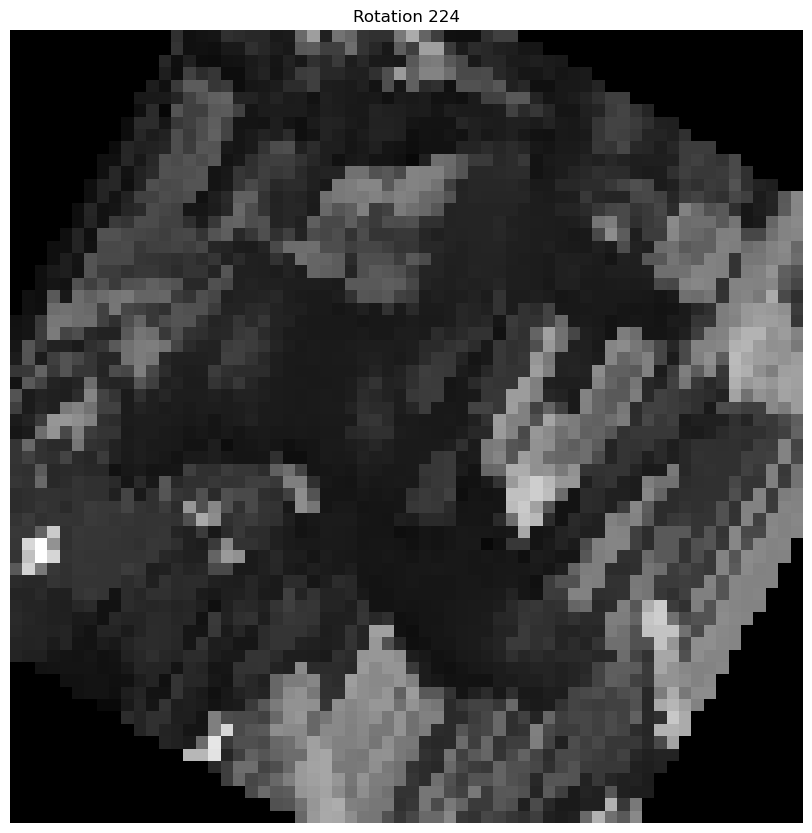

<Figure size 432x288 with 0 Axes>

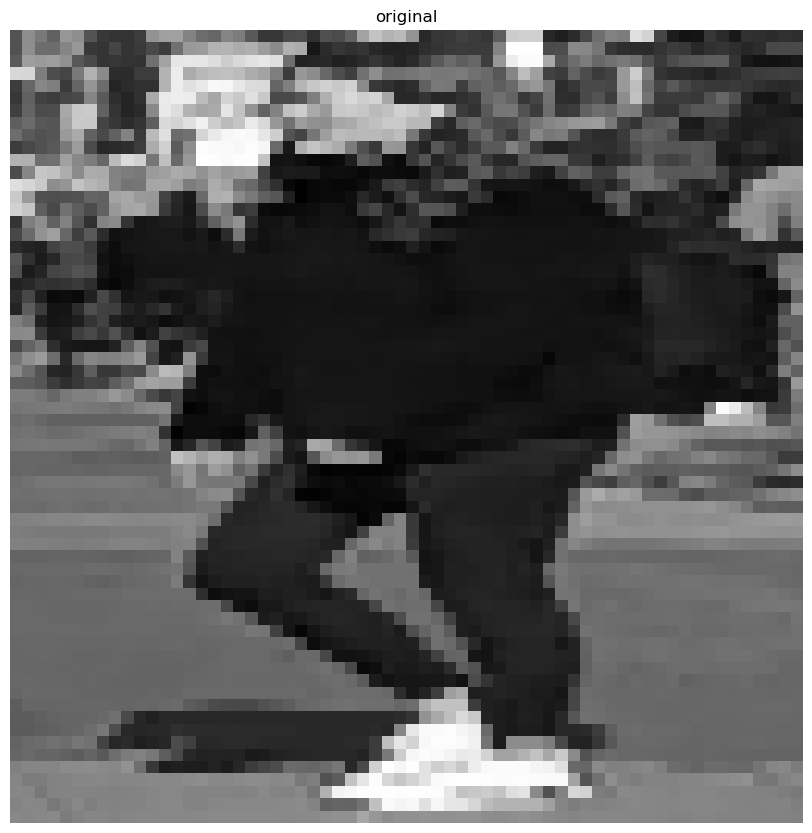

137


<Figure size 432x288 with 0 Axes>

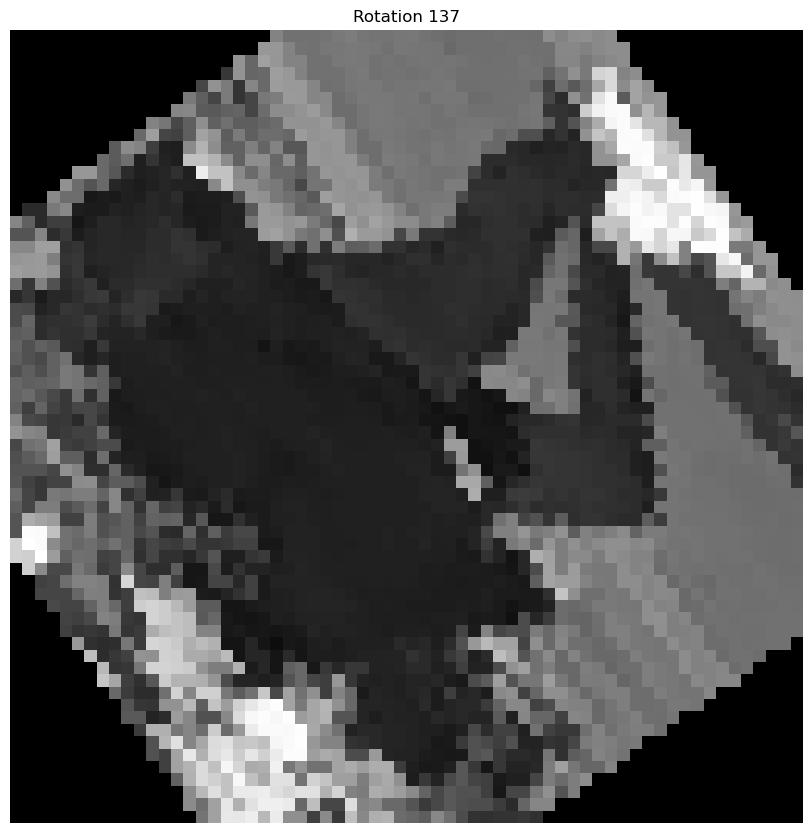

<Figure size 432x288 with 0 Axes>

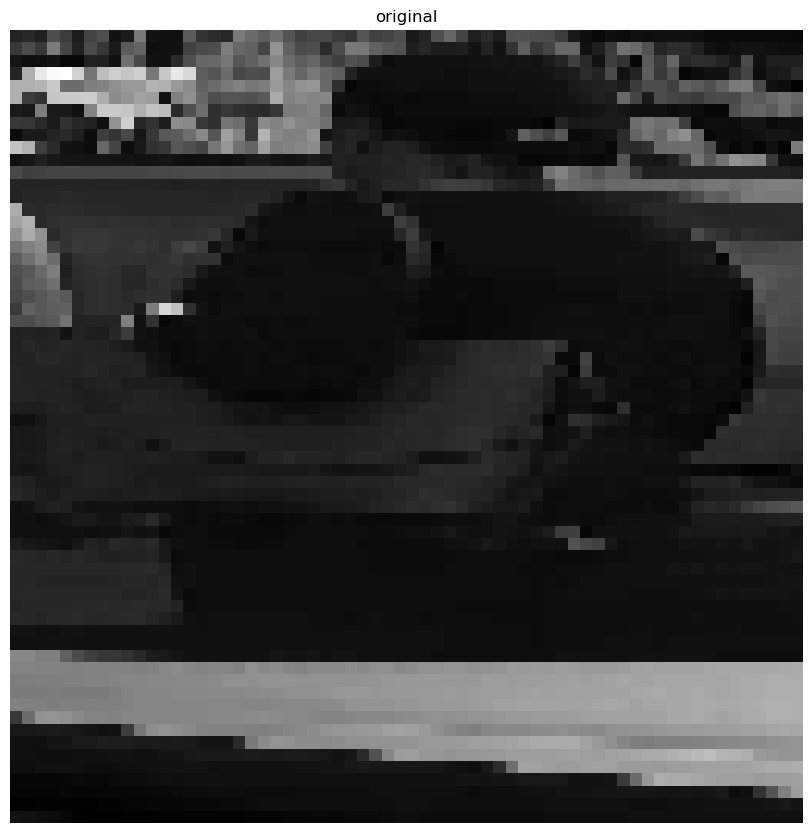

355


<Figure size 432x288 with 0 Axes>

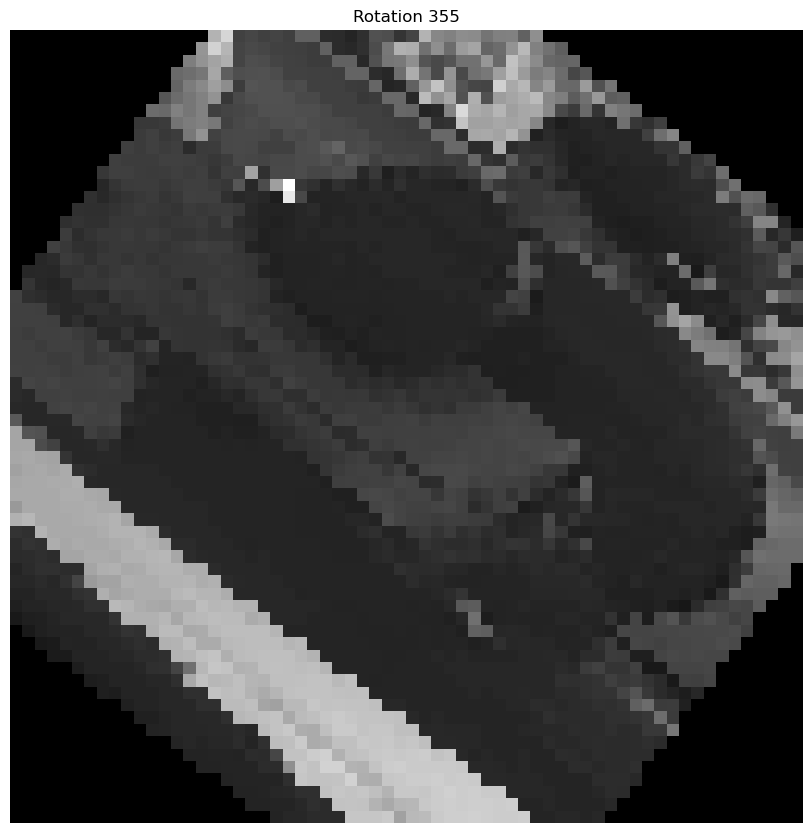

<Figure size 432x288 with 0 Axes>

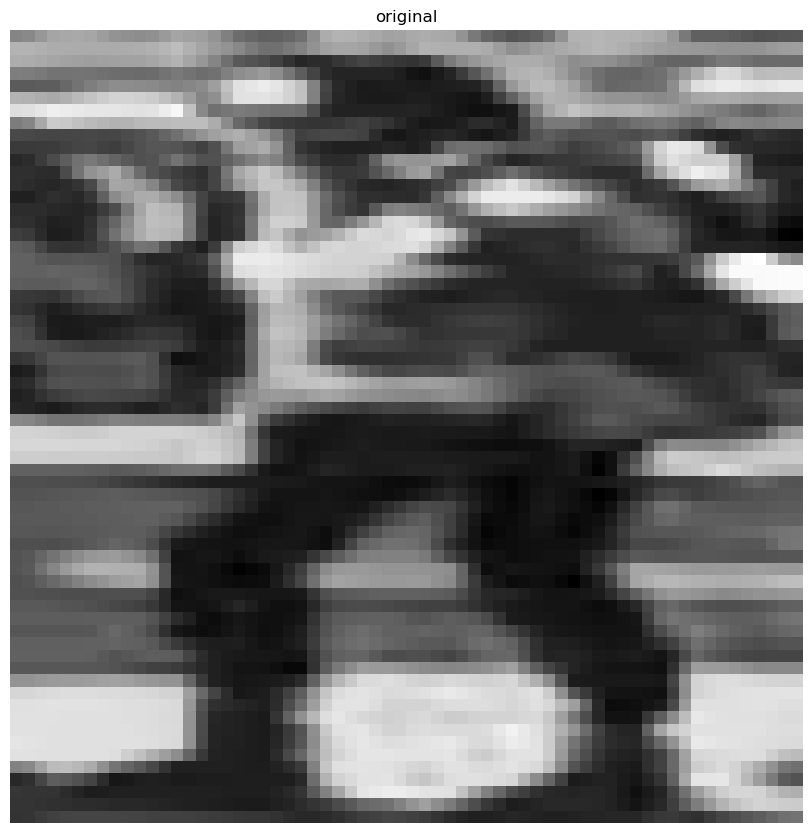

122


<Figure size 432x288 with 0 Axes>

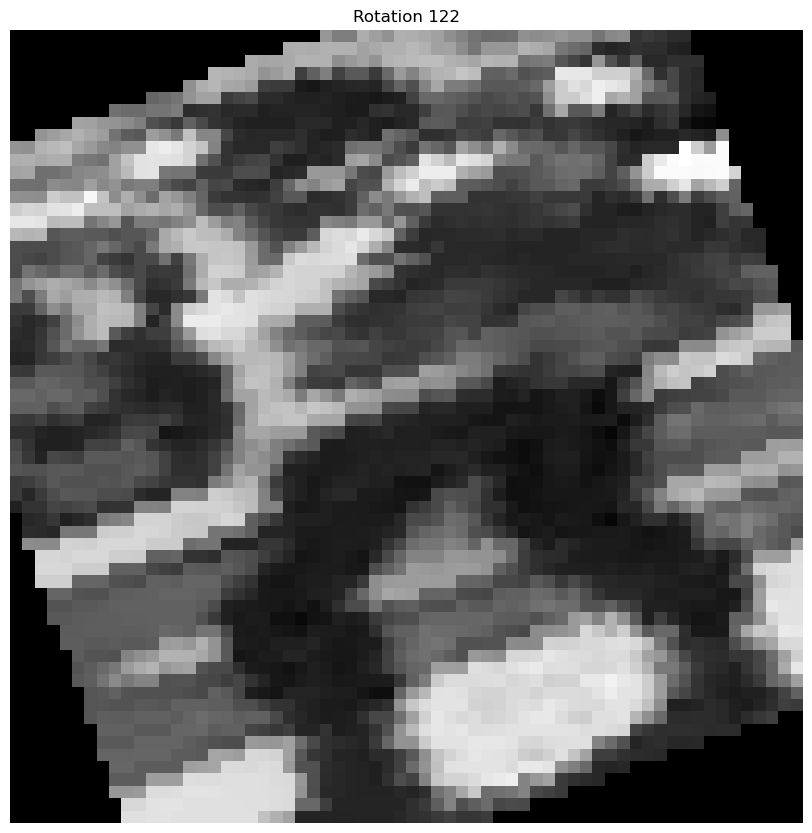

<Figure size 432x288 with 0 Axes>

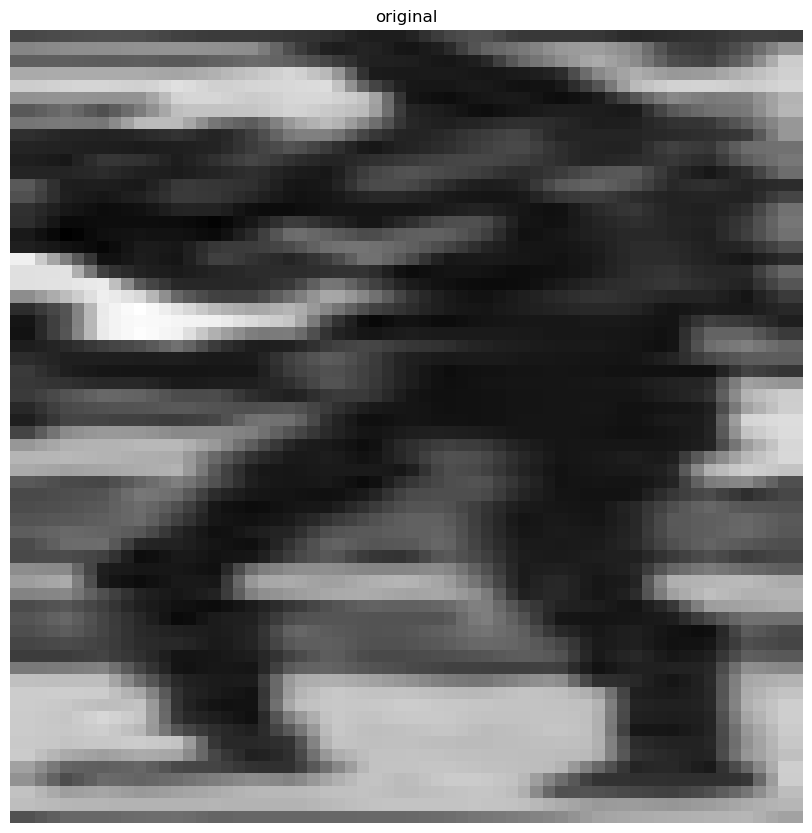

295


<Figure size 432x288 with 0 Axes>

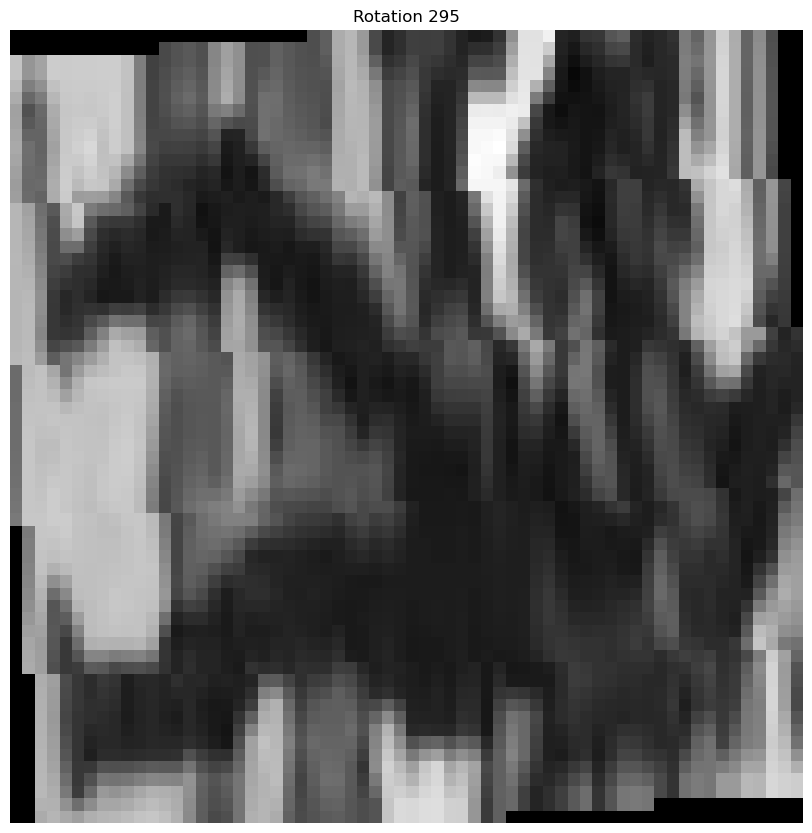

<Figure size 432x288 with 0 Axes>

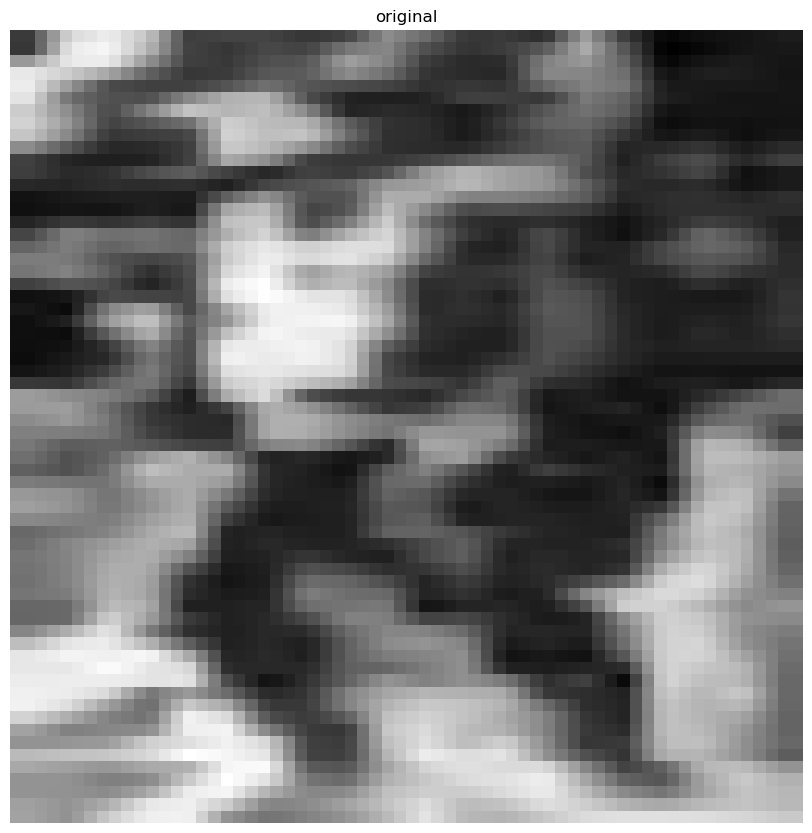

343


<Figure size 432x288 with 0 Axes>

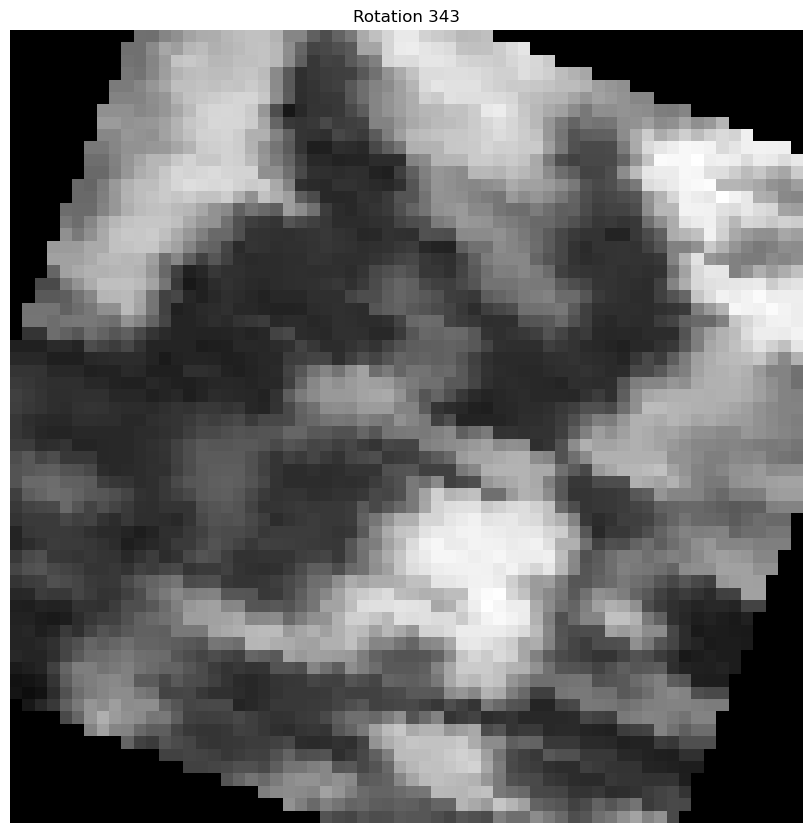

<Figure size 432x288 with 0 Axes>

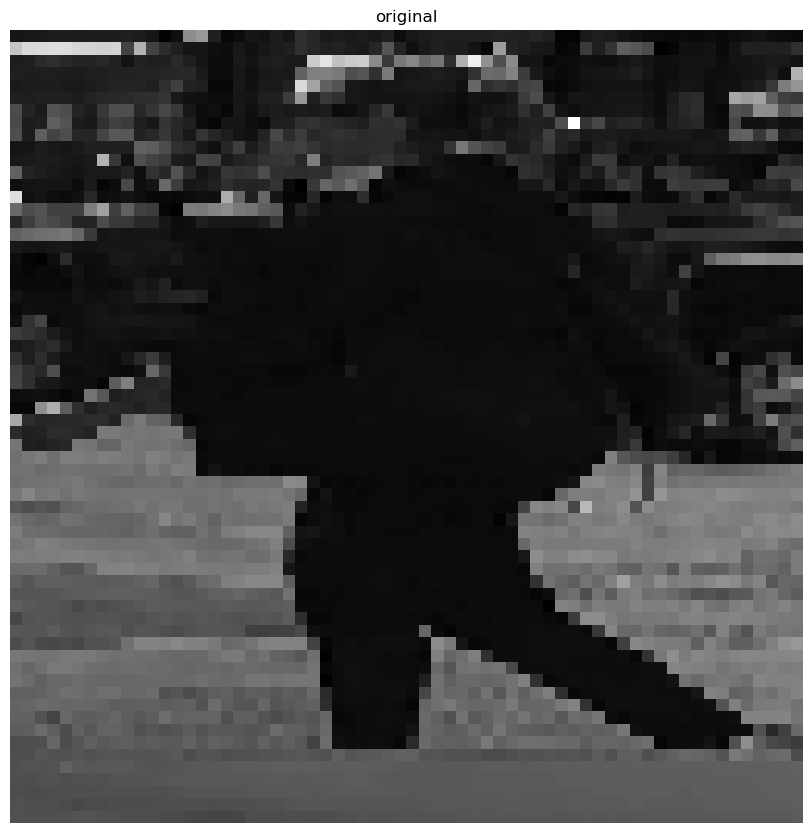

200


<Figure size 432x288 with 0 Axes>

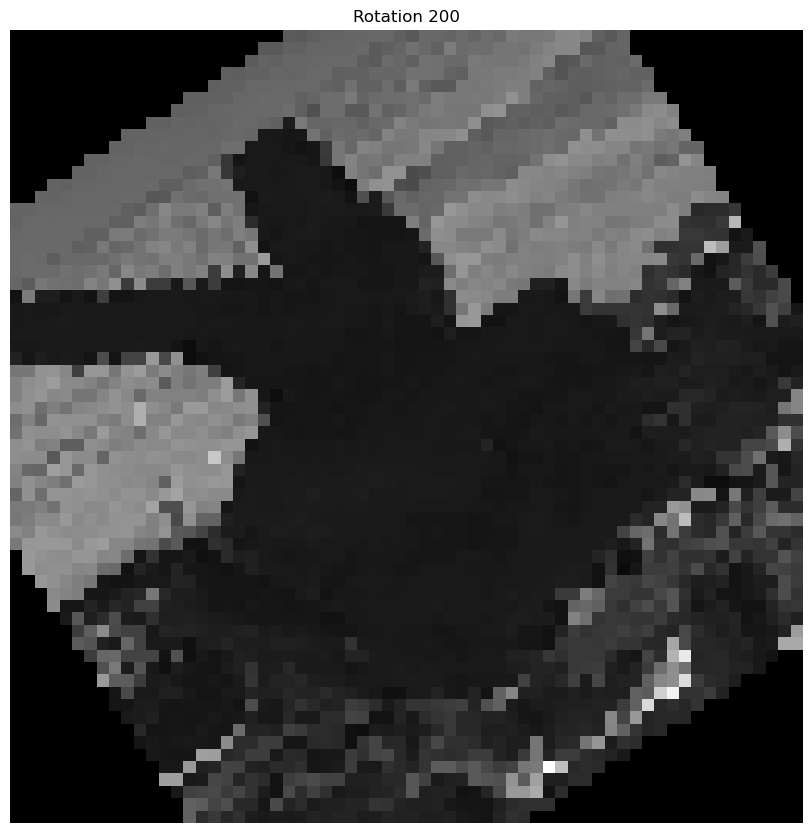

<Figure size 432x288 with 0 Axes>

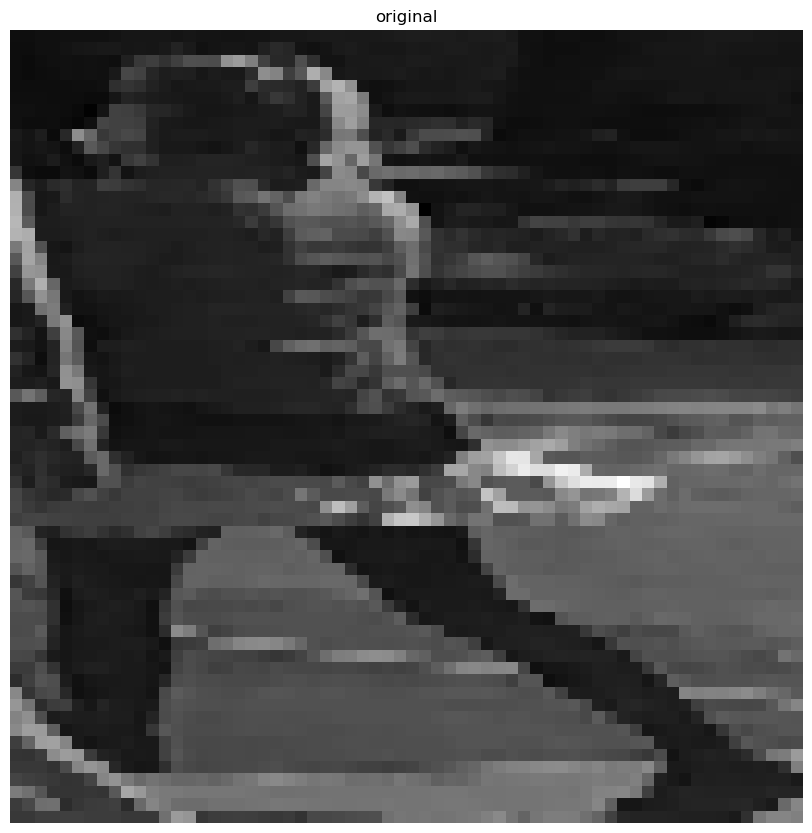

42


<Figure size 432x288 with 0 Axes>

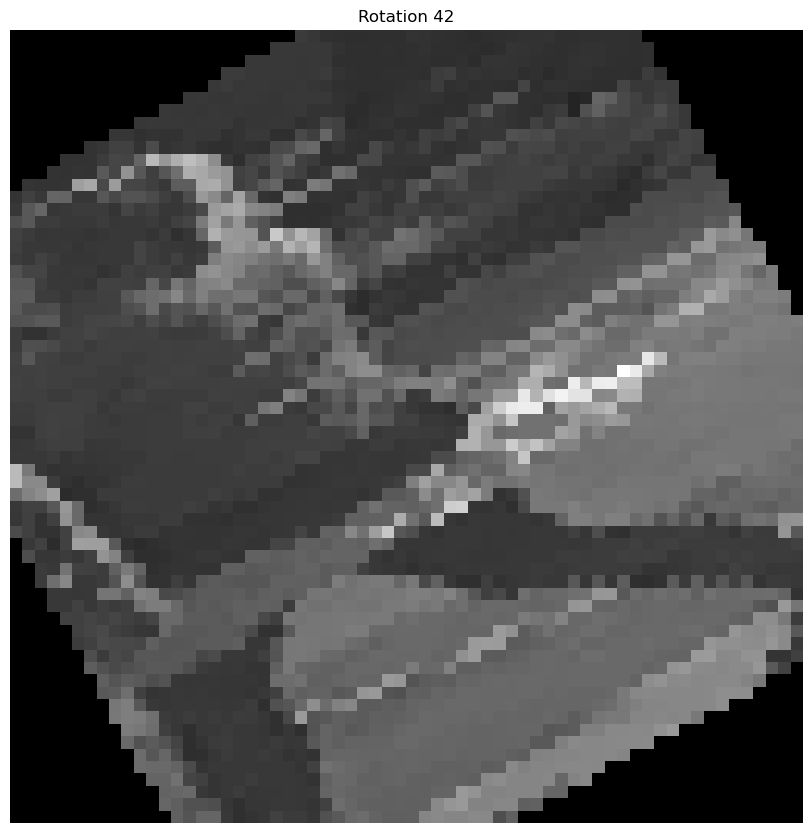

<Figure size 432x288 with 0 Axes>

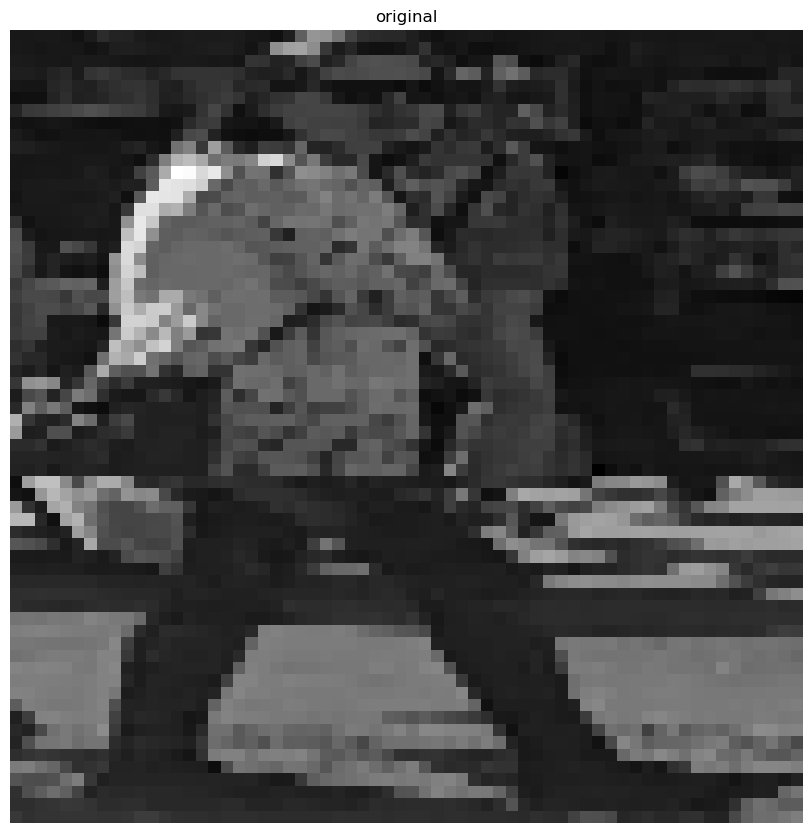

17


<Figure size 432x288 with 0 Axes>

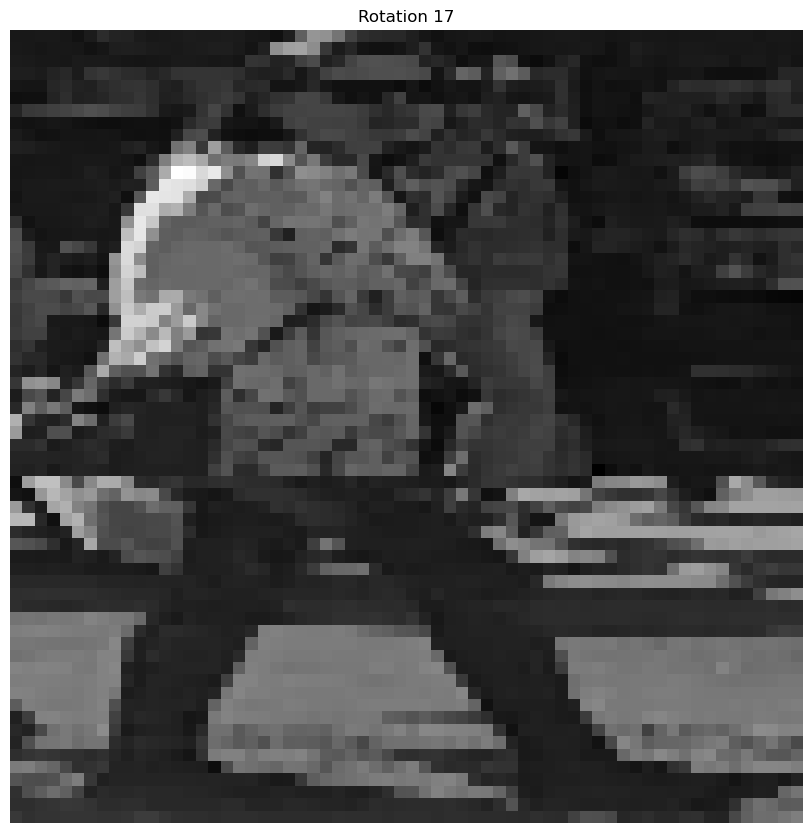

<Figure size 432x288 with 0 Axes>

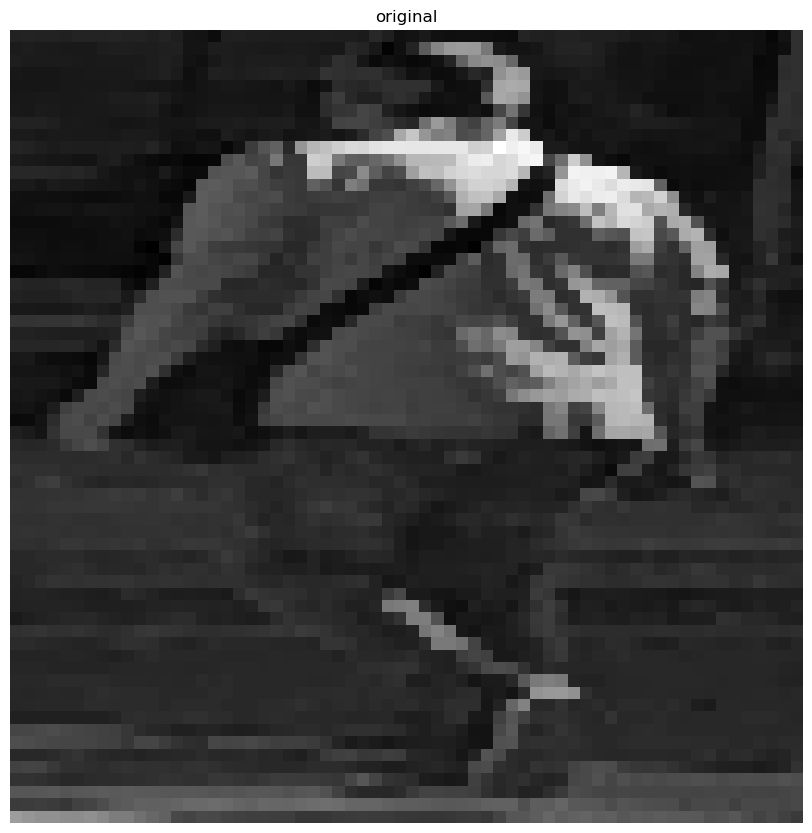

326


<Figure size 432x288 with 0 Axes>

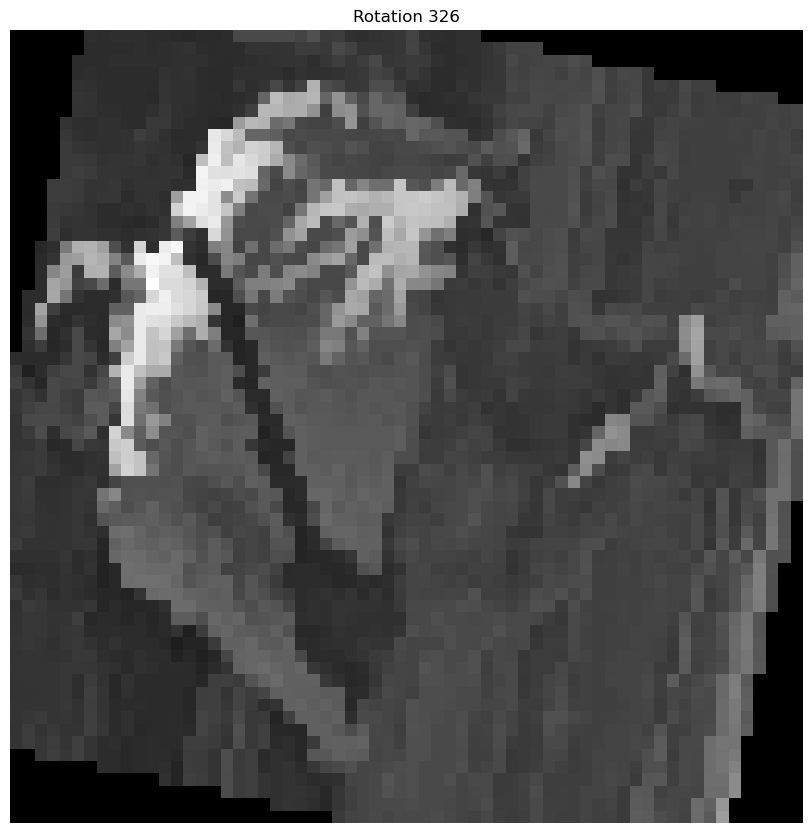

<Figure size 432x288 with 0 Axes>

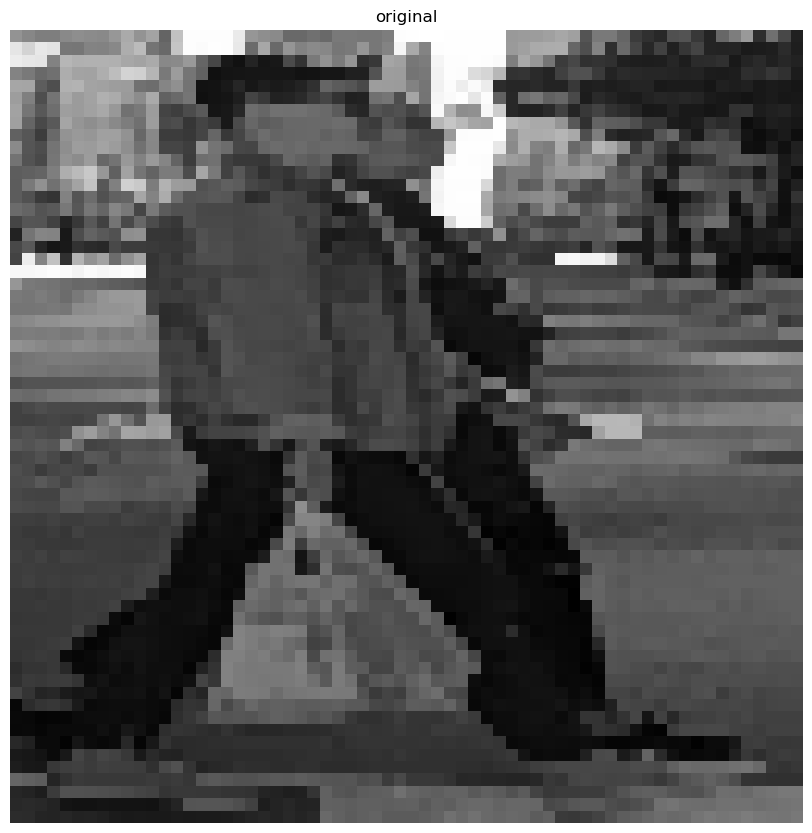

55


<Figure size 432x288 with 0 Axes>

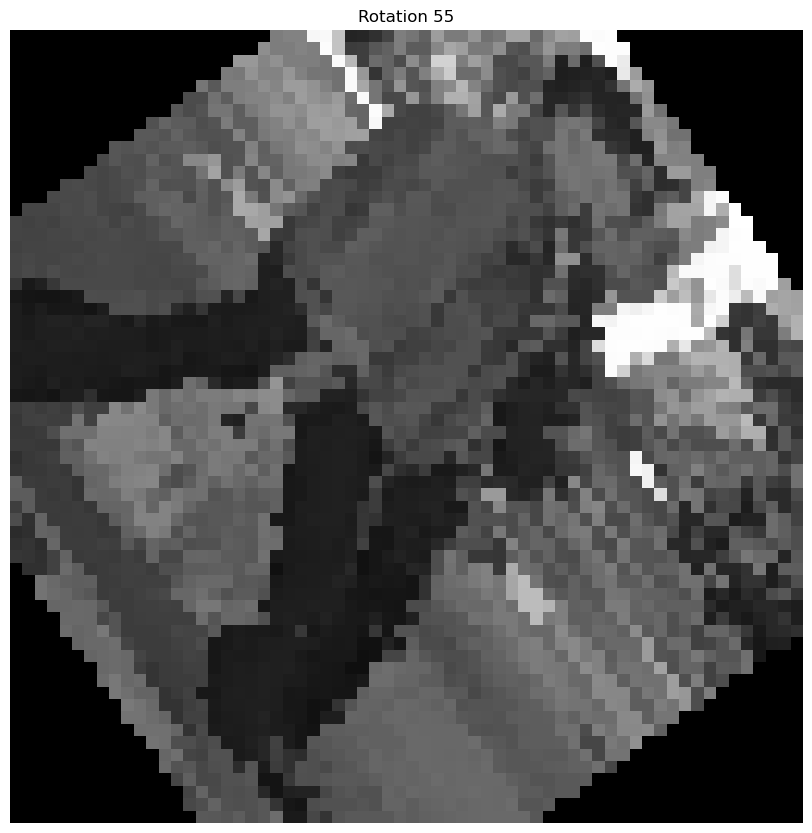

<Figure size 432x288 with 0 Axes>

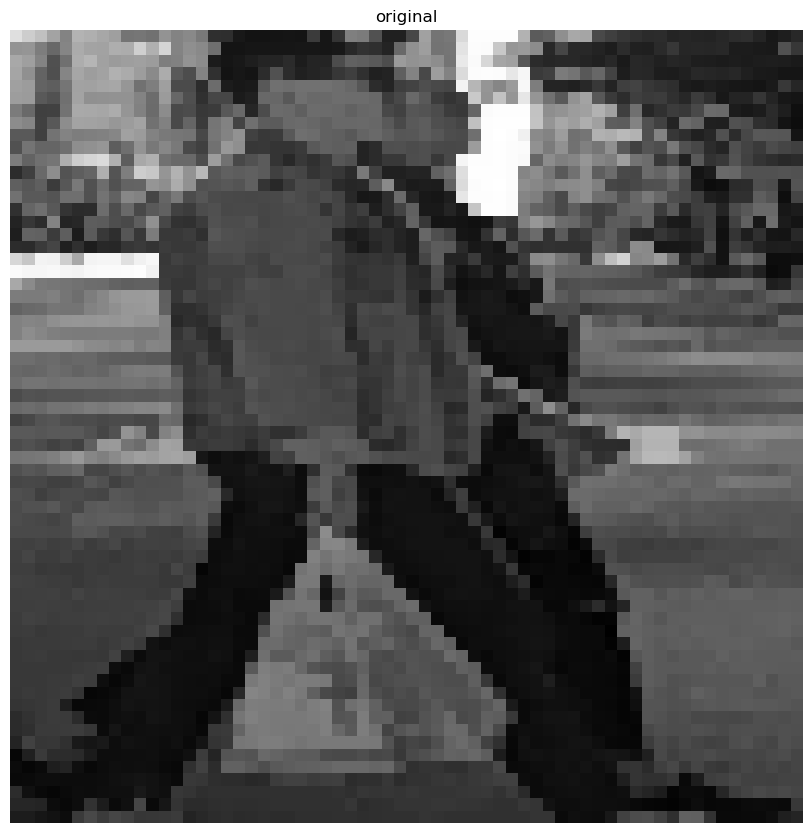

277


<Figure size 432x288 with 0 Axes>

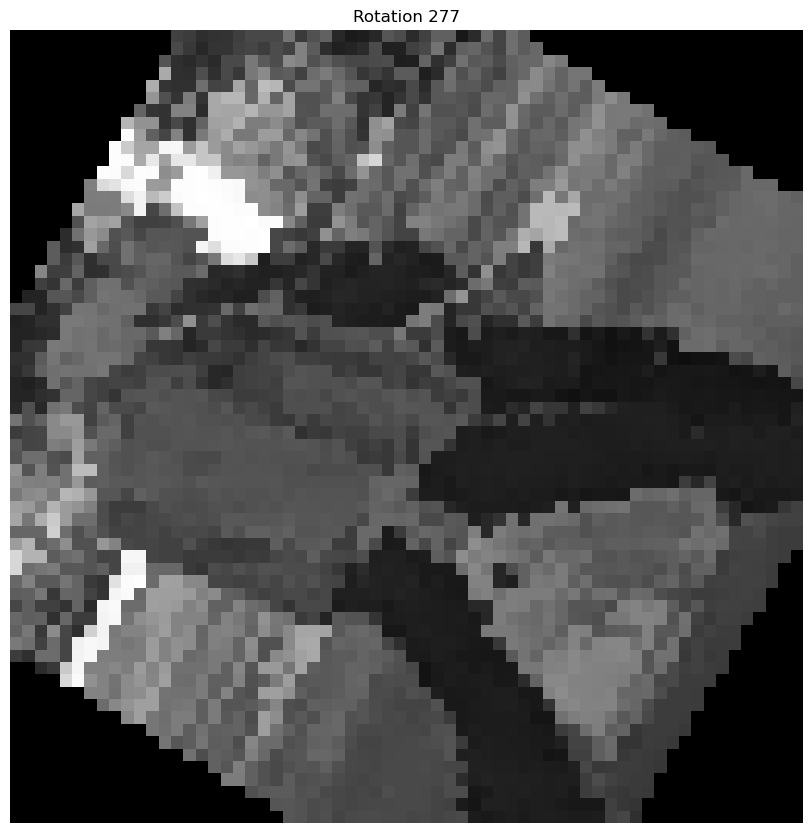

<Figure size 432x288 with 0 Axes>

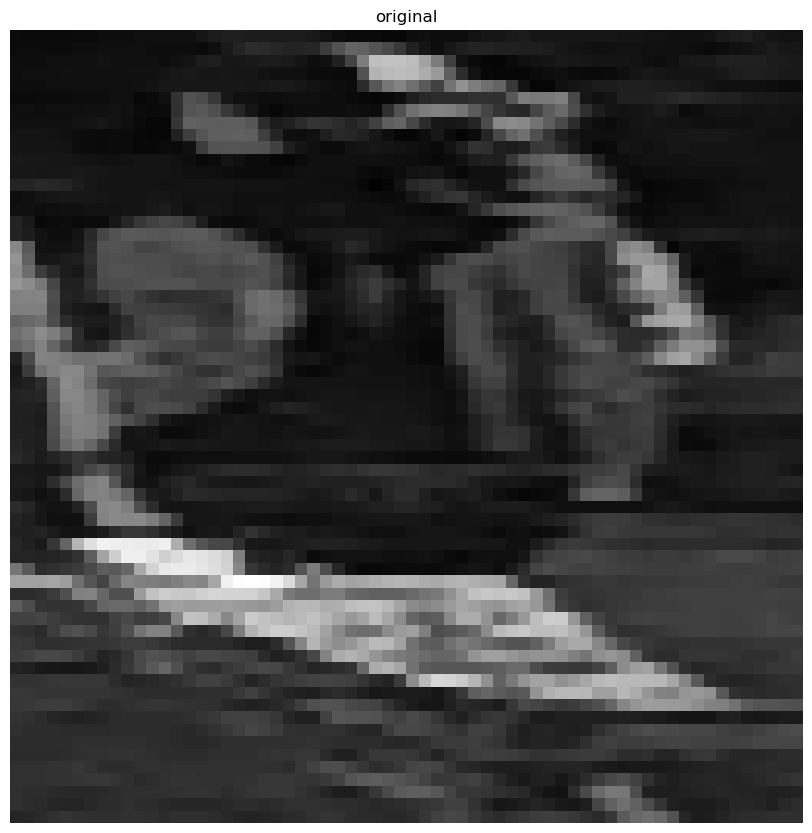

288


<Figure size 432x288 with 0 Axes>

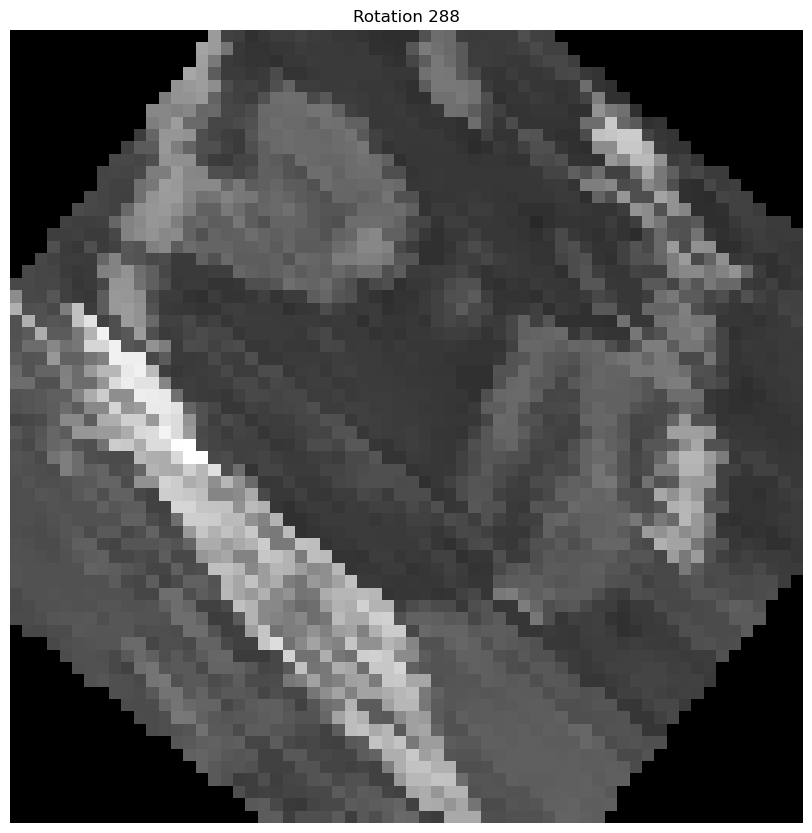

<Figure size 432x288 with 0 Axes>

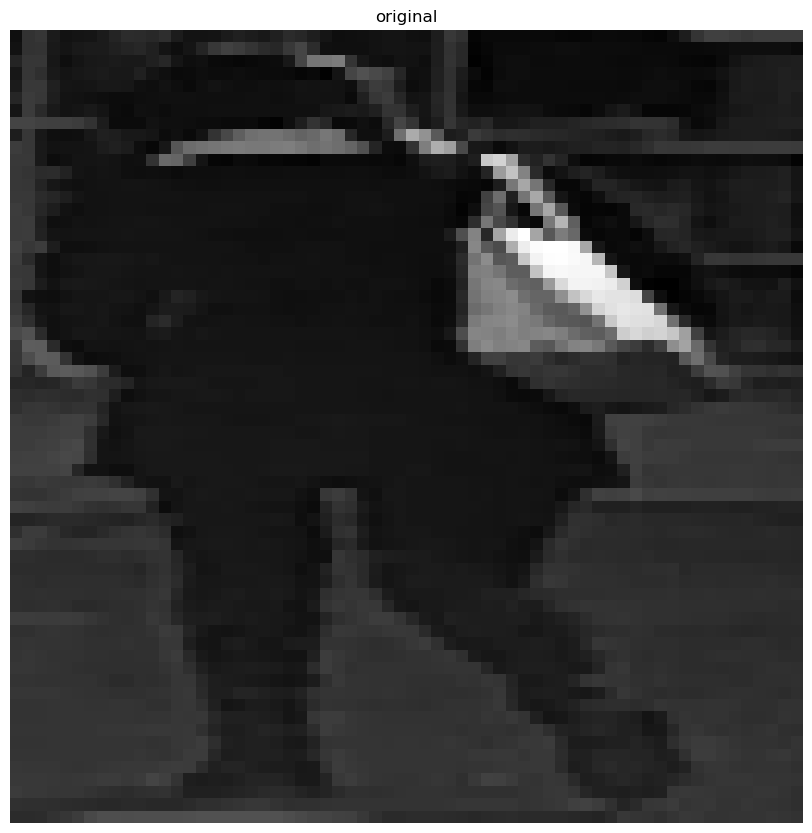

121


<Figure size 432x288 with 0 Axes>

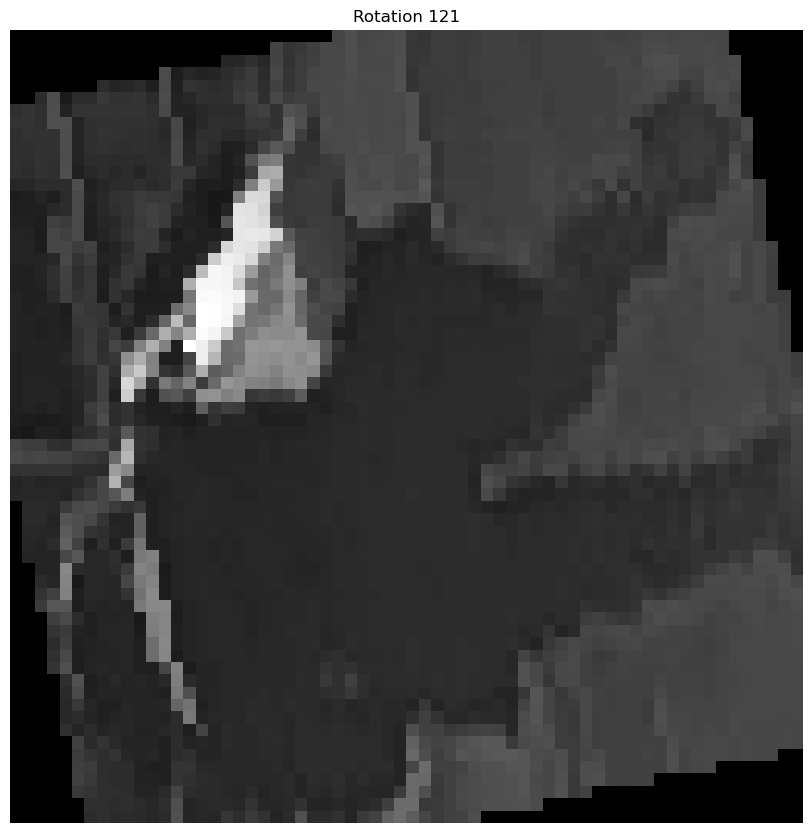

<Figure size 432x288 with 0 Axes>

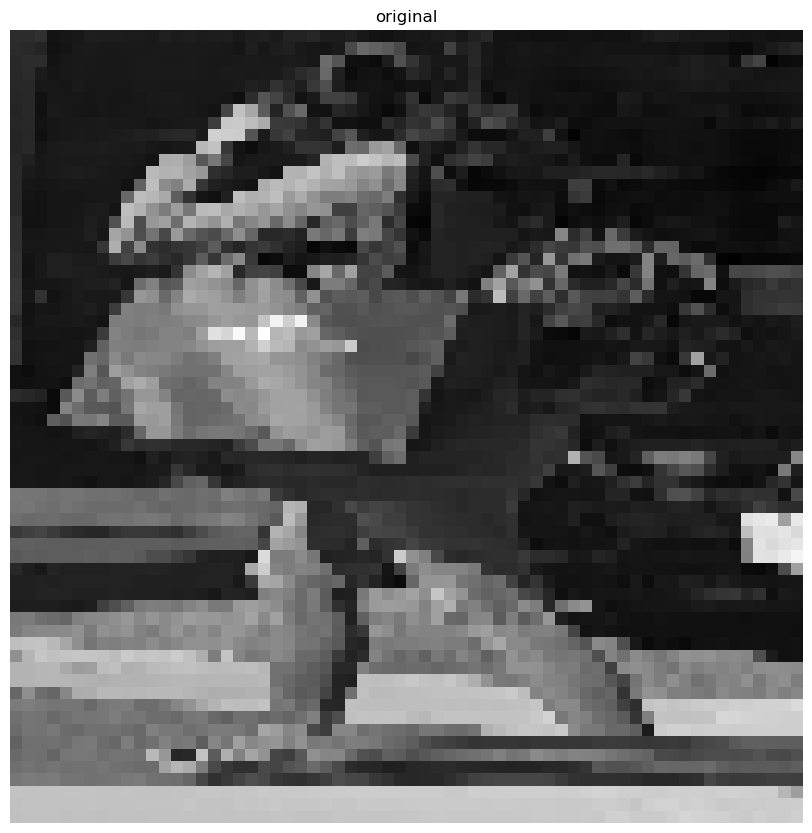

62


<Figure size 432x288 with 0 Axes>

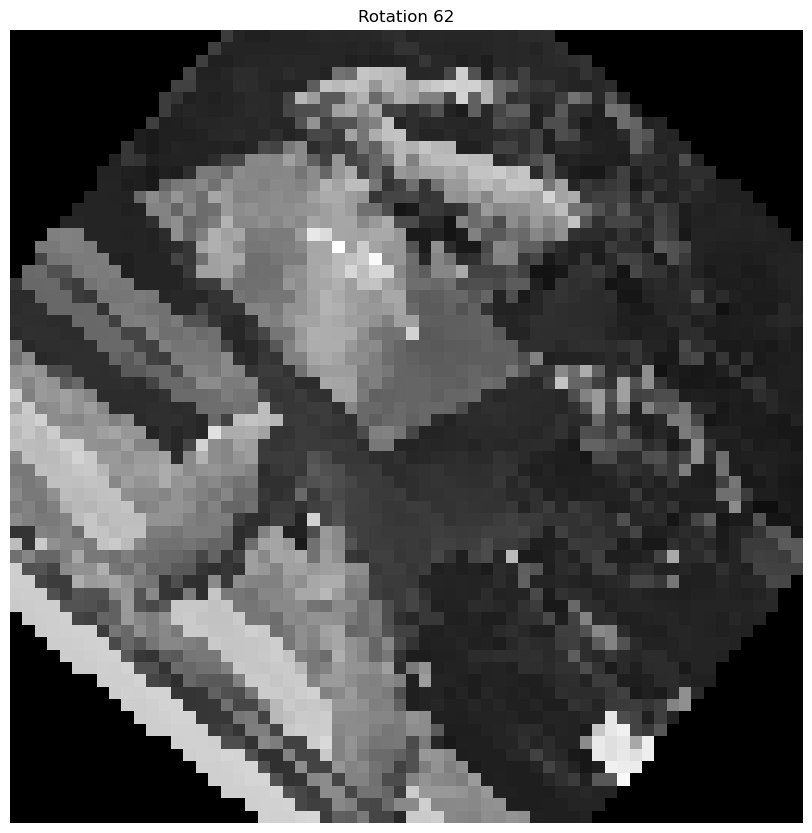

<Figure size 432x288 with 0 Axes>

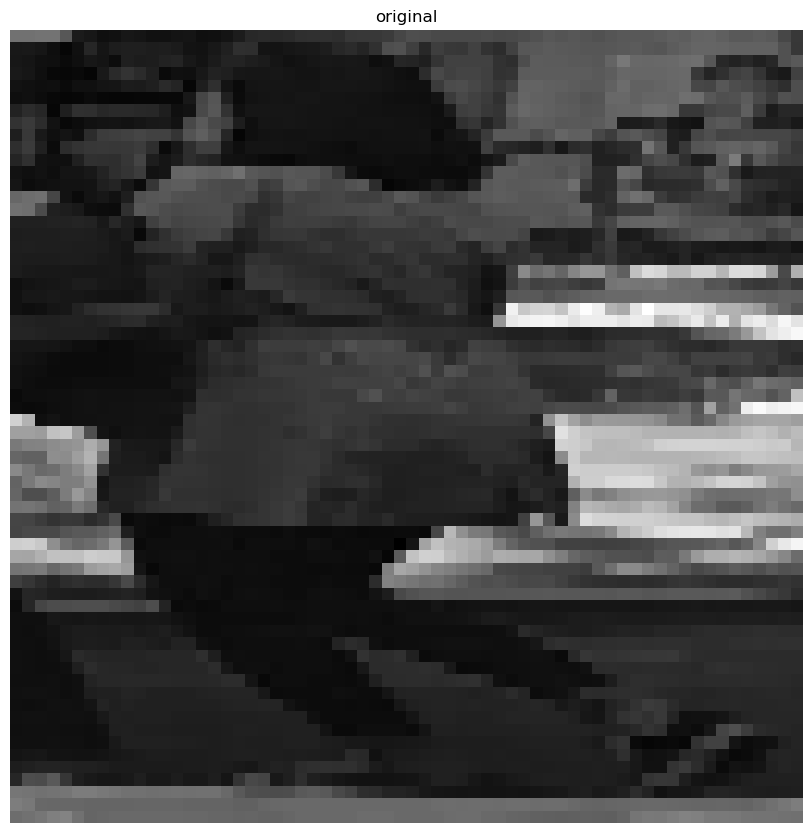

303


<Figure size 432x288 with 0 Axes>

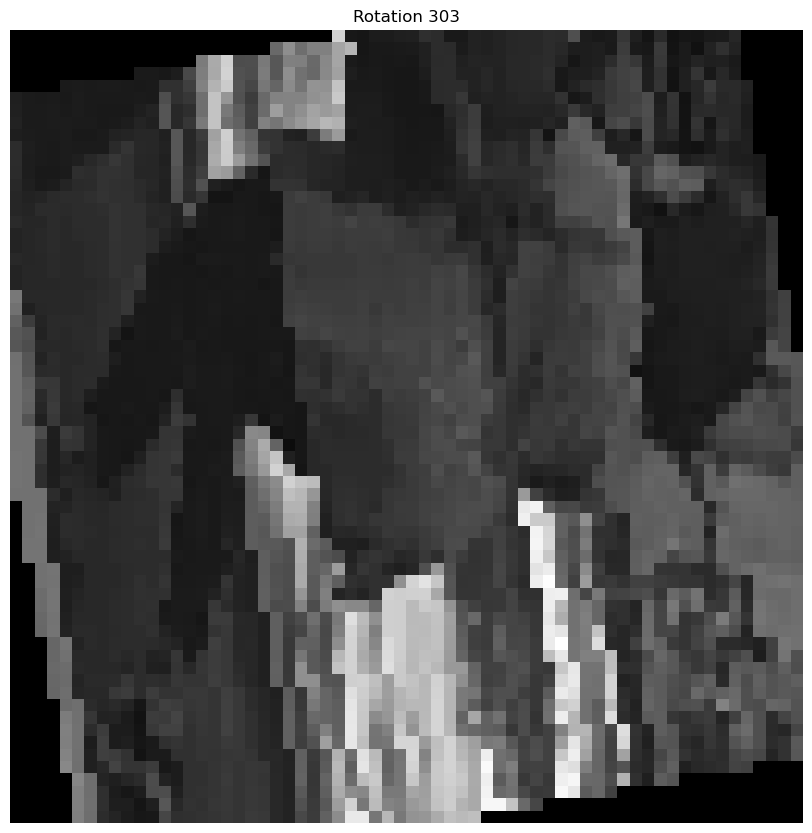

<Figure size 432x288 with 0 Axes>

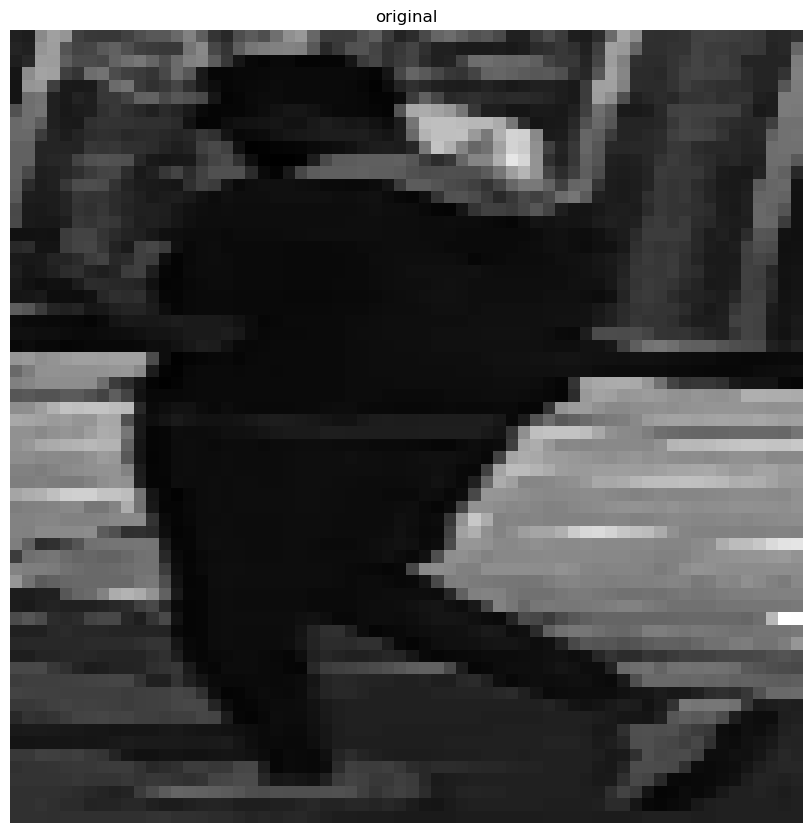

87


<Figure size 432x288 with 0 Axes>

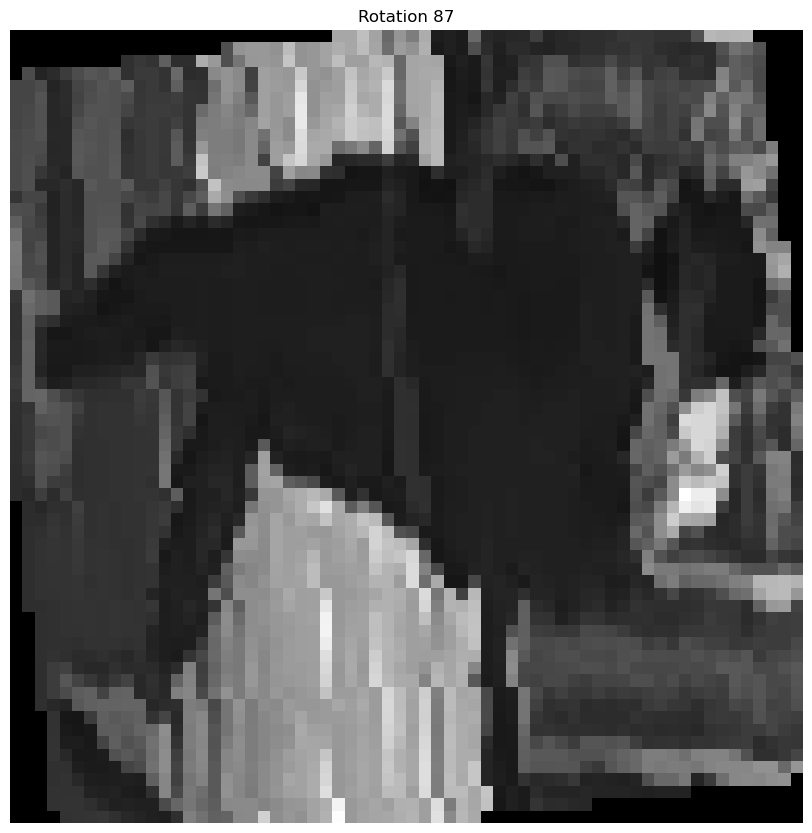

<Figure size 432x288 with 0 Axes>

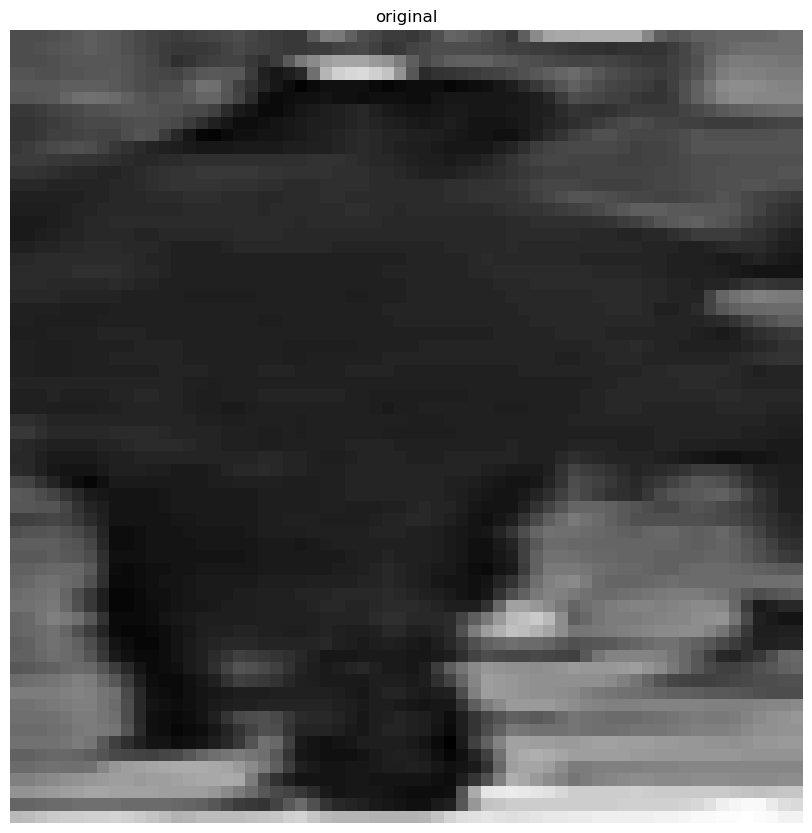

188


<Figure size 432x288 with 0 Axes>

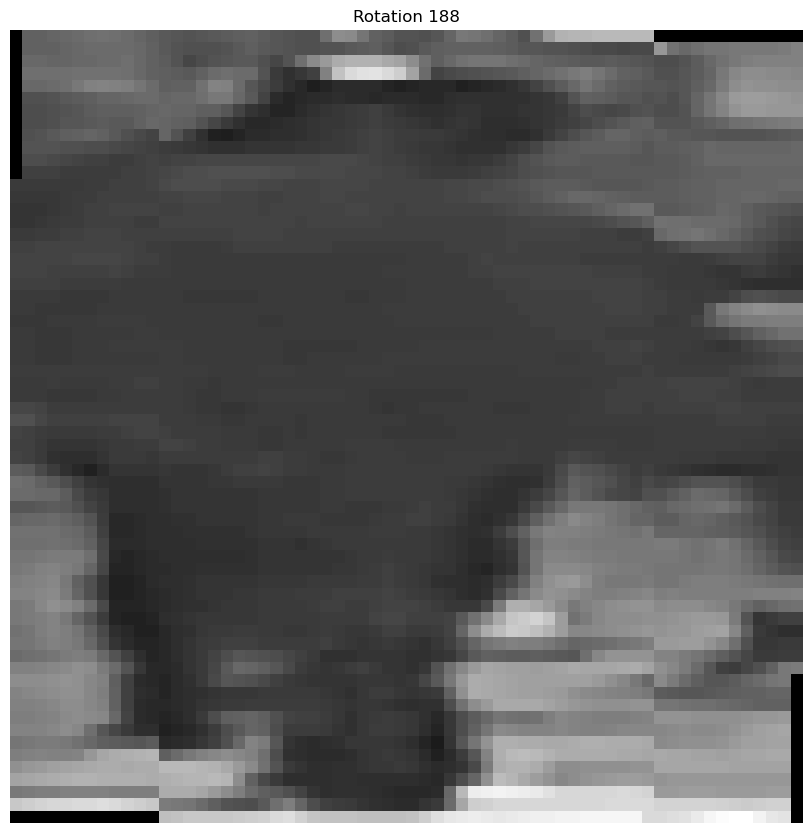

<Figure size 432x288 with 0 Axes>

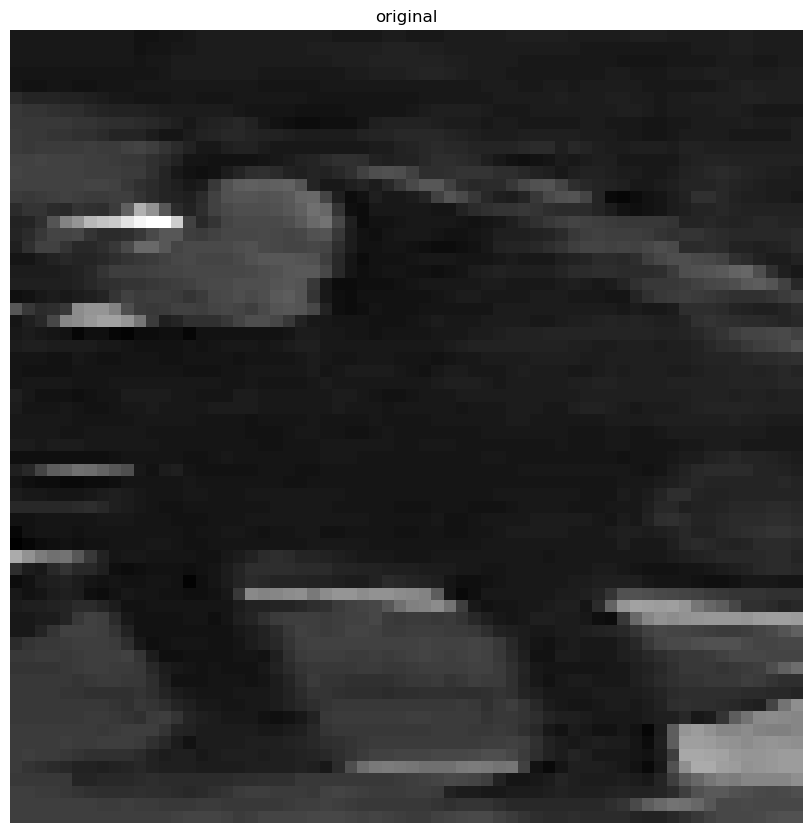

233


<Figure size 432x288 with 0 Axes>

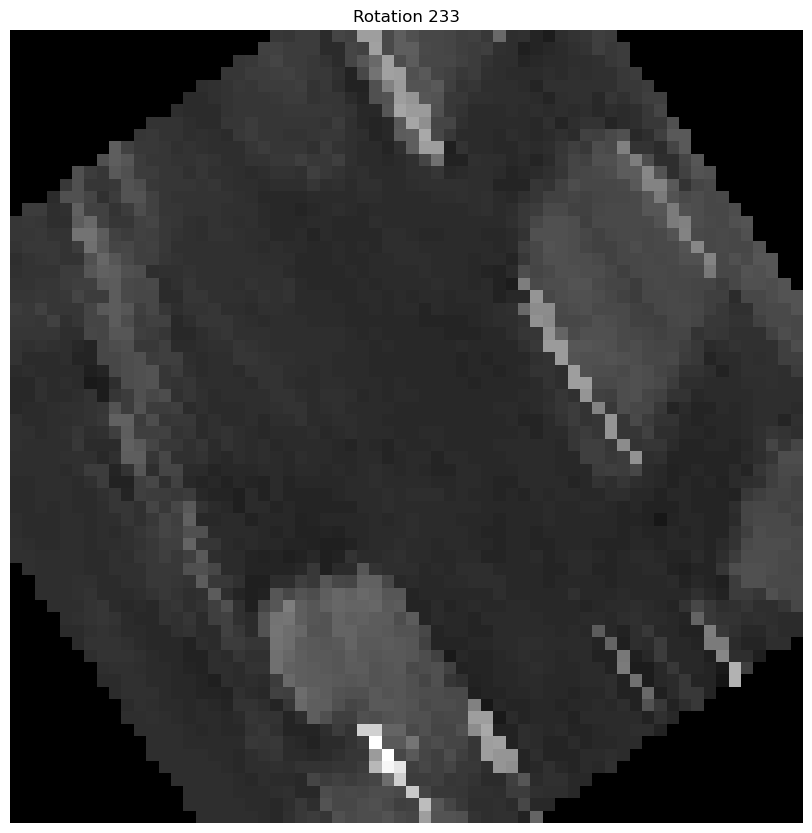

<Figure size 432x288 with 0 Axes>

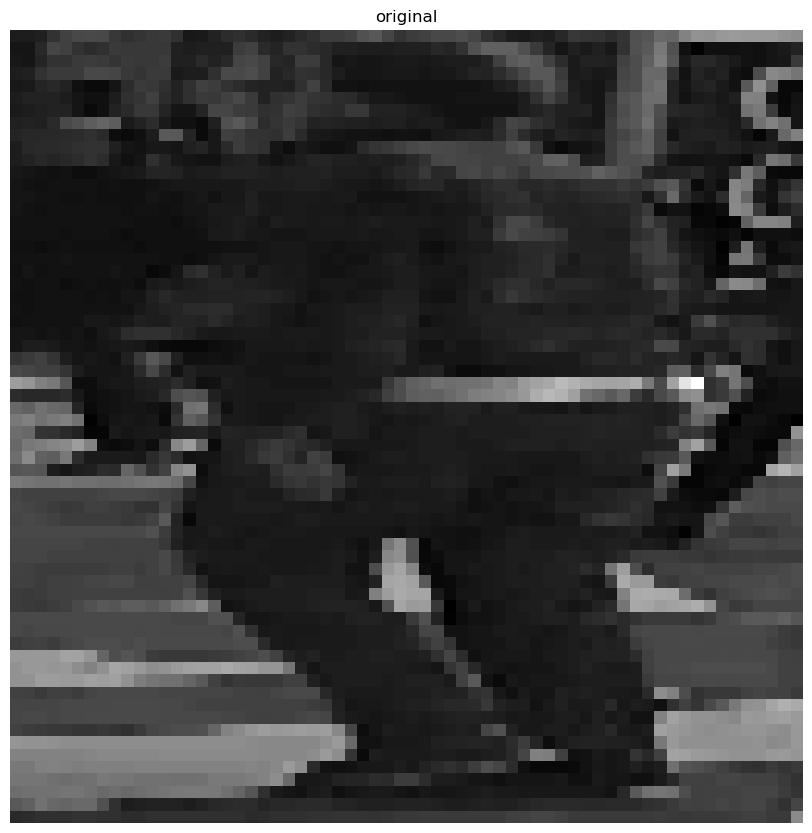

199


<Figure size 432x288 with 0 Axes>

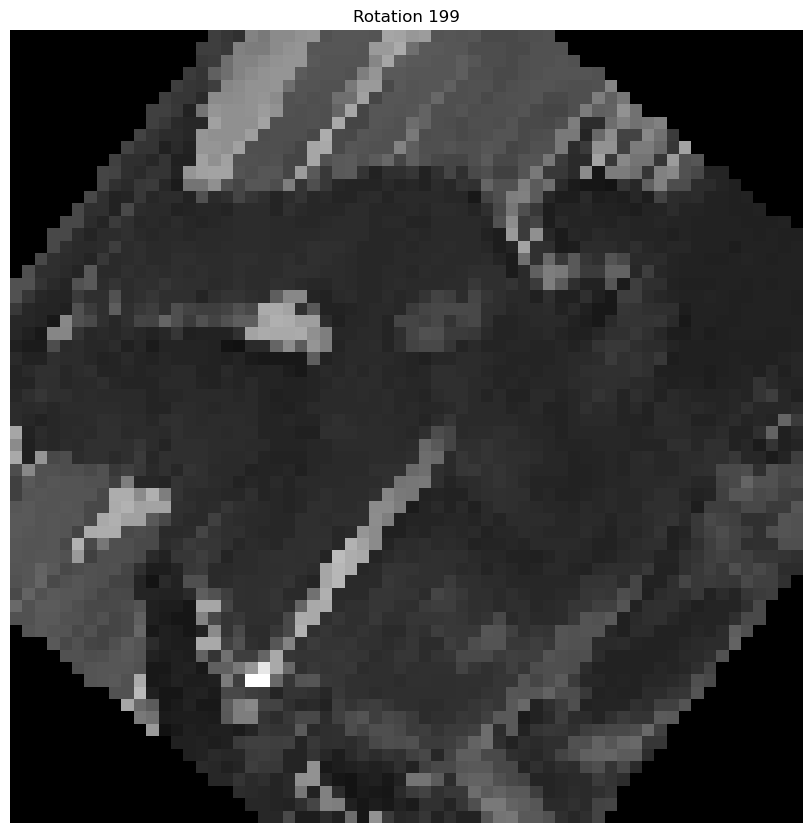

<Figure size 432x288 with 0 Axes>

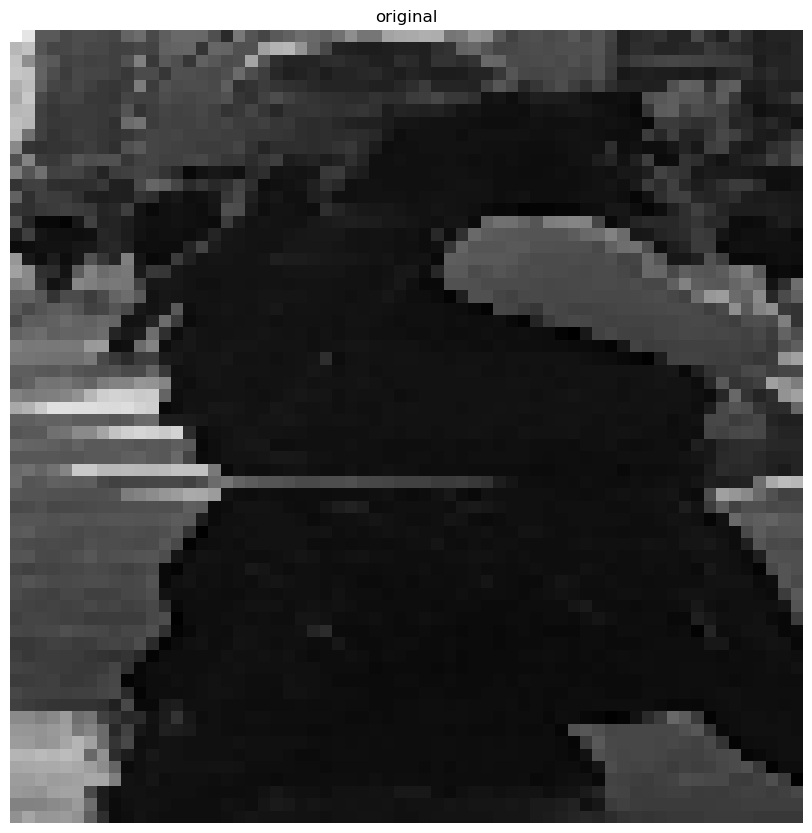

167


<Figure size 432x288 with 0 Axes>

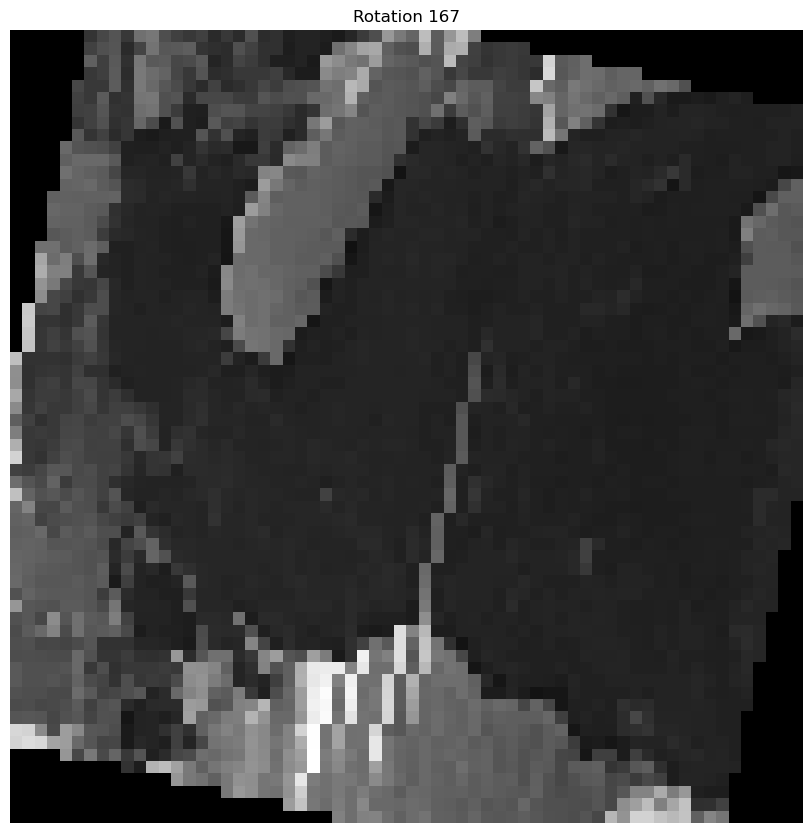

<Figure size 432x288 with 0 Axes>

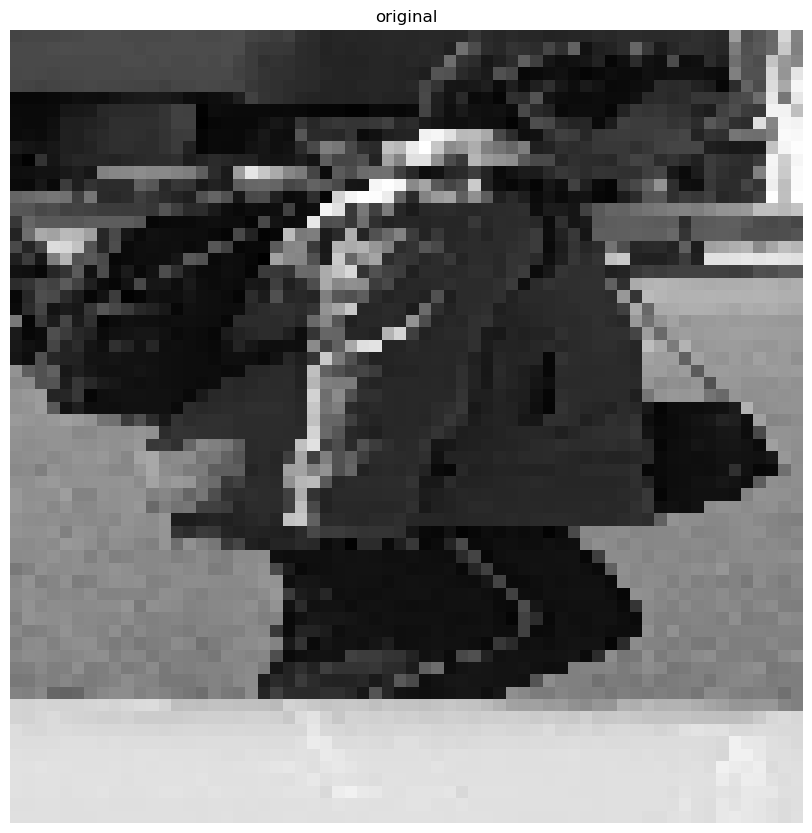

209


<Figure size 432x288 with 0 Axes>

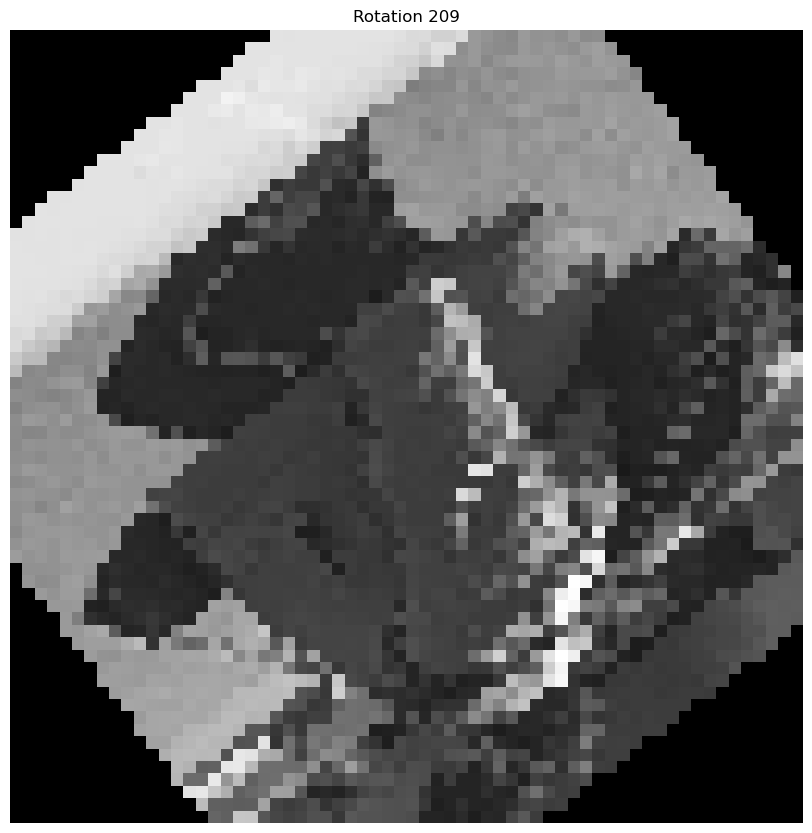

<Figure size 432x288 with 0 Axes>

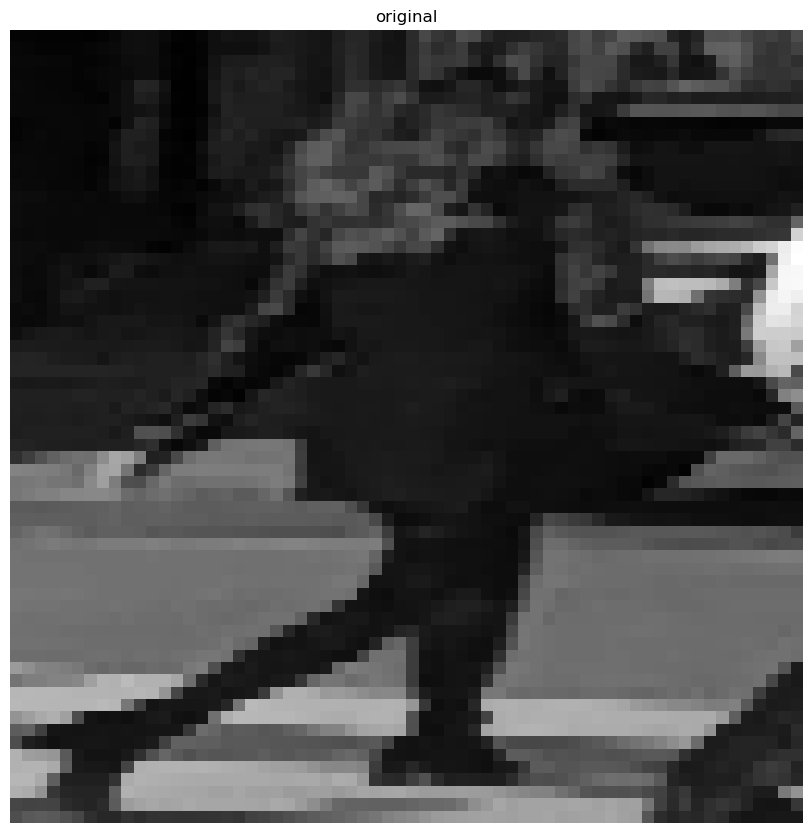

169


<Figure size 432x288 with 0 Axes>

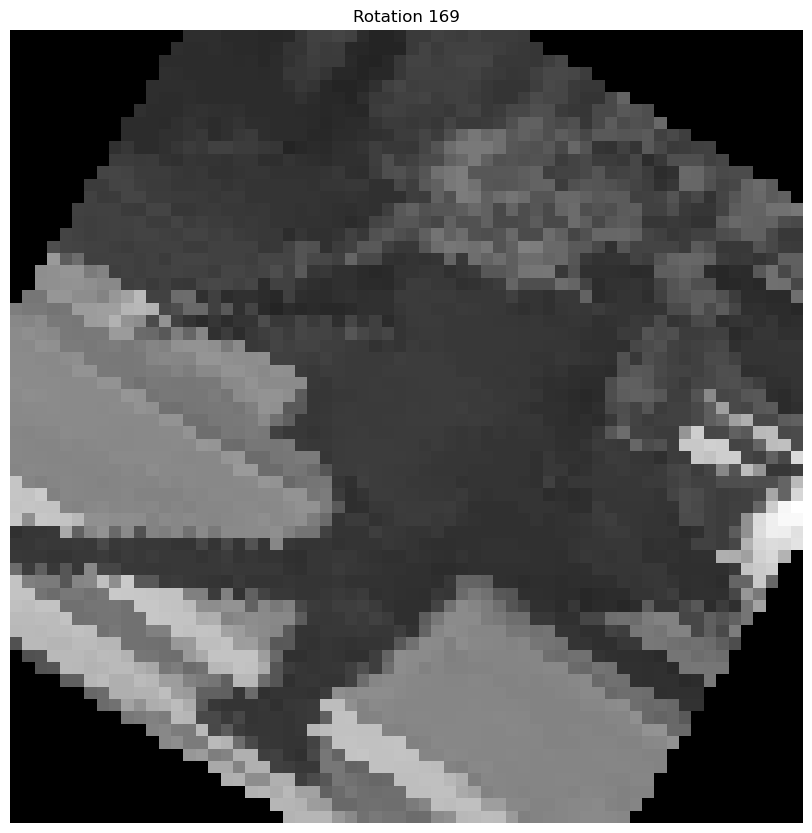

<Figure size 432x288 with 0 Axes>

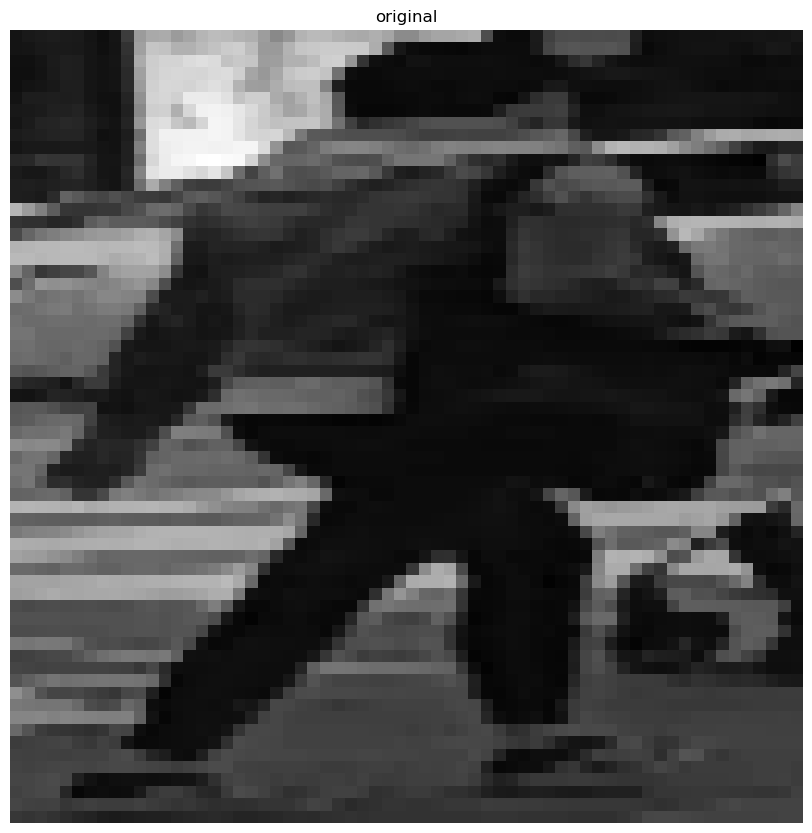

102


<Figure size 432x288 with 0 Axes>

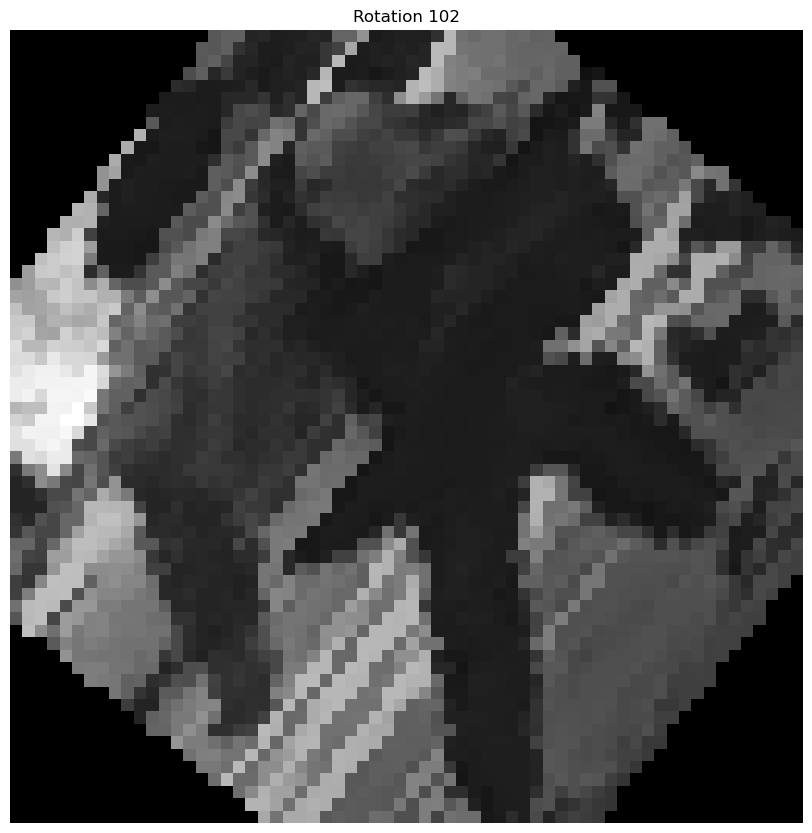

<Figure size 432x288 with 0 Axes>

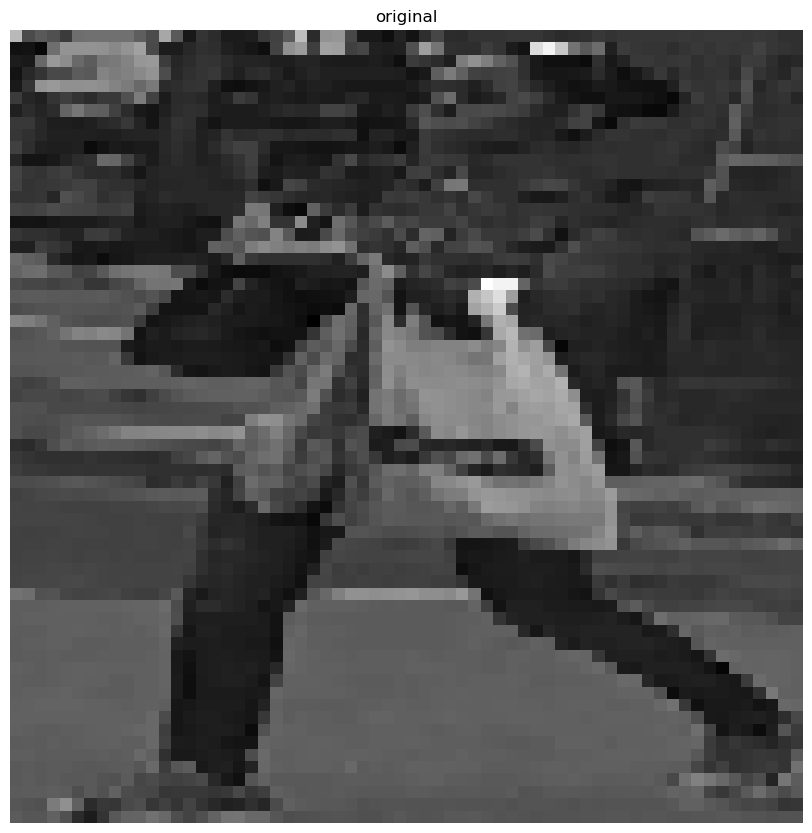

250


<Figure size 432x288 with 0 Axes>

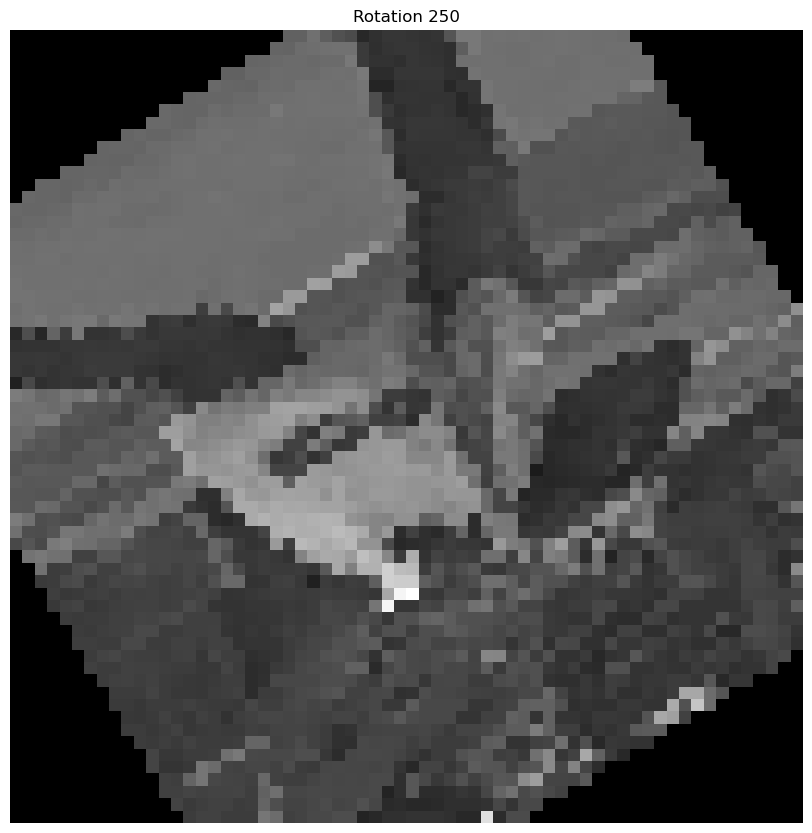

<Figure size 432x288 with 0 Axes>

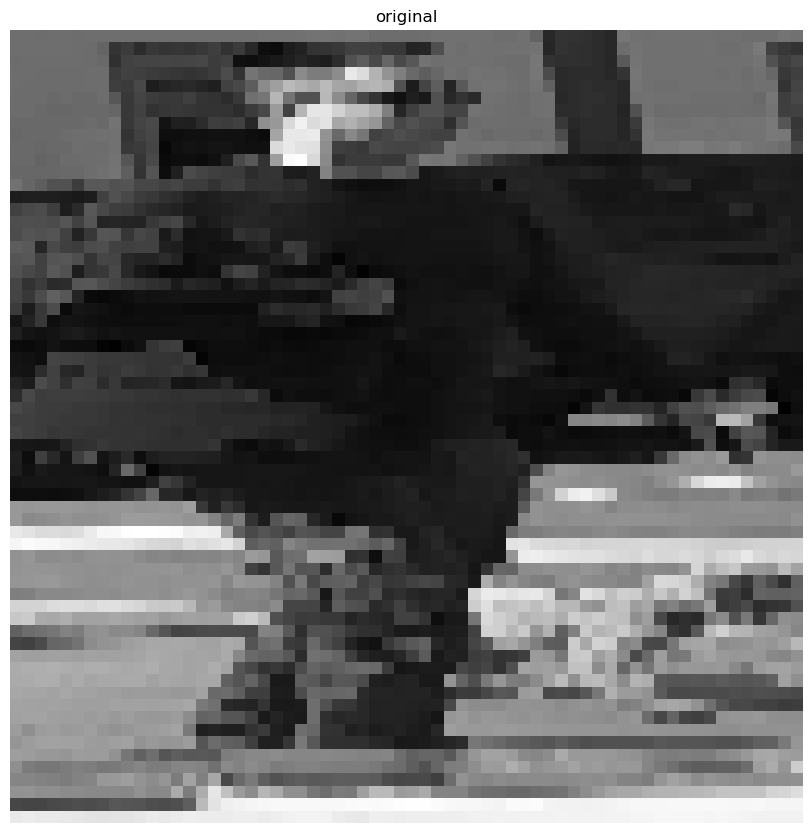

330


<Figure size 432x288 with 0 Axes>

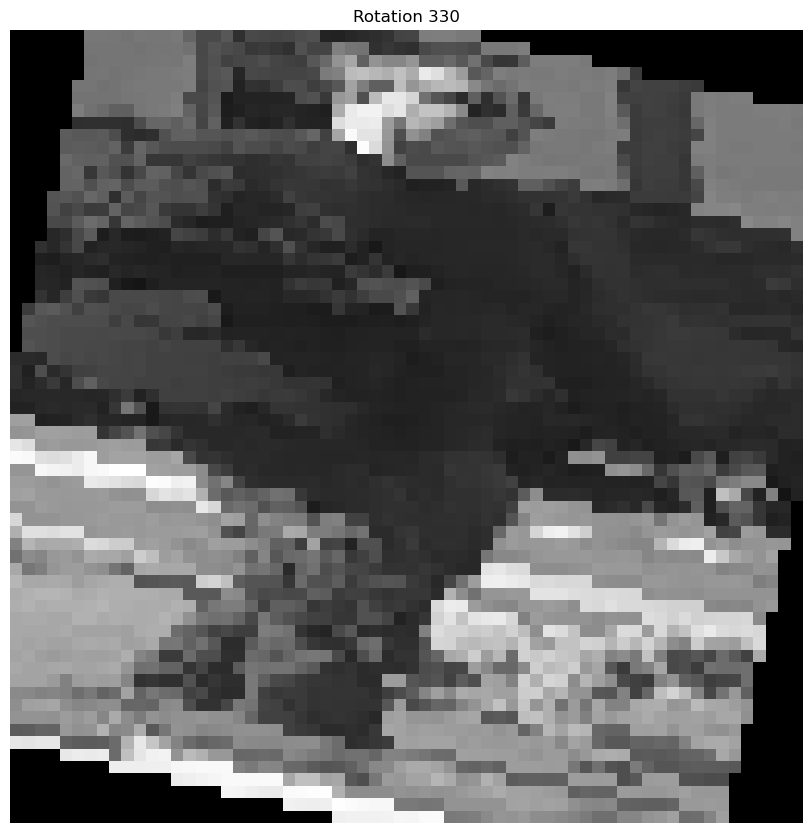

<Figure size 432x288 with 0 Axes>

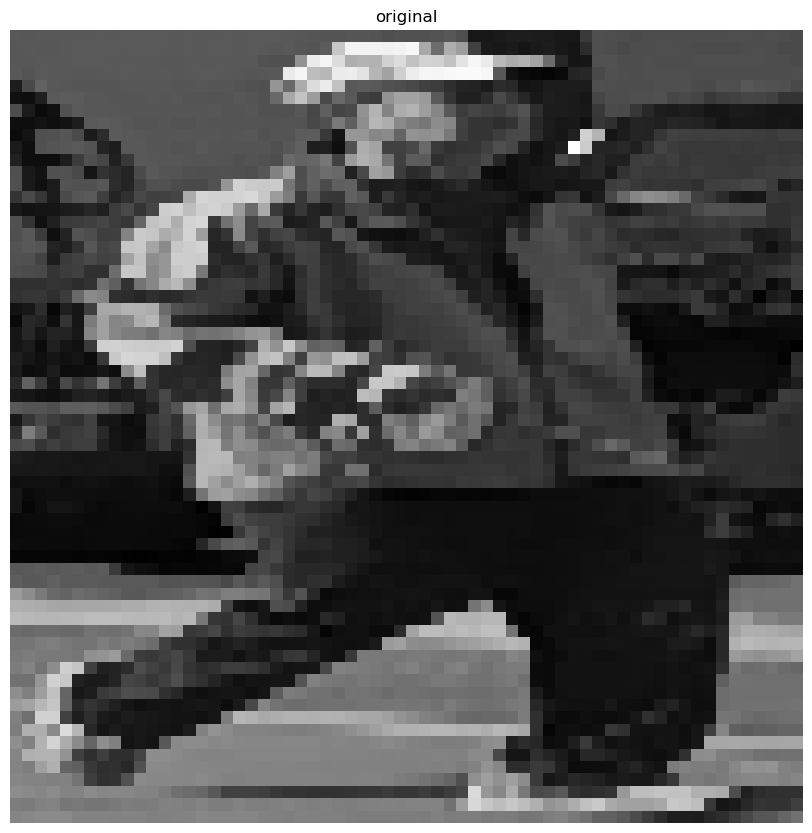

34


<Figure size 432x288 with 0 Axes>

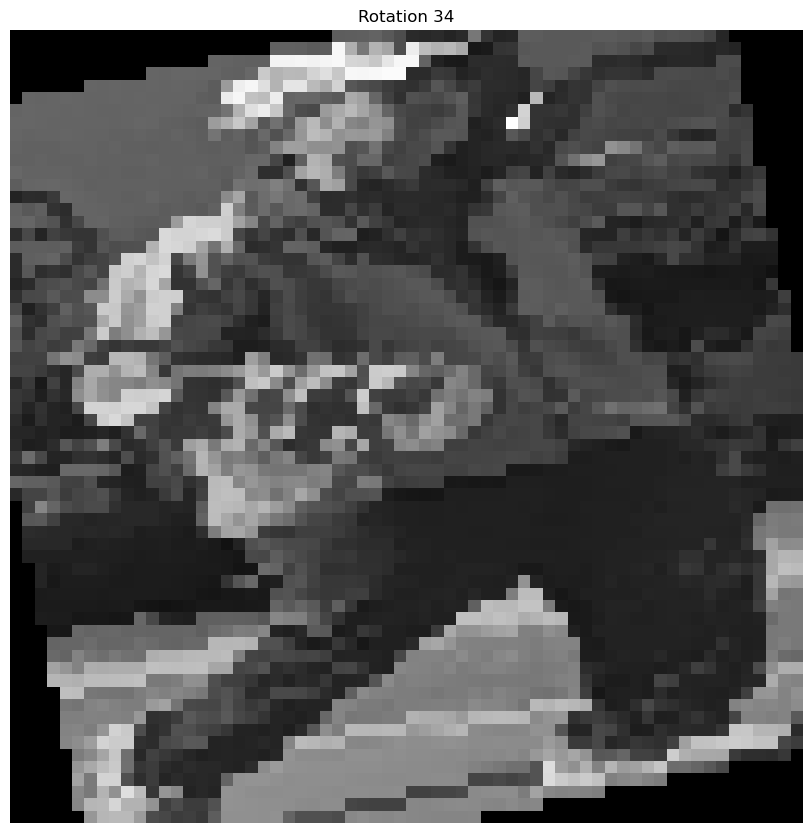

<Figure size 432x288 with 0 Axes>

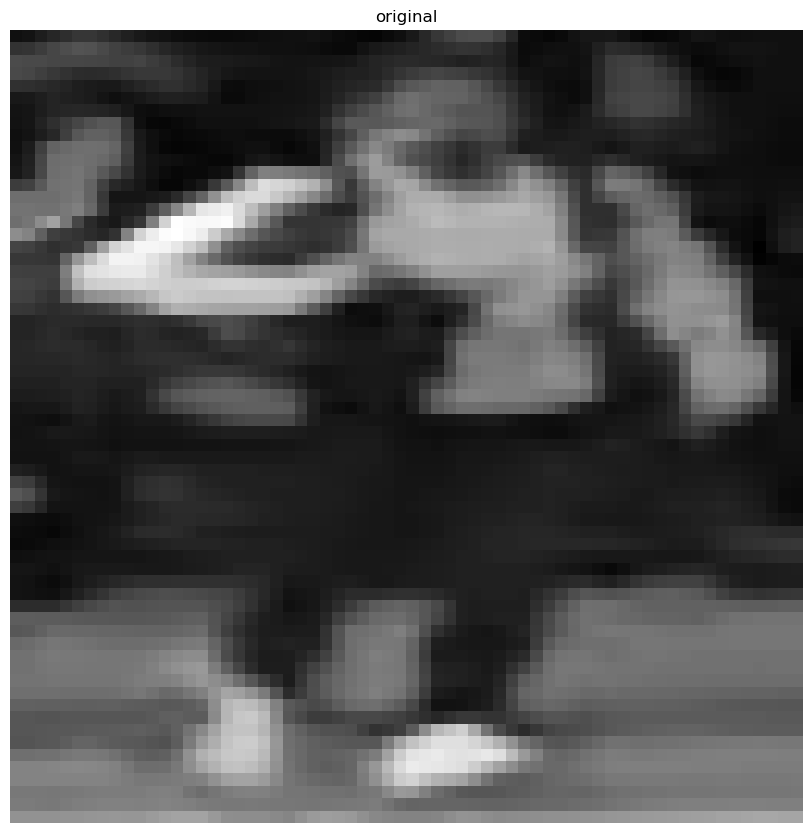

273


<Figure size 432x288 with 0 Axes>

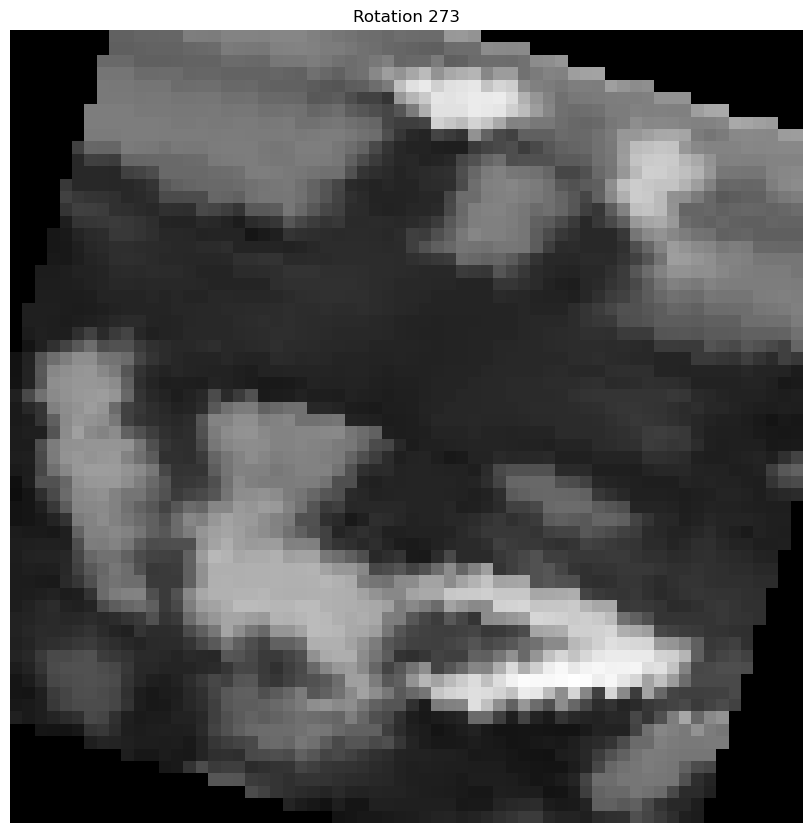

<Figure size 432x288 with 0 Axes>

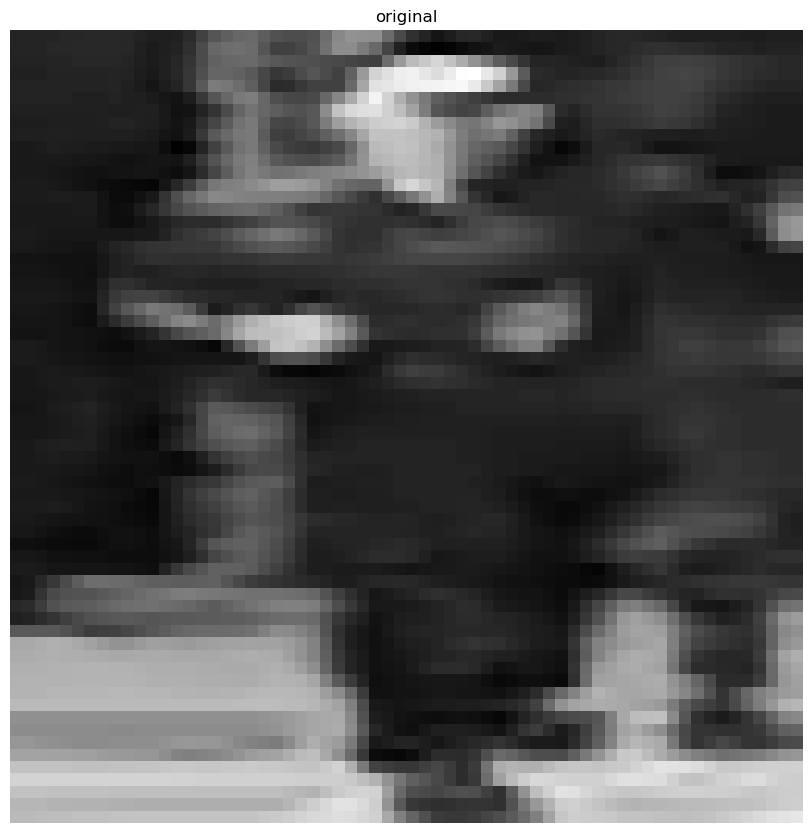

289


<Figure size 432x288 with 0 Axes>

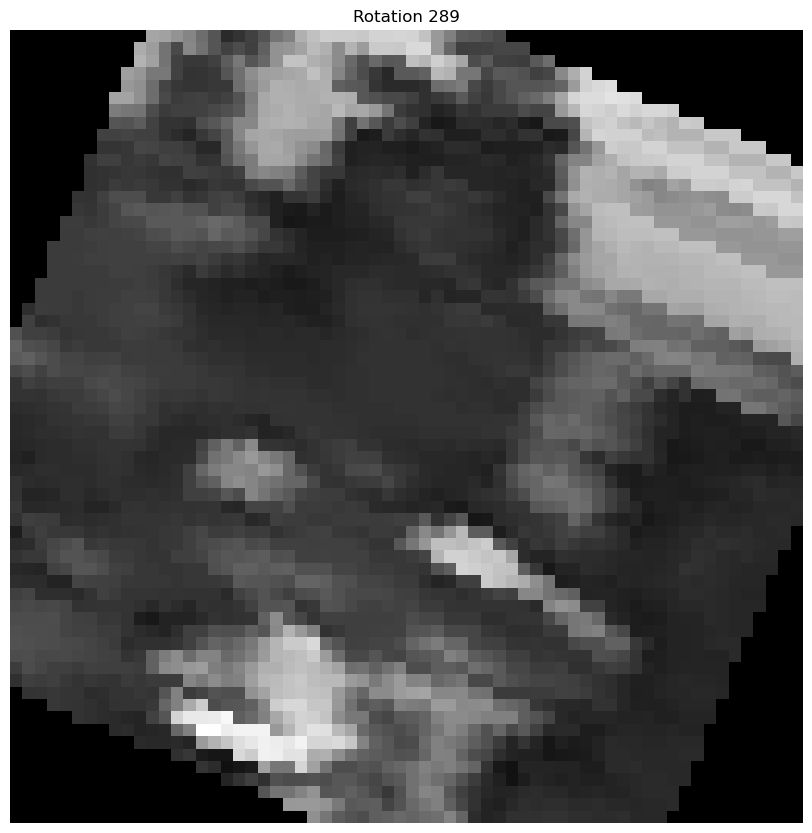

<Figure size 432x288 with 0 Axes>

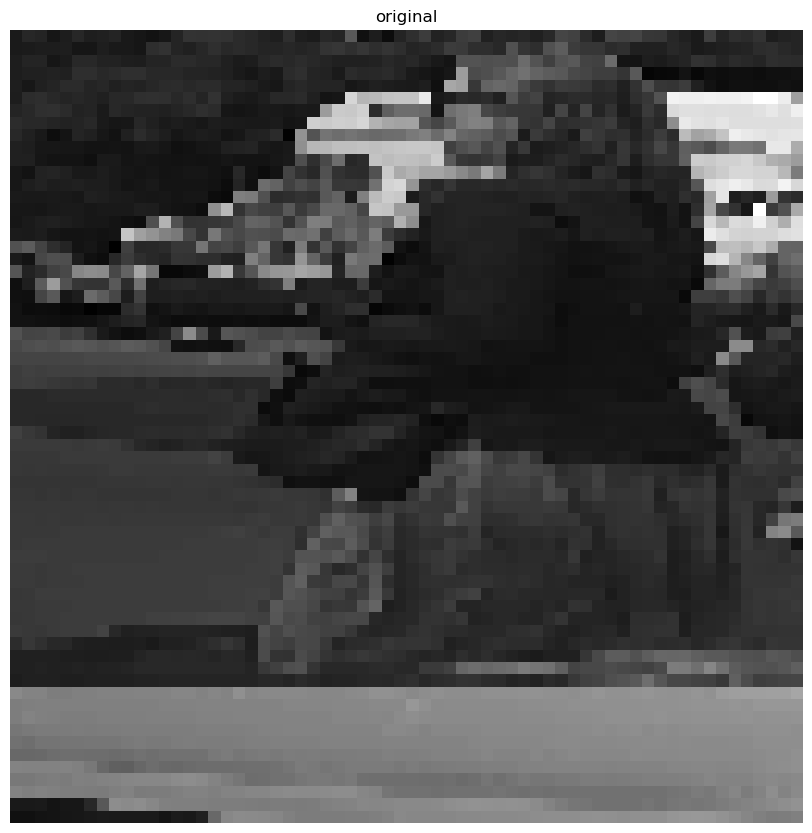

218


<Figure size 432x288 with 0 Axes>

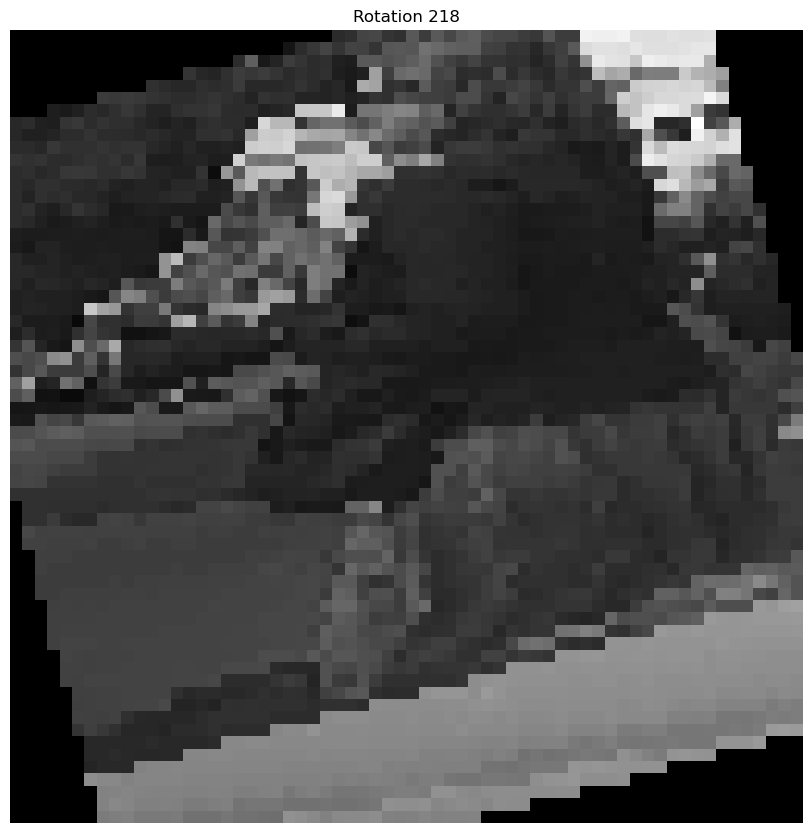

<Figure size 432x288 with 0 Axes>

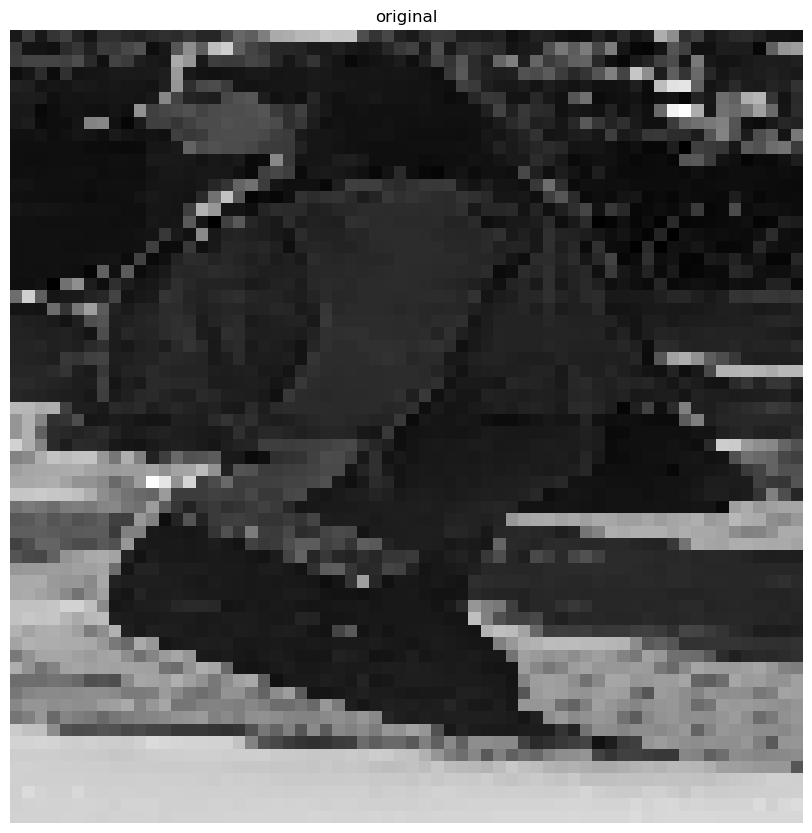

269


<Figure size 432x288 with 0 Axes>

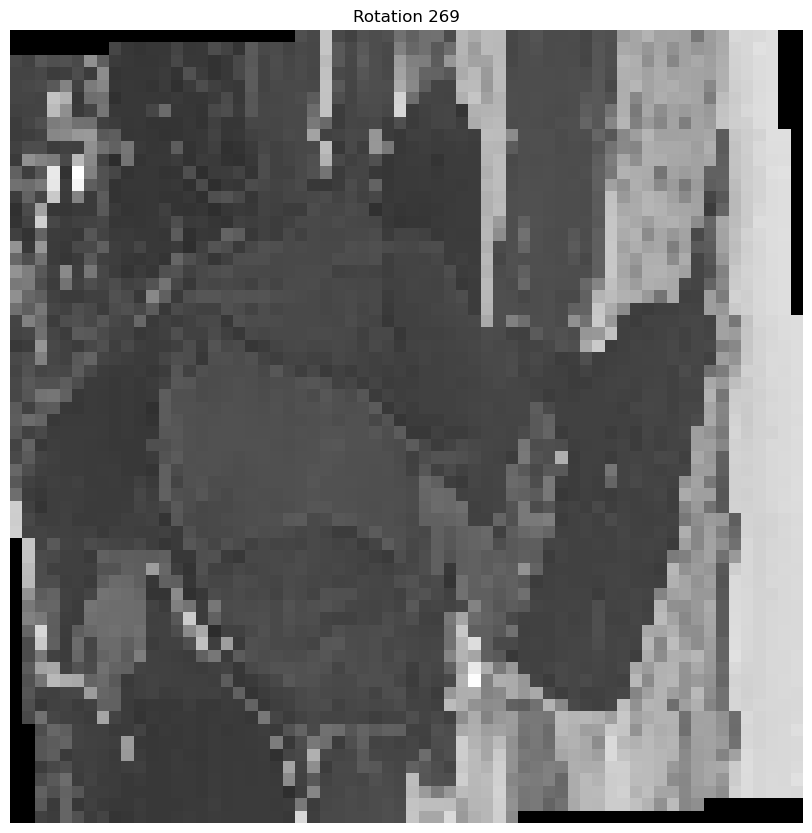

In [187]:
root_path = '/media/erik/T7/DP/PIE_data/images/train/'
for file in imgs_names:
    img_path = root_path + file
    img = Image.open(Path(img_path))
    plot_1([img], col_title=["original"])
    degree = int((torch.rand(1) * 360) % 360)
    print(degree)
    rotated_img = [transforms.RandomRotation(degrees=degree)(img)]
    plot_1(rotated_img, col_title=[f"Rotation {degree}"])